In [2]:
import pandas, pickle
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn import preprocessing as pre
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Summary

### Based on the following Data Exploration, these conclusions can be made:

1. The given features are identical to a variable not given below.

    f34, f35, f37, f38, f58, f86, f87, f88, f96, f97, f98, f106, f107, f108, f116, f117, f118, f126, f127, f128, f155, f156, f157, f165, f166, f167, f175, f176, f177, f185, f186, f187, f195, f196, f197, f225, f226, f227, f235, f236, f237, f245, f246, f247, f255, f256, f257, f265, f266, f267, f294, f295, f296, f302, f303, f304, f310, f311, f312, f318, f319, f320, f326, f327, f328, f345, f354, f362, f371, f379, f408, f417, f427, f457, f478, f488, f498, f508, f553, f563, f573, f582, f599, f678, f700, f701, f702, f729, f741, f764


2. The following features are perfectly correlated.

    f74  - f722; f676 - f765


3. There is no one feature that has a high correlation with the target variable. The feature with the highest correlation has a score of 0.03985.


4.

In [20]:
def read_data(csv_path):
    """
    Given a path to a file, reads in the data in the file
    """
    print("Reading Data...")
    data = pd.read_csv(csv_path)
    print("Shape:", data.shape)
    return data

def clean_data(data):
    """
    Cleans data by taking string based NAs and converting to NaN.
    Assumes that the string columns are integer columns.
    """
    print("Cleaning Data...")
    data = data.replace("NA", None)
    for col_name in data.select_dtypes(exclude=['int64', 'float64']).columns:
        data[col_name] = pd.to_numeric(data[col_name], downcast="integer", errors="coerce")
    return data

def drop_duplicate_columns(data):
    """
    Iterates through columns in dataframe to find columns
    with identical values and compiles a single one of these columns into
    a set of columns to be dropped.
    """
    col_names = set()
    for x in range(data.shape[1]):
        col = data.iloc[:, x]
        for y in range(x + 1, data.shape[1]):
            check_dup = data.iloc[:, y]
            if col.equals(check_dup):
                col_names.add(data.columns.values[y])
    return data.drop(columns=list(col_names))

def impute_values(data):
    """
    Fits a simple imputer to the dataset and imputes missing
    values in the dataset.
    Might need to be changed to an iterative imputer.
    """
    print("Imputing Missing Data...")
    matrix = data.to_numpy()
    imp = SimpleImputer()
    imp.fit(matrix)
    complete_data = pd.DataFrame(imp.transform(matrix), columns=data.columns)
    return complete_data

def correlation_heatmap(corr):
    sns.set_theme(style="white")

    ax = sns.heatmap(
        corr,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )

    plt.show()

In [9]:
data = read_data("/Users/therafu/Documents/MyFiles/Projects/COMP/DSCI303/Loan-Default-Prediction---ICL/train_v2.csv")

Reading Data...
Shape: (105471, 771)


/Users/therafu/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3337: DtypeWarning: Columns (135,204,274,417) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [11]:
cleaned_data = clean_data(data)

Cleaning Data...


In [12]:
dropped_data = drop_duplicate_columns(cleaned_data)

In [13]:
loan_data = impute_values(dropped_data)

Imputing Missing Data...


In [14]:
loan_data.shape

(105471, 682)

In [ ]:
loan_data.drop(columns=dropped_data.columns).columns

In [15]:
X = dropped_data.drop("loss", 1) # feature matrix
y = dropped_data["loss"] # target variable

In [16]:
#Using Pearson Correlation
cor = dropped_data.corr()
cor

id        f1        f2        f3        f4        f5        f6  \
id    1.000000  0.042966 -0.018418 -0.004061  0.042855 -0.074279  0.048518   
f1    0.042966  1.000000 -0.210388 -0.000370  0.782389 -0.269849  0.102250   
f2   -0.018418 -0.210388  1.000000  0.003149 -0.215980  0.221009  0.091765   
f3   -0.004061 -0.000370  0.003149  1.000000  0.000040  0.002255  0.003789   
f4    0.042855  0.782389 -0.215980  0.000040  1.000000 -0.256425  0.119798   
...        ...       ...       ...       ...       ...       ...       ...   
f775  0.008354  0.067034 -0.176774 -0.005909  0.037114 -0.013944 -0.037636   
f776  0.005805  0.078637 -0.097982 -0.001653  0.038133 -0.036634  0.010537   
f777  0.045460  0.873927 -0.225693  0.000149  0.875710 -0.303485  0.161654   
f778 -0.050143 -0.270134  0.221553 -0.000504 -0.262051  0.770800 -0.070763   
loss  0.000342 -0.008231 -0.000588  0.000785 -0.005019  0.003902 -0.003449   

            f7        f8        f9  ...      f770      f771      f772  \
id    0.018384  0.041654  0.047053  ... -0.000437  0.001546 -0.001525   
f1   -0.160392 -0.174056  0.972323  ... -0.081408 -0.044220  0.036631   
f2   -0.131591 -0.155965 -0.248444  ...  0.078232 -0.020417  0.044855   
f3    0.001305 -0.003281 -0.000905  ...  0.001931  0.002581 -0.002818   
f4   -0.231372 -0.209896  0.832383  ... -0.108024 -0.088417  0.085026   
...        ...       ...       ...  ...       ...       ...       ...   
f775  0.036175  0.043315  0.069130  ...  0.161927  0.242273 -0.254466   
f776  0.029569  0.008018  0.088910  ... -0.229139 -0.218955  0.214578   
f777 -0.271751 -0.219753  0.929218  ... -0.125933 -0.111692  0.108687   
f778  0.124920 -0.003734 -0.284848  ...  0.063802  0.046040 -0.042579   
loss -0.001864 -0.003435 -0.006301  ... -0.004874 -0.005386  0.005567   

          f773      f774      f775      f776      f777      f778      loss  
id    0.001295 -0.002690  0.008354  0.005805  0.045460 -0.050143  0.000342  
f1   -0.031180  0.003592  0.067034  0.078637  0.873927 -0.270134 -0.008231  
f2   -0.063950 -0.023559 -0.176774 -0.097982 -0.225693  0.221553 -0.000588  
f3    0.002964 -0.003372 -0.005909 -0.001653  0.000149 -0.000504  0.000785  
f4   -0.082677 -0.026078  0.037114  0.038133  0.875710 -0.262051 -0.005019  
...        ...       ...       ...       ...       ...       ...       ...  
f775  0.260916  0.256286  1.000000 -0.057376  0.020445 -0.017474 -0.007287  
f776 -0.210643 -0.286646 -0.057376  1.000000  0.118741 -0.043901 -0.015506  
f777 -0.106476 -0.056375  0.020445  0.118741  1.000000 -0.304588 -0.004855  
f778  0.039952  0.042623 -0.017474 -0.043901 -0.304588  1.000000  0.003389  
loss -0.005755  0.005945 -0.007287 -0.015506 -0.004855  0.003389  1.000000  

[682 rows x 682 columns]

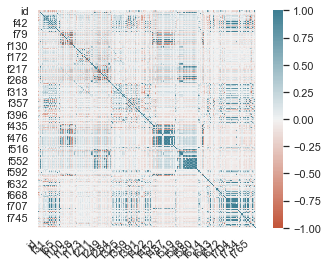

In [21]:
correlation_heatmap(cor)

In [27]:
#Correlation with output variable
cor_target = abs(cor["loss"])

#Selecting highly correlated features
print(cor_target[:-1].max())
relevant_features = cor_target[cor_target>=0.05]
relevant_features

loss    1.0
Name: loss, dtype: float64

In [44]:
#Correlation with output variable
for i in cor.columns:
    cor_target = abs(cor[i])
    #Selecting highly correlated features
    relevant_features = cor_target[cor_target>=0.95]
    if len(relevant_features) > 1:
        print("Following features relate highly to", i)
        print(relevant_features)

Following features relate highly to f1
f1     1.000000
f9     0.972323
f10    0.998662
Name: f1, dtype: float64
Following features relate highly to f7
f7      1.000000
f78     0.988513
f79     0.976154
f95     0.953870
f105    0.981371
f437    0.985607
f439    1.000000
f445    0.986730
f446    0.966684
f447    0.999363
f467    1.000000
f493    0.953814
f494    0.953807
f495    0.950079
f503    0.981344
f504    0.981341
f505    0.978495
f511    0.976569
f606    0.989679
f607    0.965505
f608    0.999992
Name: f7, dtype: float64
Following features relate highly to f8
f8      1.000000
f214    0.989215
f215    0.974715
f216    0.952732
f234    0.968164
f244    0.985708
f264    0.964523
f519    0.977010
f521    0.998686
f532    1.000000
f543    1.000000
f548    0.968158
f549    0.968148
f550    0.969159
f555    0.963984
f558    0.985704
f559    0.985700
f560    0.984538
f565    0.983060
f577    0.964515
f578    0.964504
f579    0.964243
f584    0.961299
Name: f8, dtype: float64
Following fe

<AxesSubplot:>

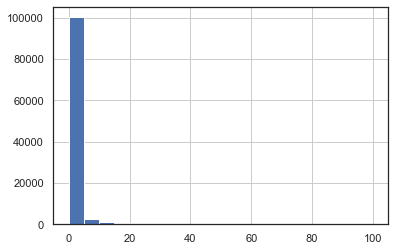

In [50]:
dropped_data["loss"].hist(bins=20)


In [ ]:
# lda = LinearDiscriminantAnalysis()
# lda.fit(dropped_data)
# transformed = lda.transform(dropped_data)

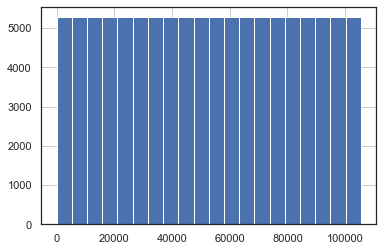

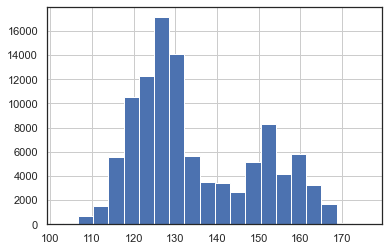

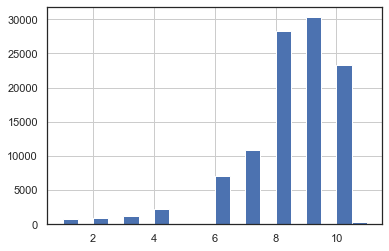

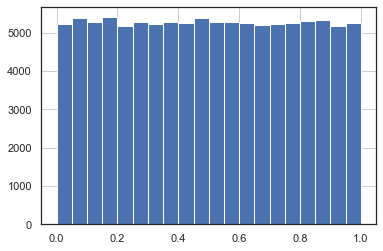

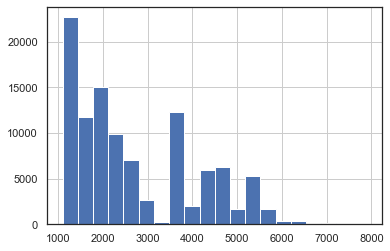

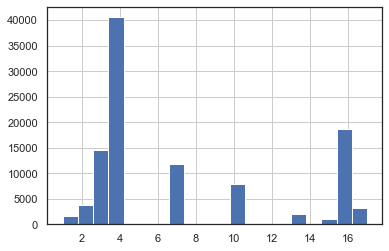

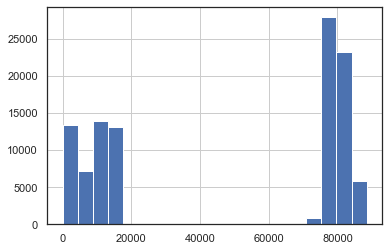

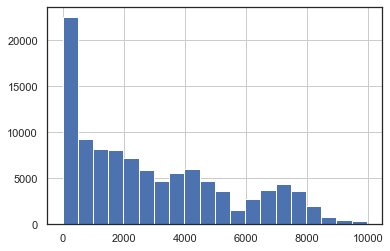

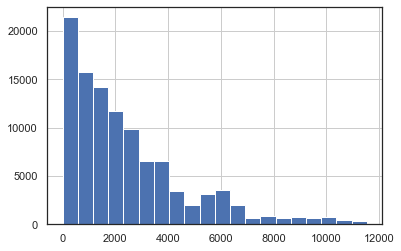

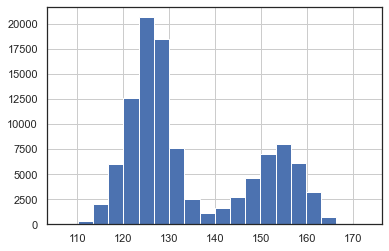

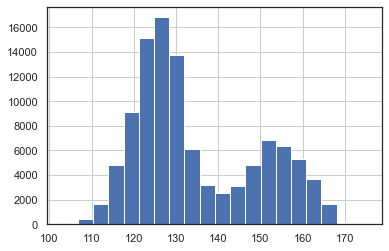

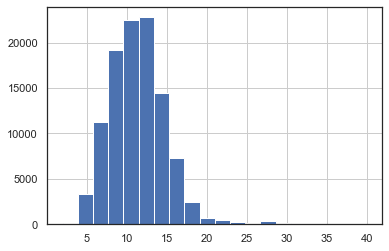

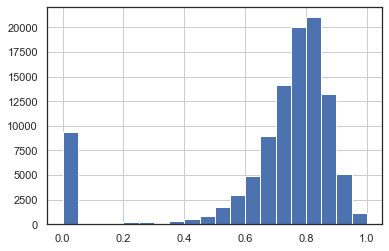

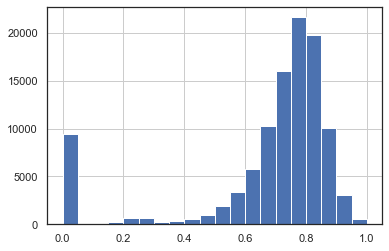

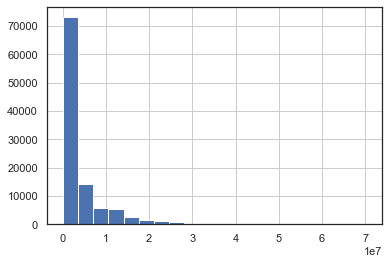

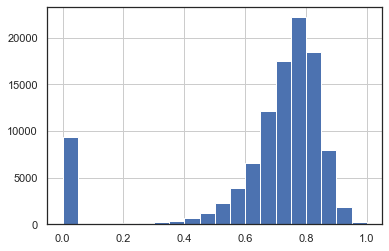

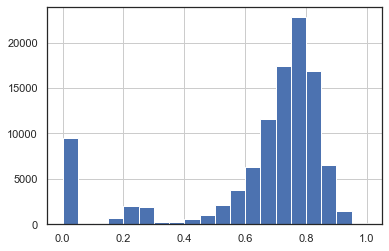

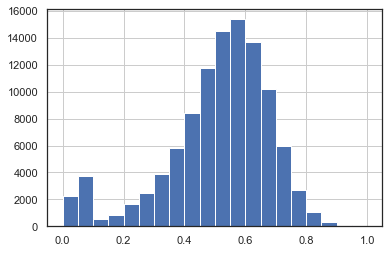

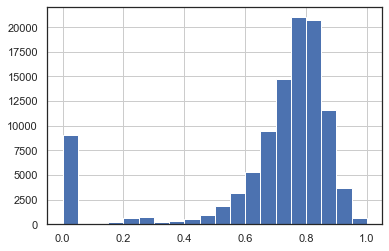

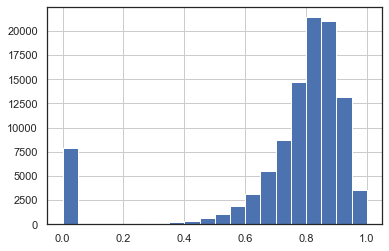

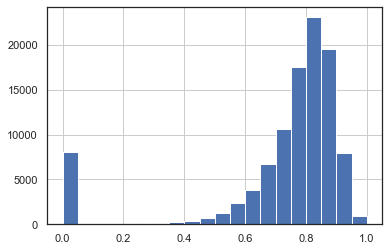

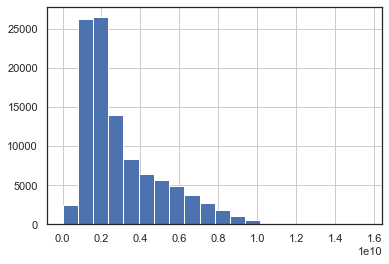

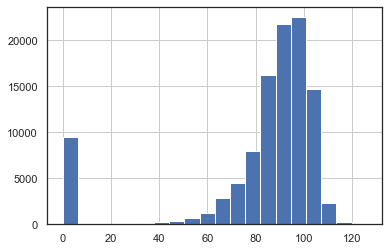

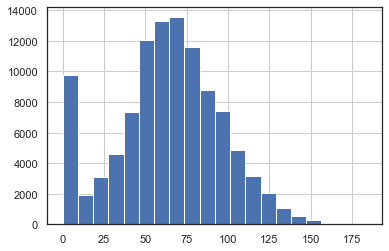

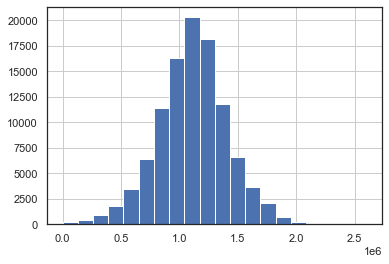

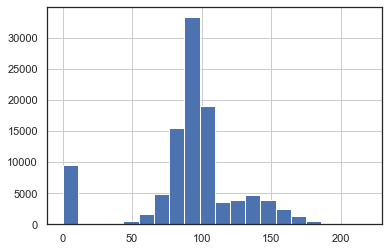

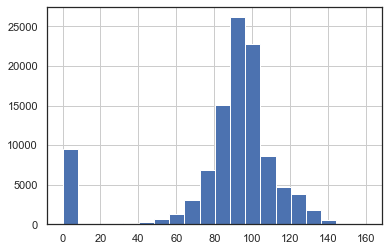

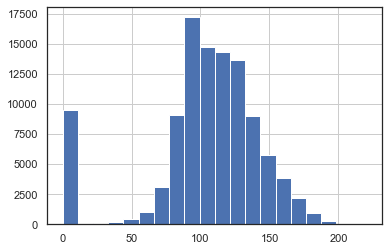

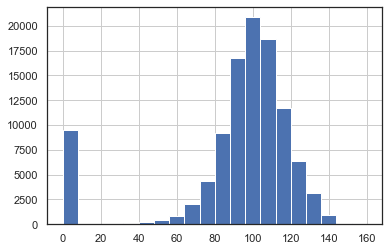

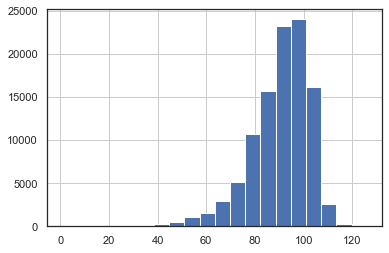

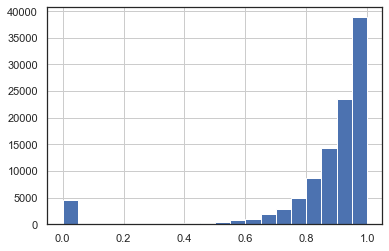

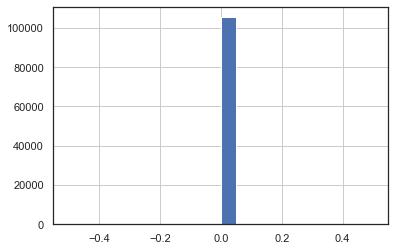

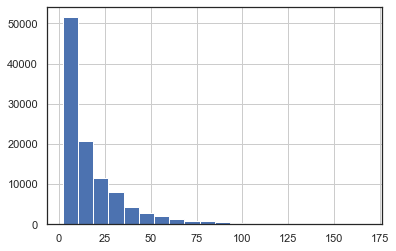

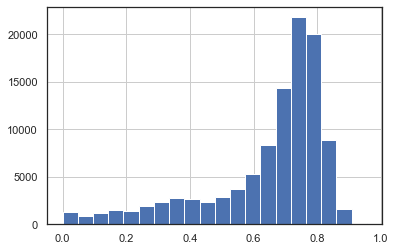

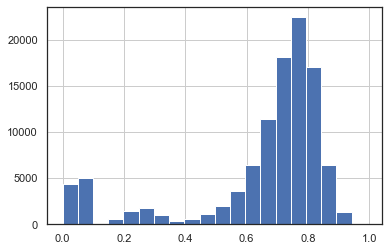

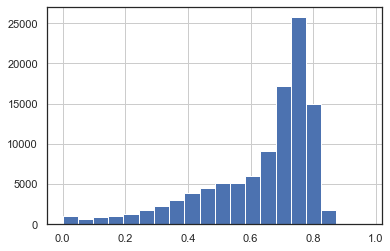

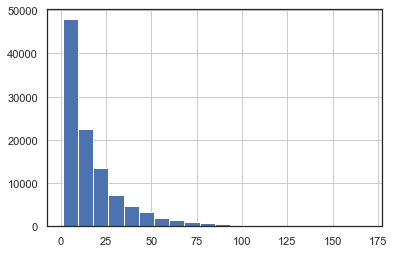

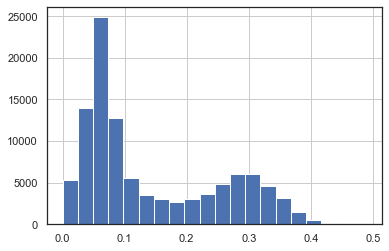

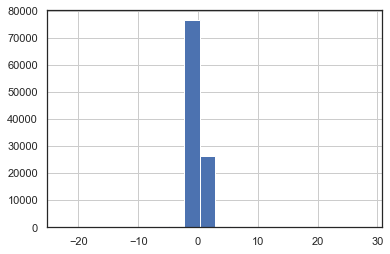

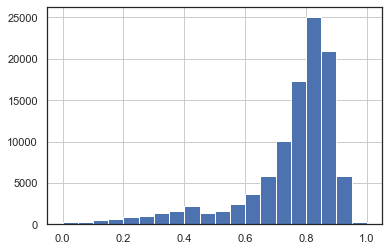

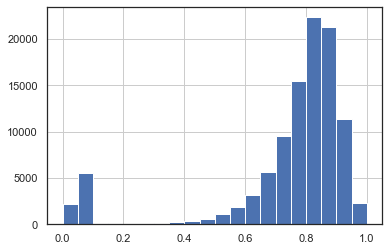

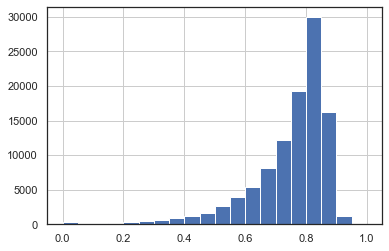

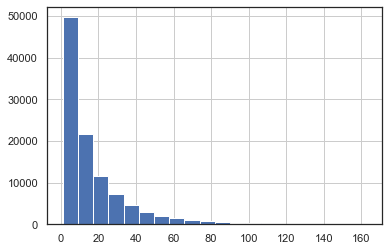

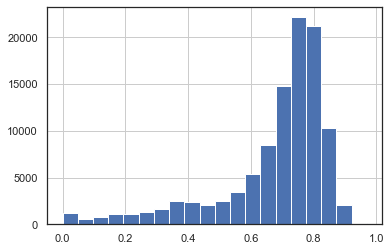

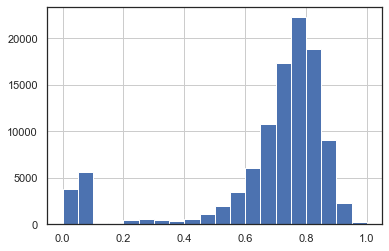

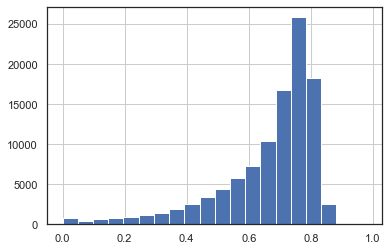

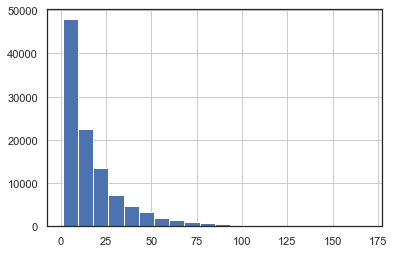

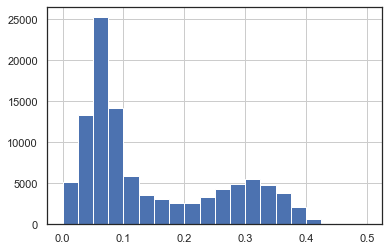

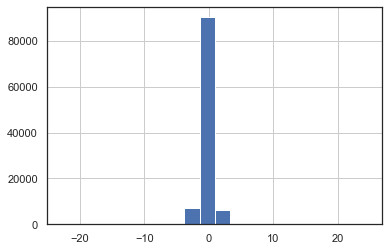

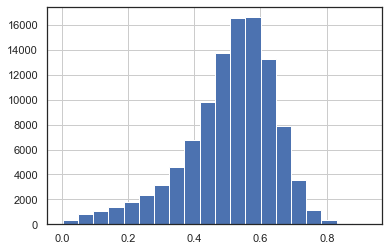

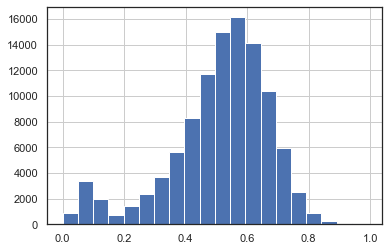

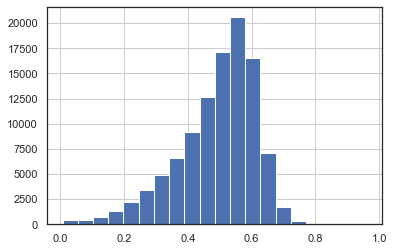

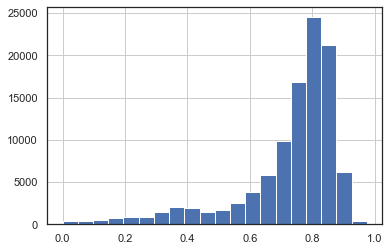

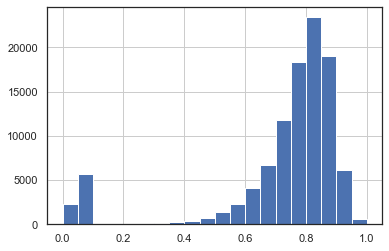

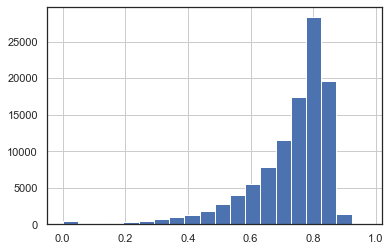

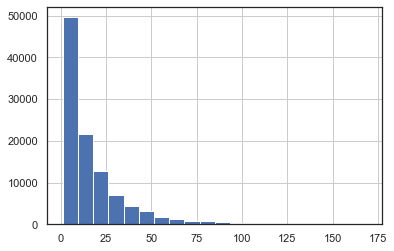

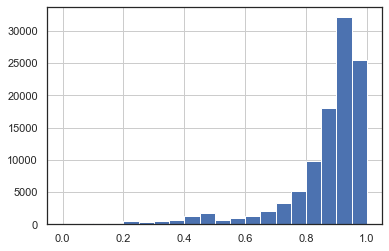

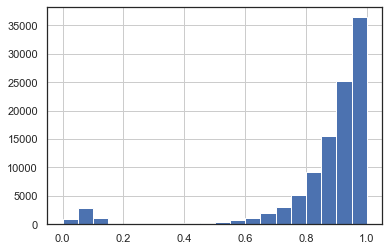

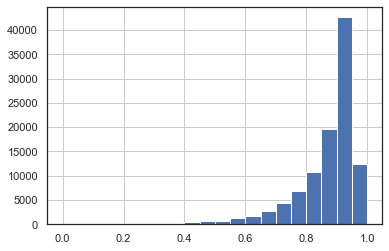

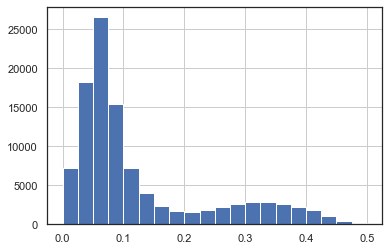

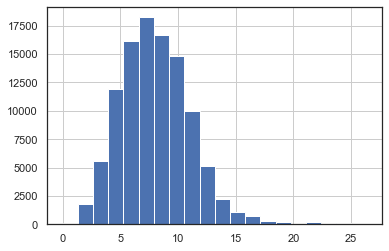

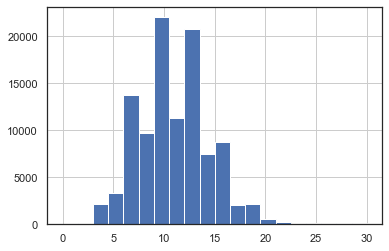

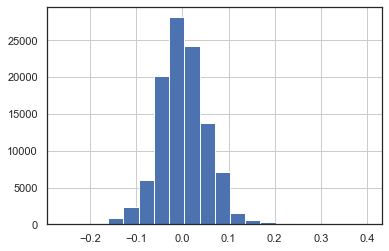

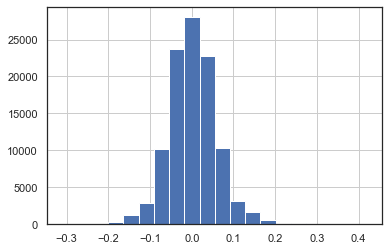

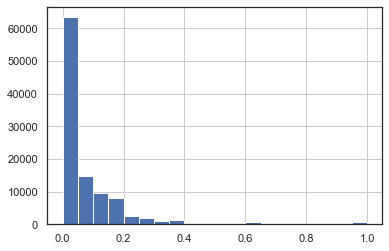

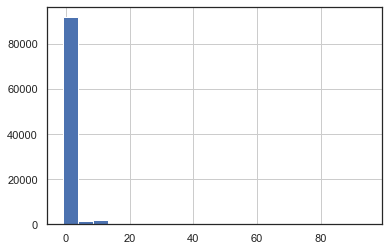

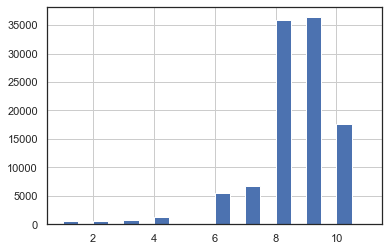

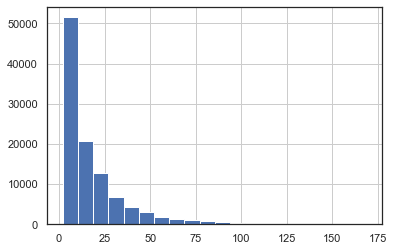

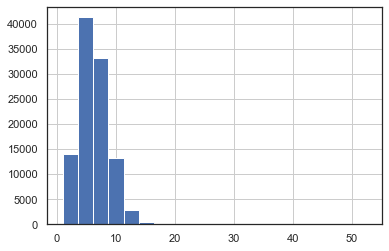

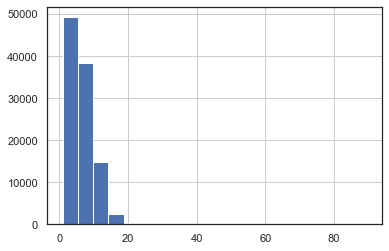

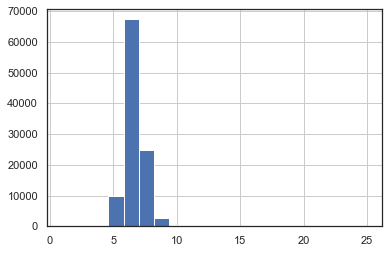

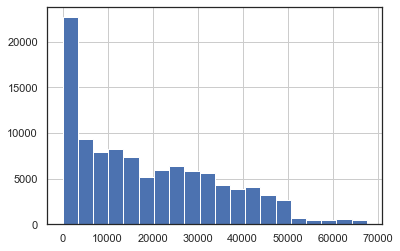

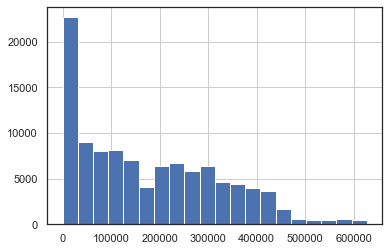

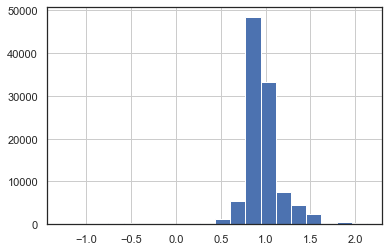

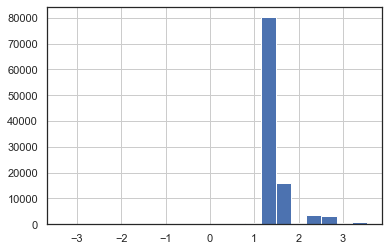

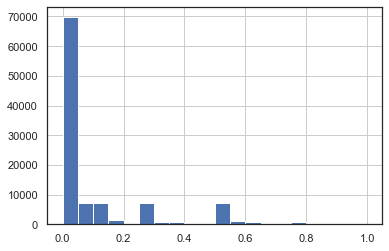

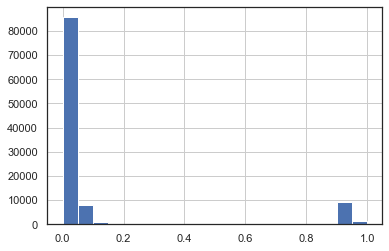

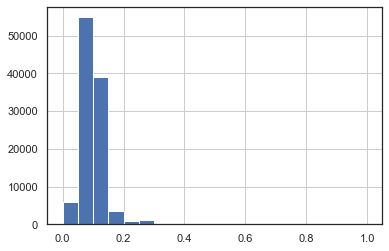

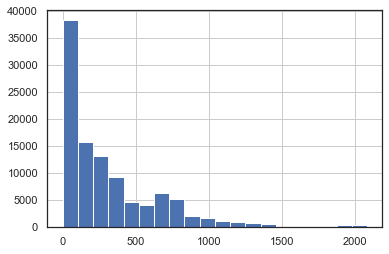

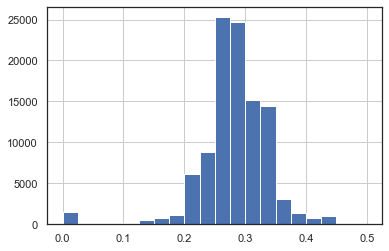

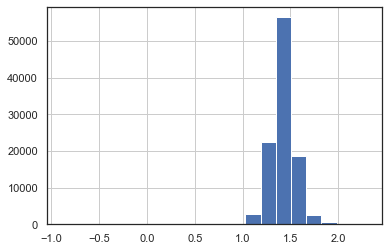

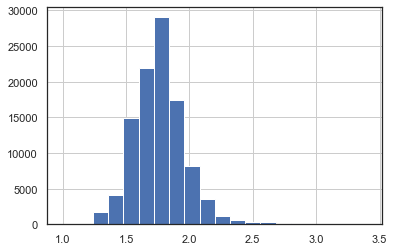

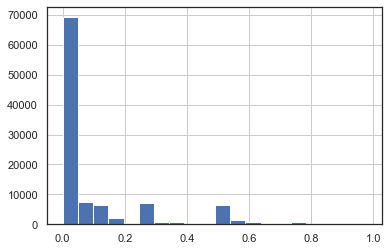

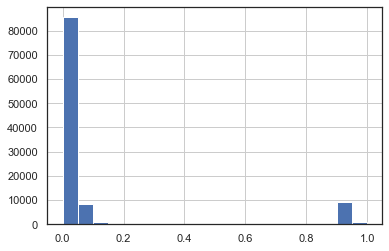

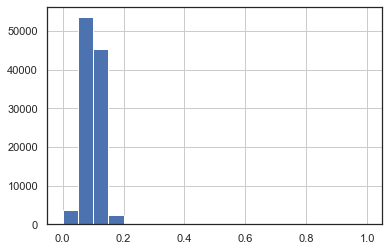

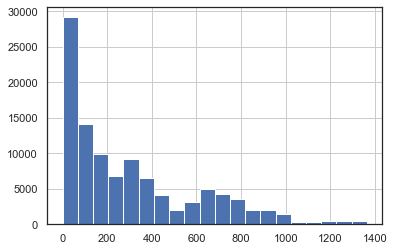

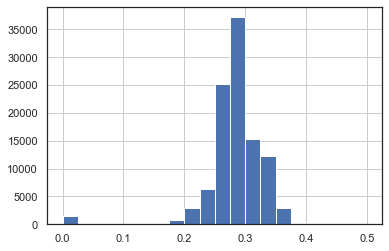

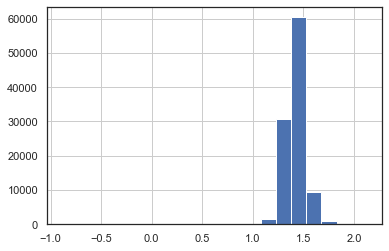

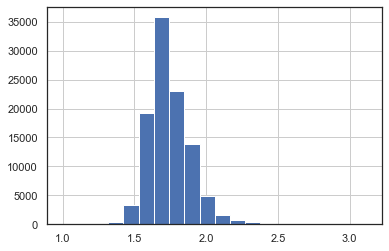

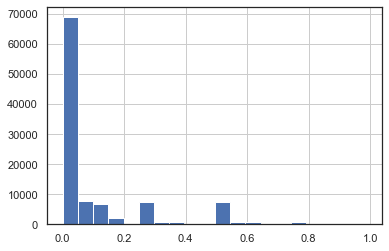

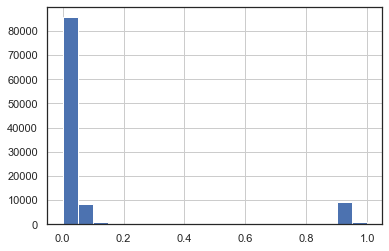

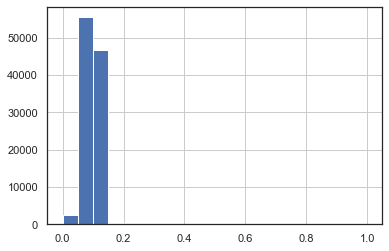

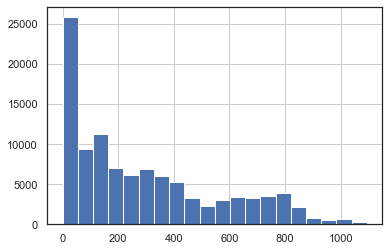

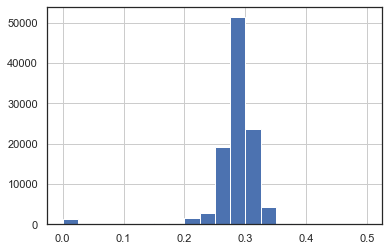

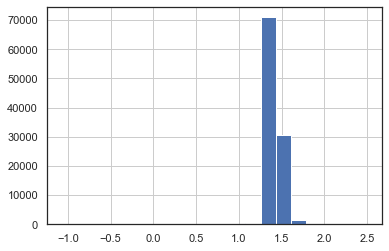

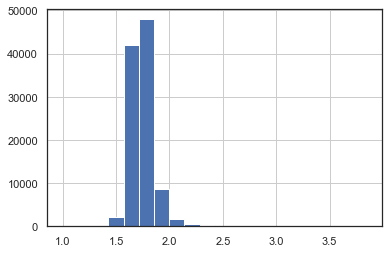

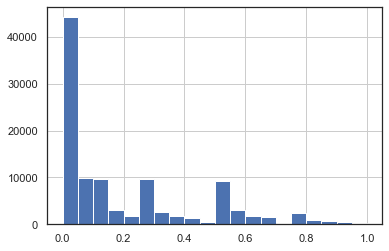

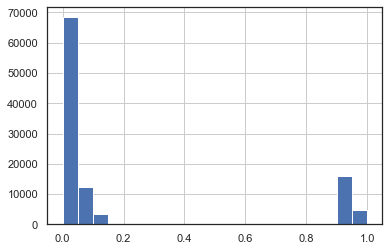

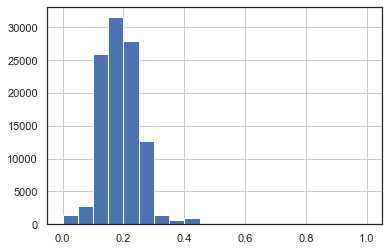

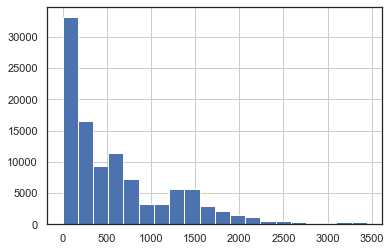

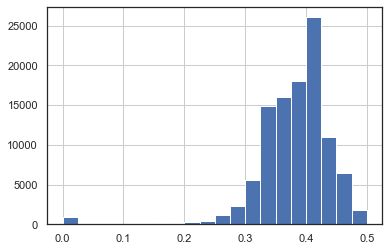

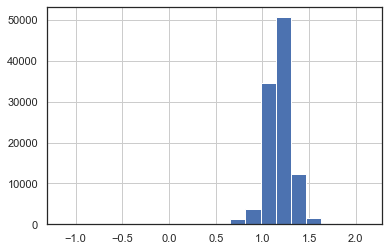

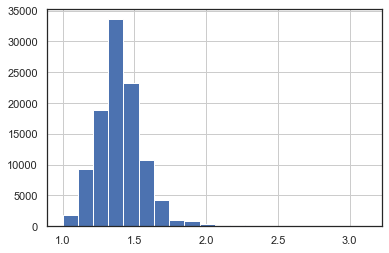

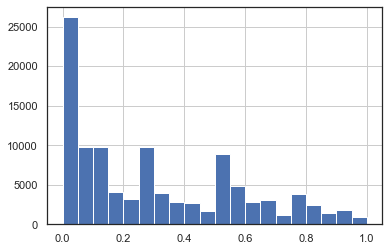

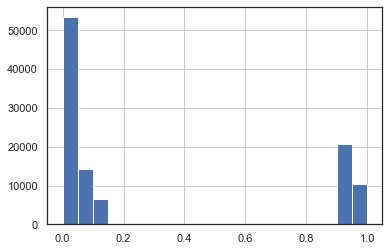

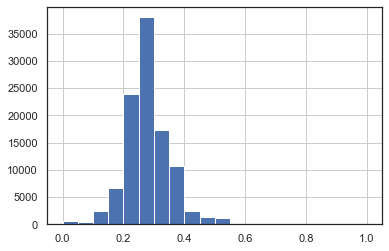

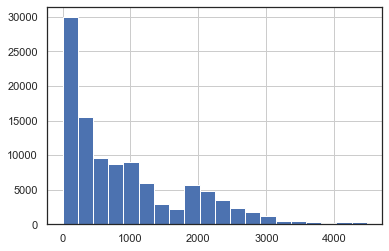

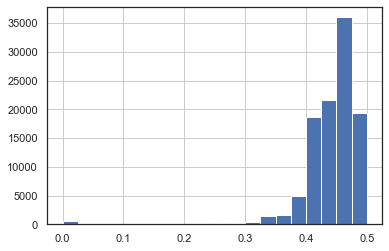

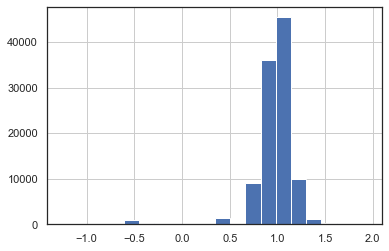

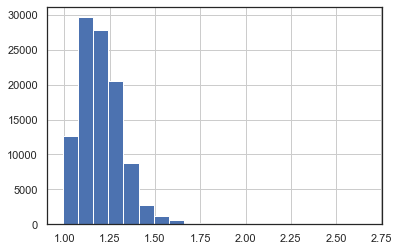

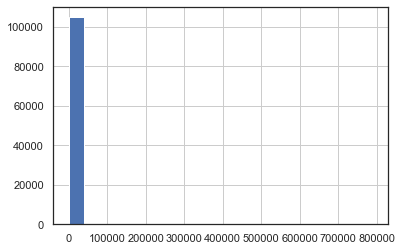

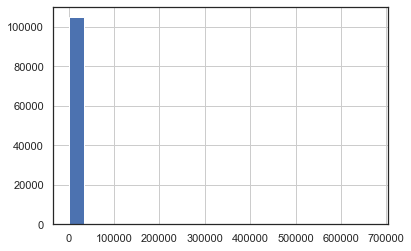

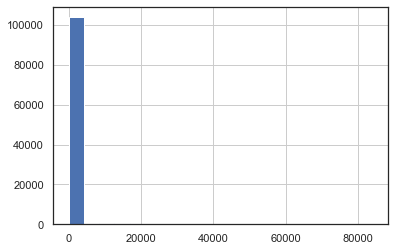

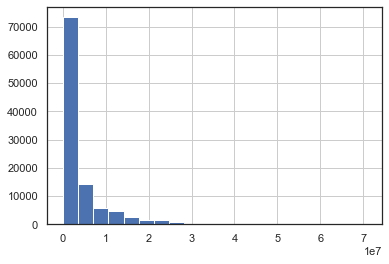

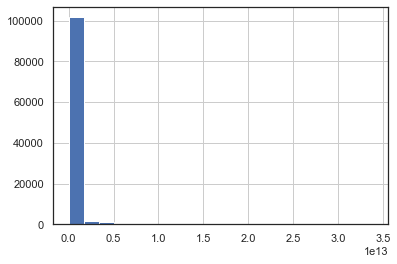

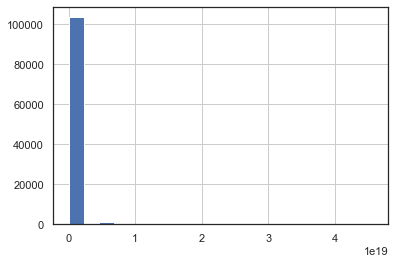

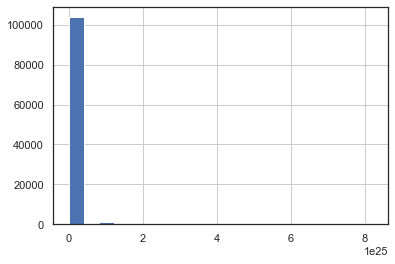

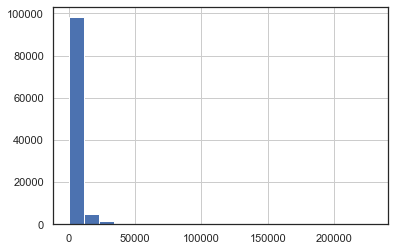

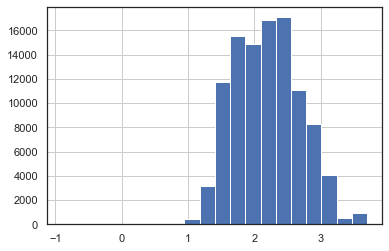

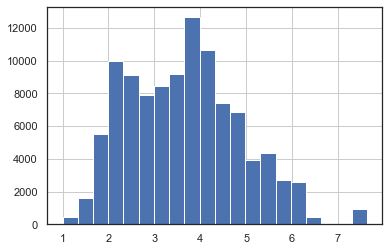

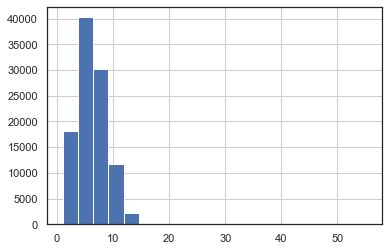

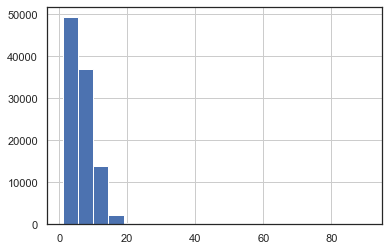

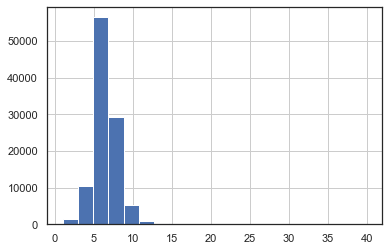

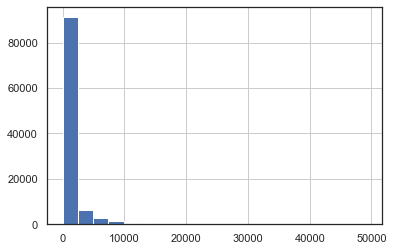

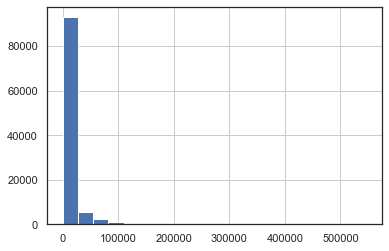

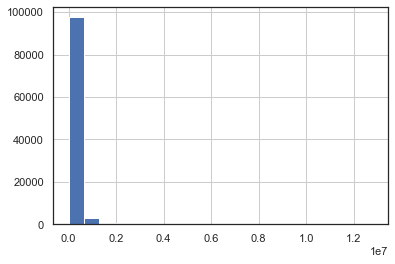

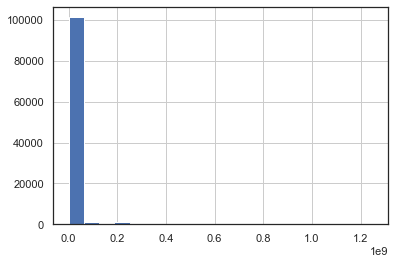

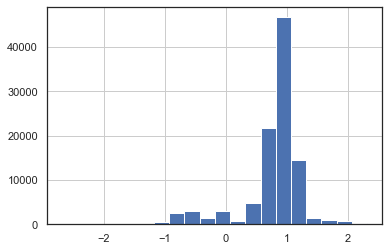

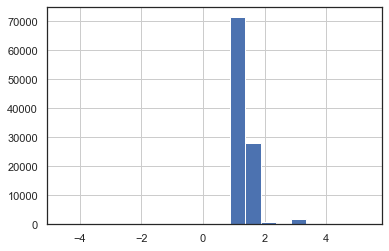

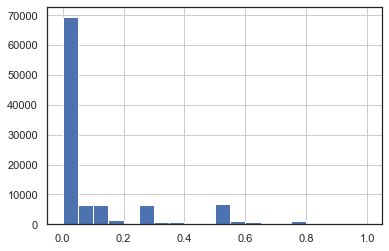

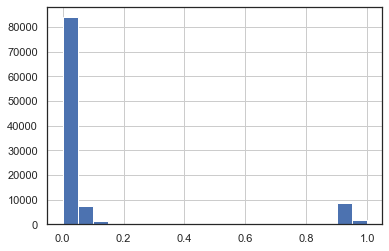

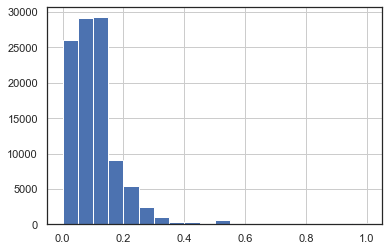

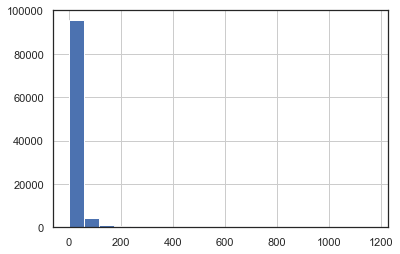

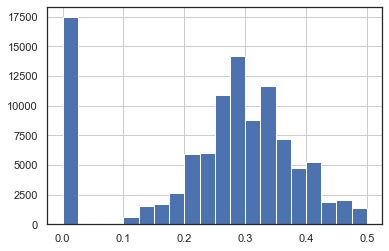

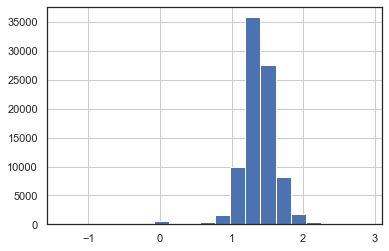

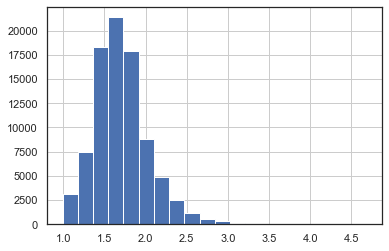

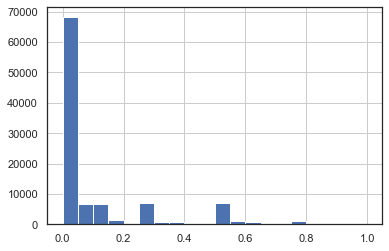

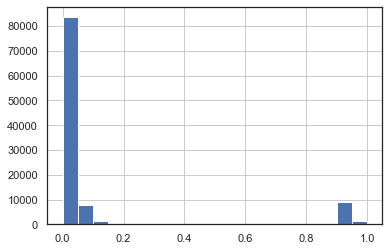

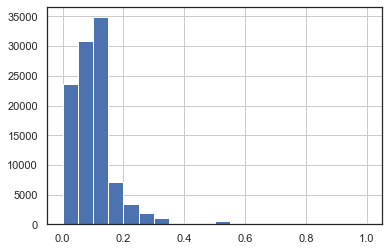

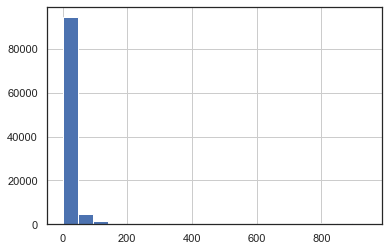

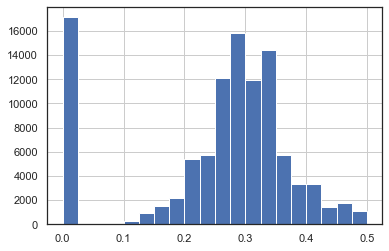

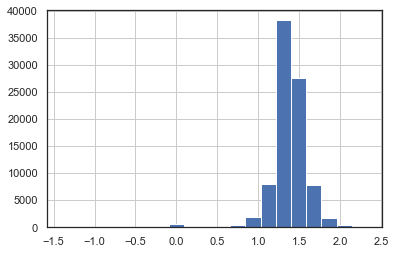

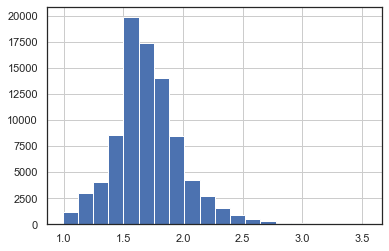

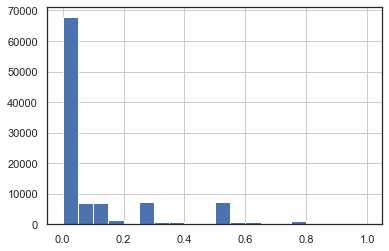

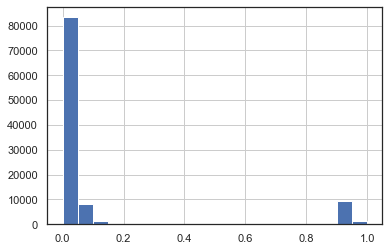

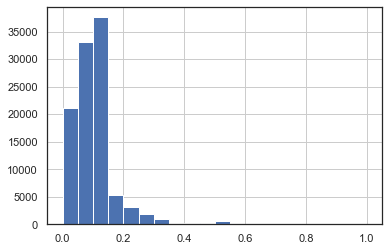

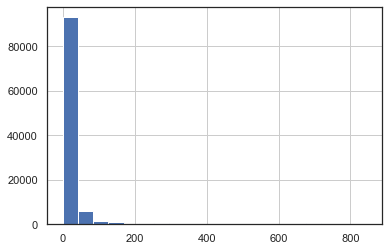

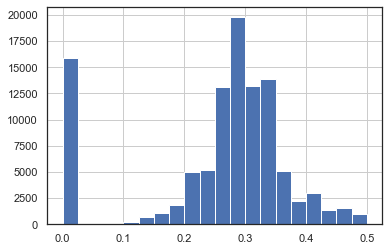

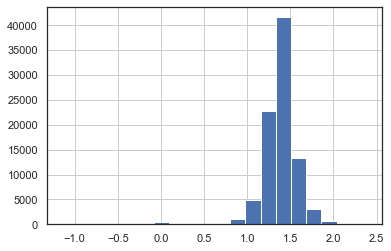

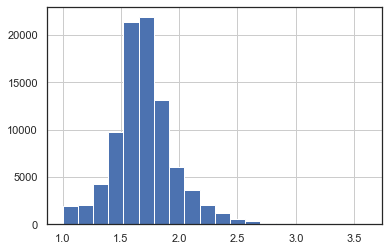

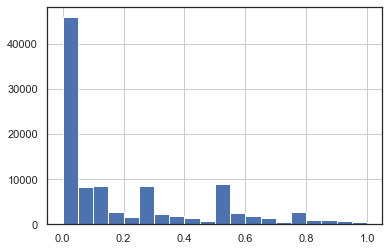

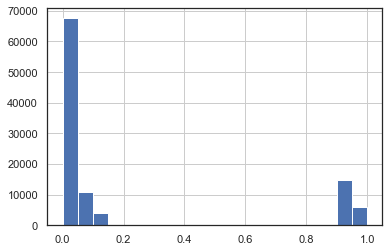

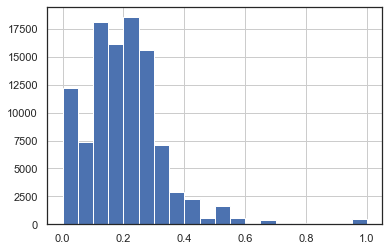

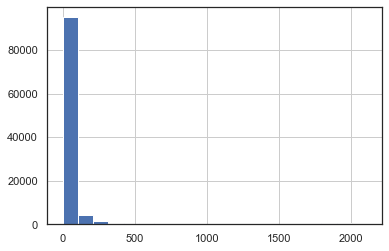

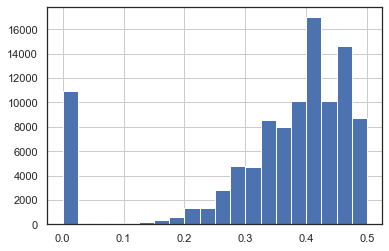

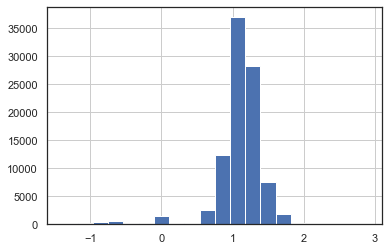

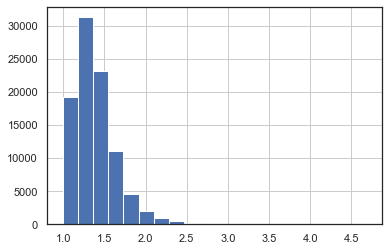

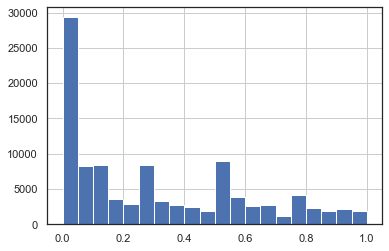

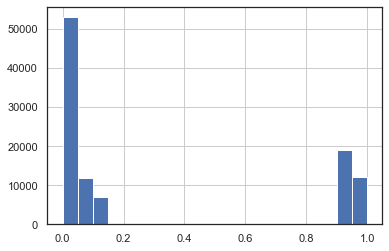

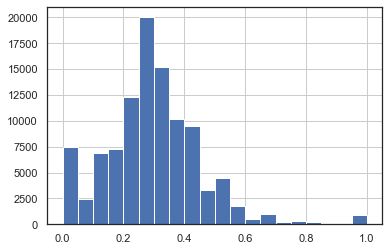

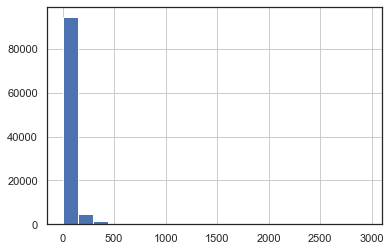

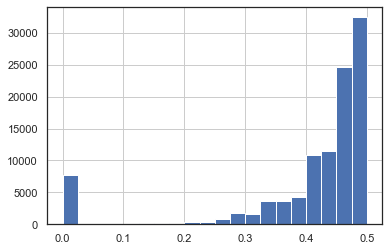

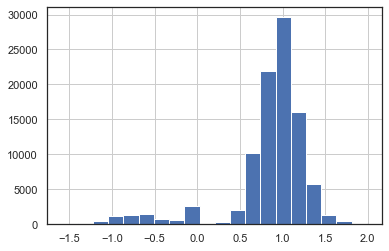

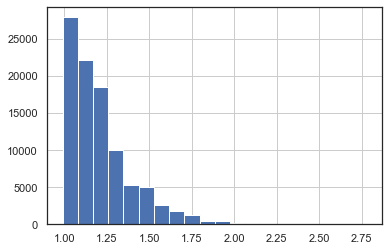

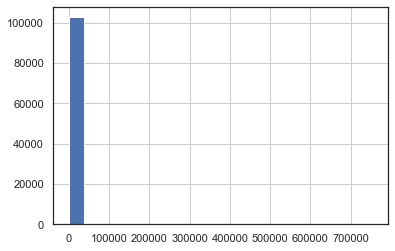

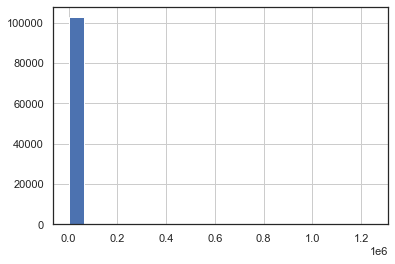

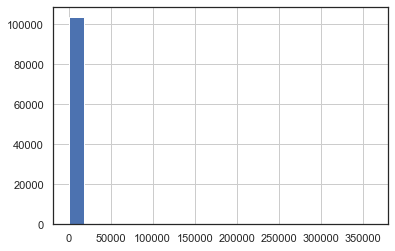

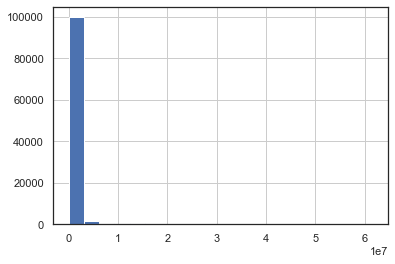

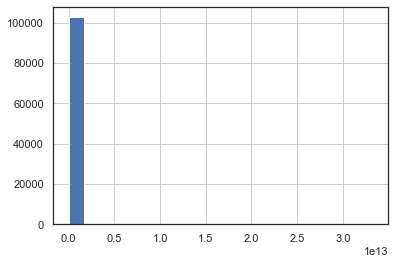

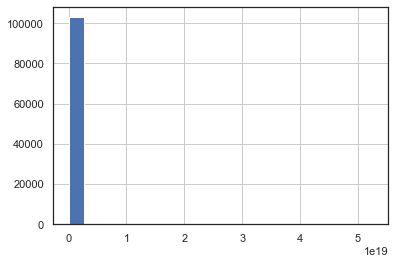

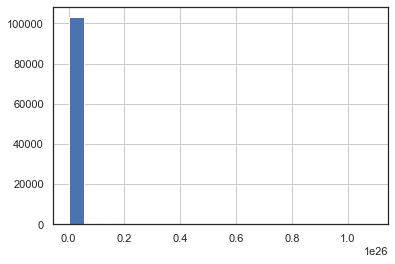

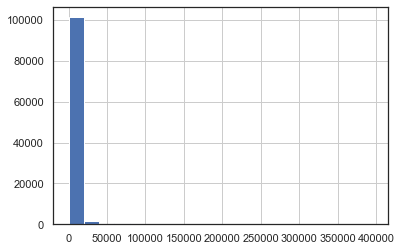

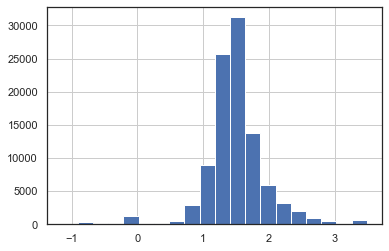

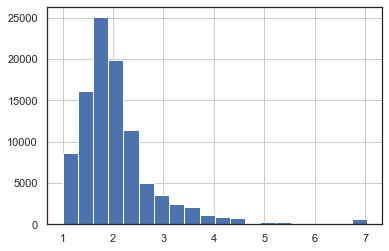

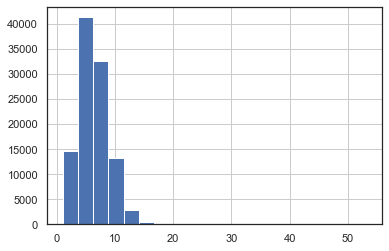

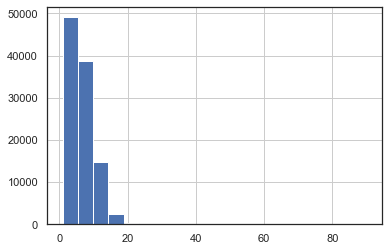

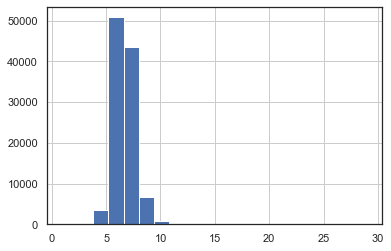

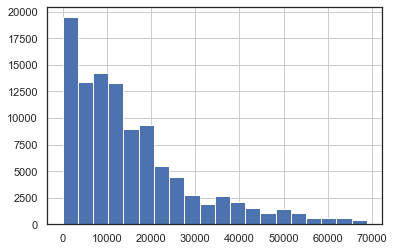

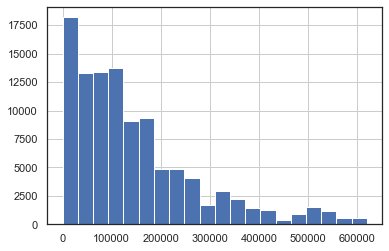

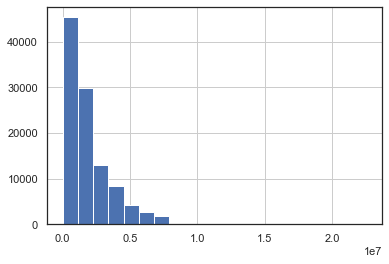

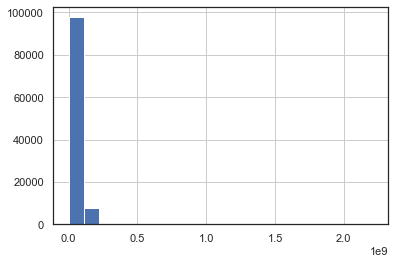

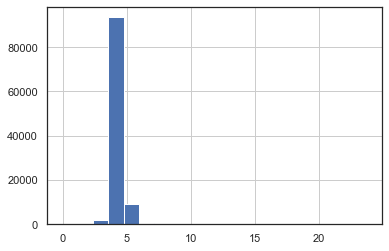

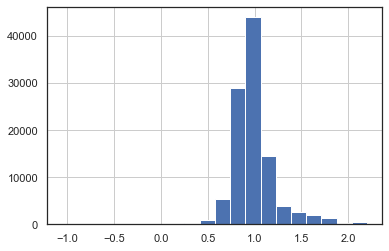

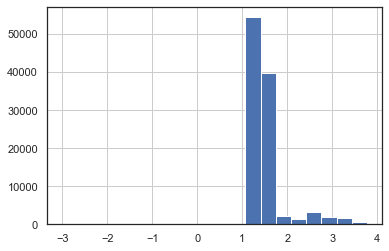

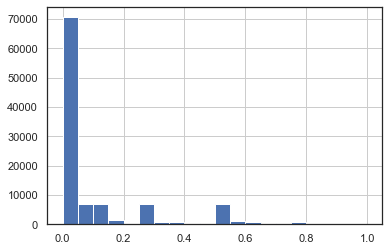

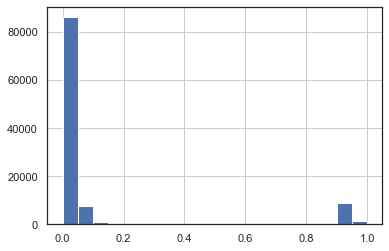

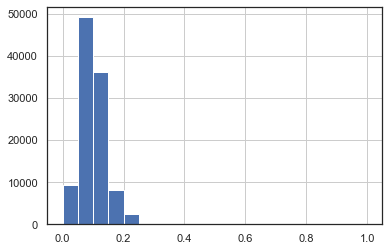

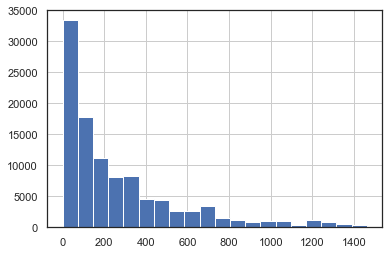

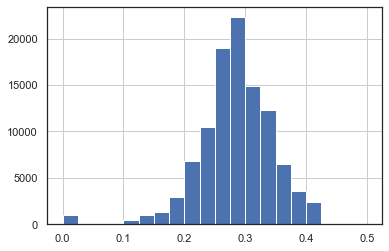

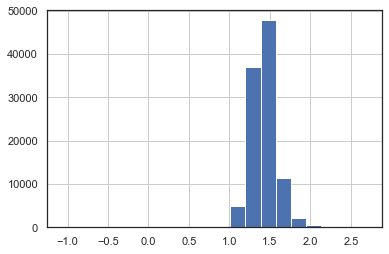

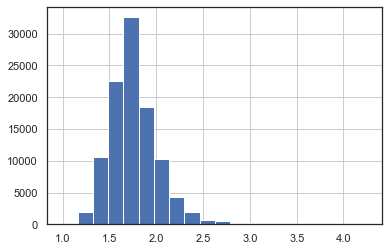

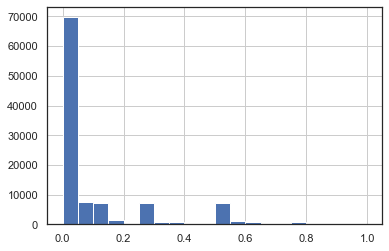

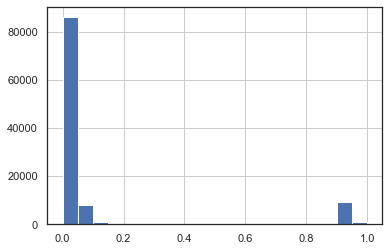

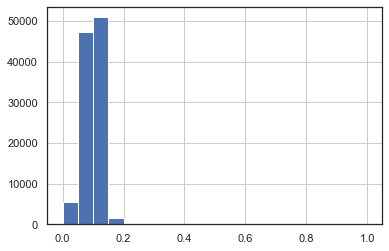

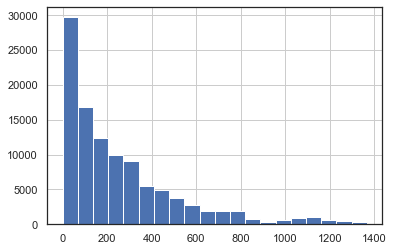

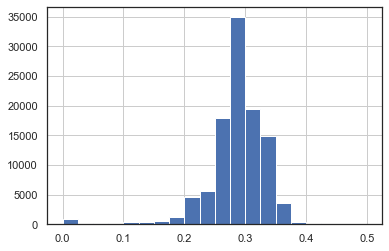

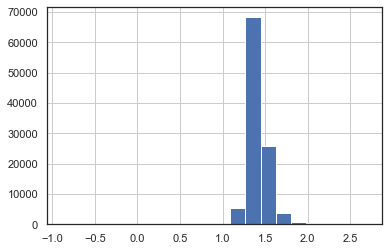

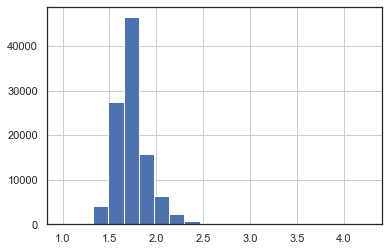

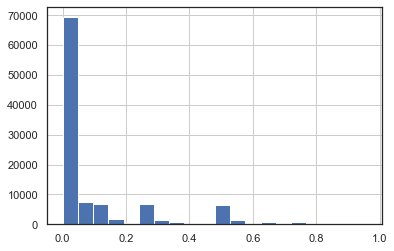

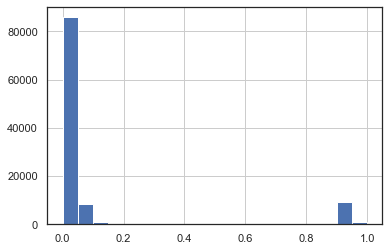

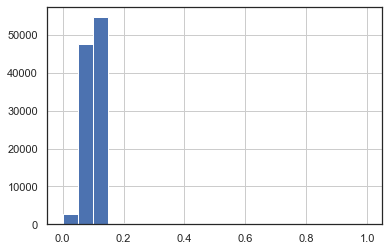

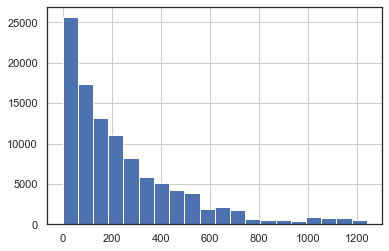

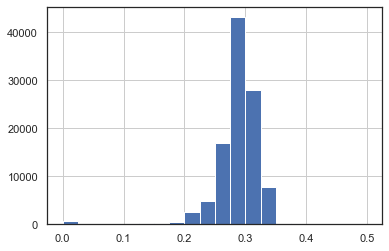

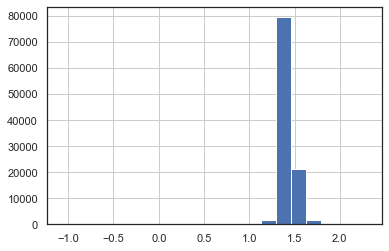

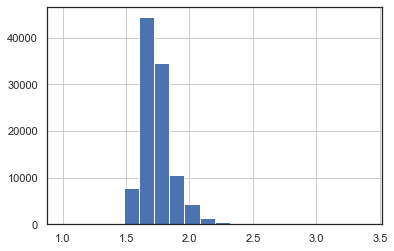

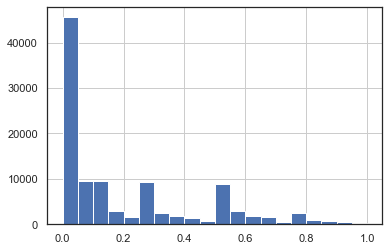

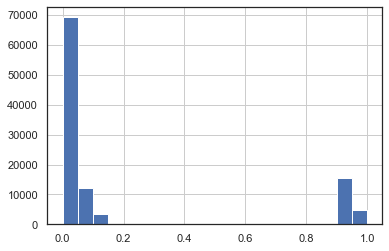

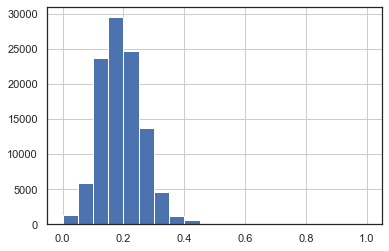

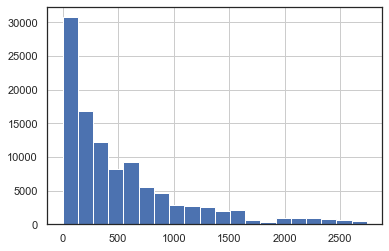

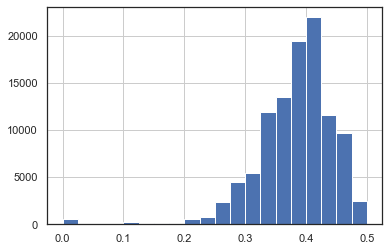

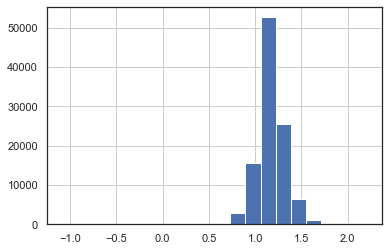

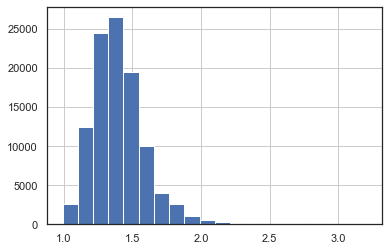

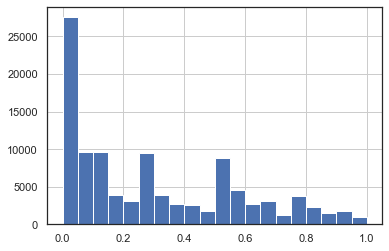

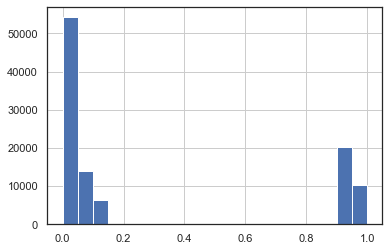

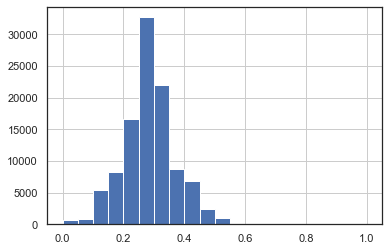

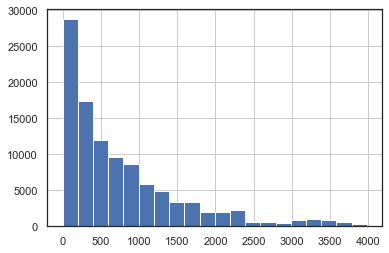

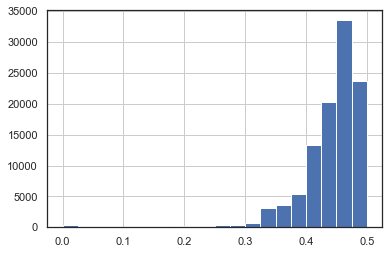

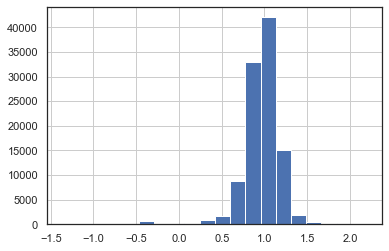

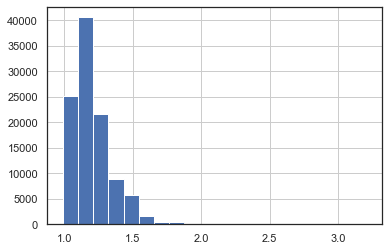

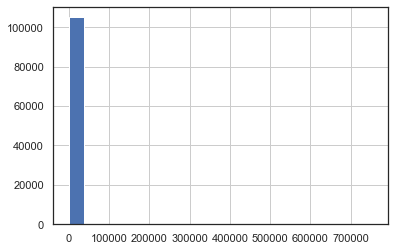

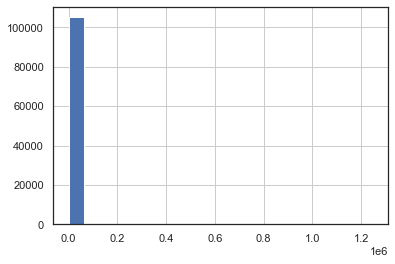

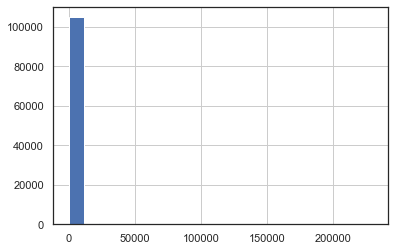

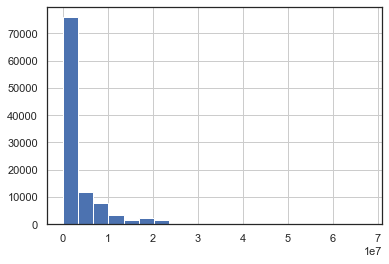

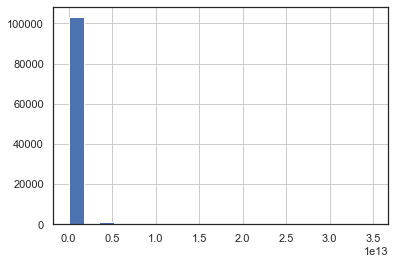

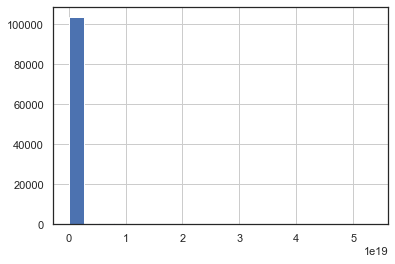

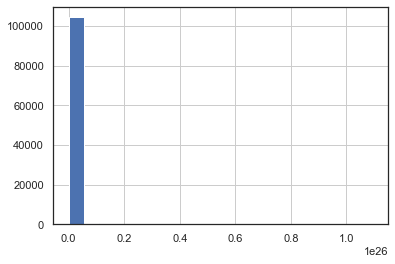

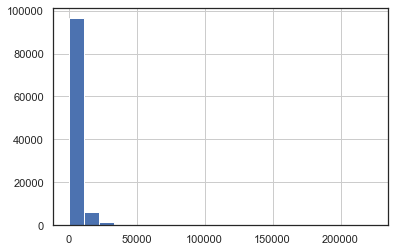

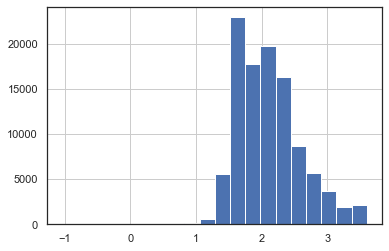

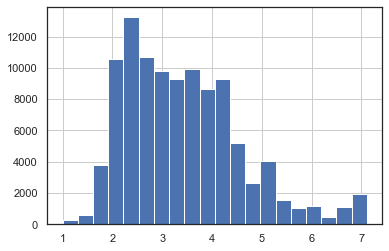

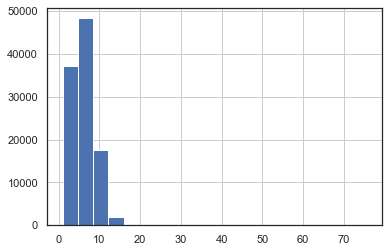

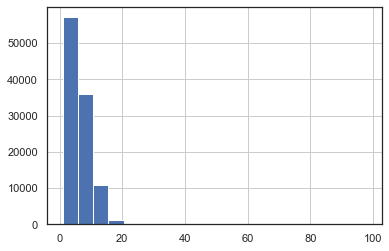

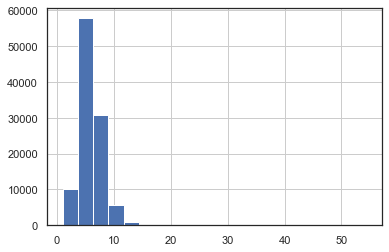

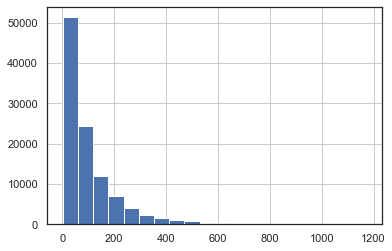

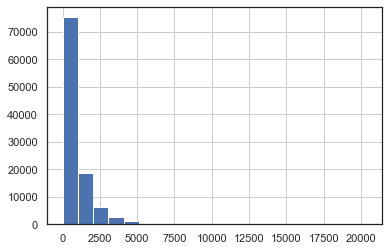

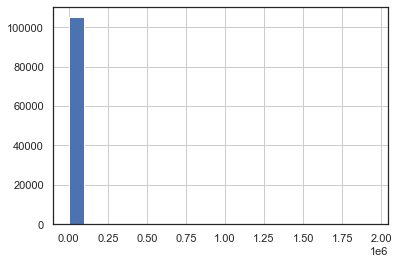

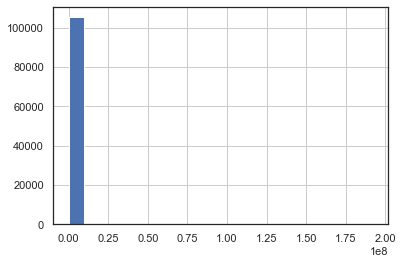

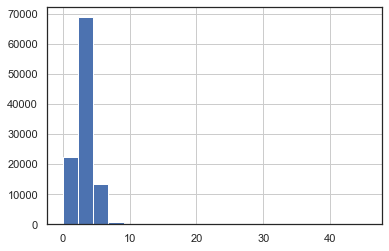

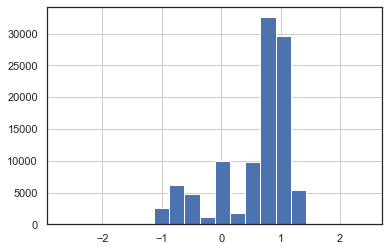

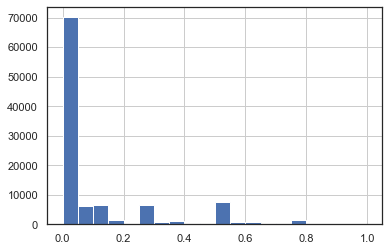

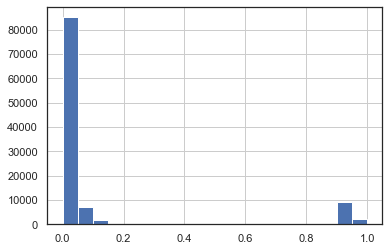

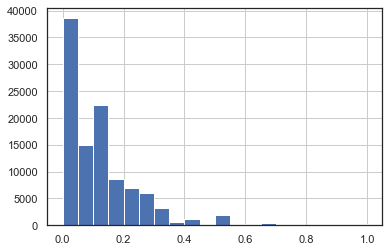

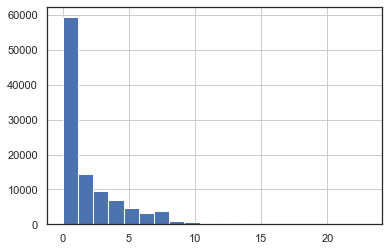

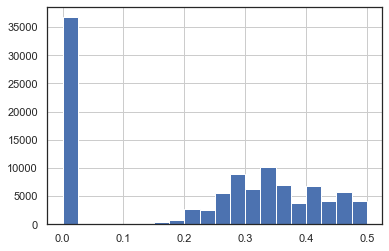

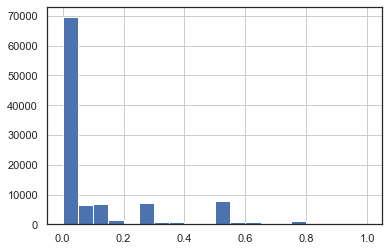

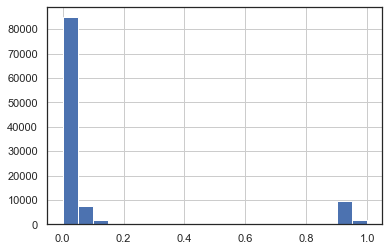

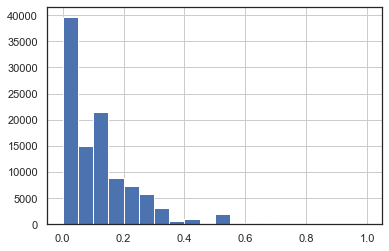

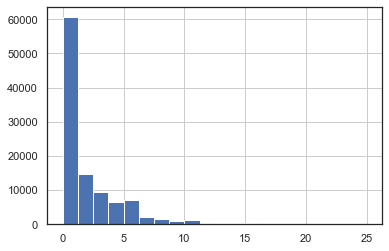

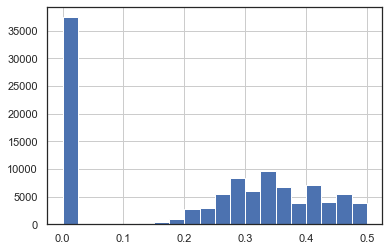

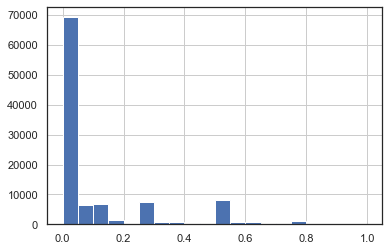

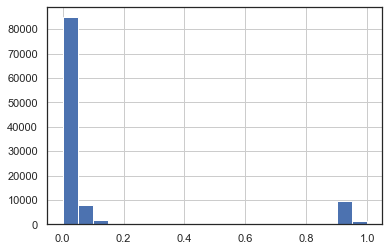

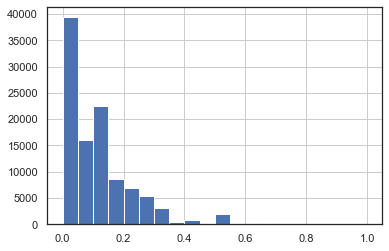

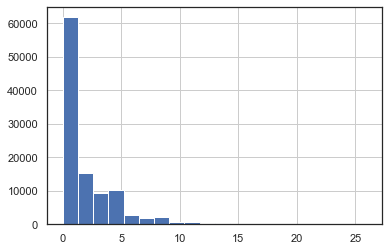

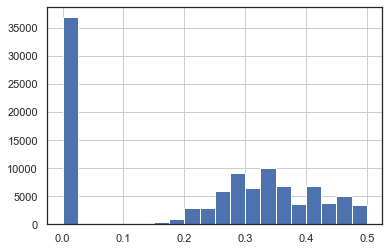

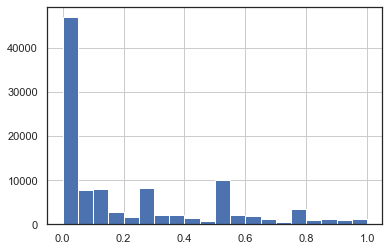

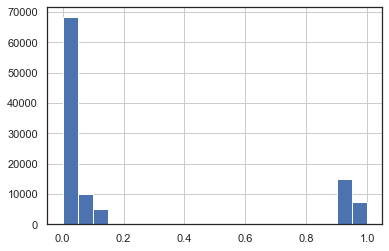

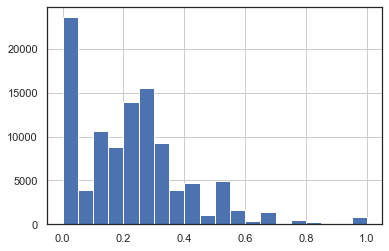

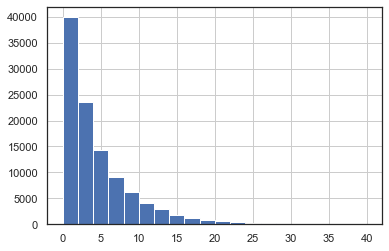

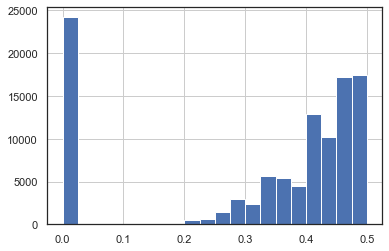

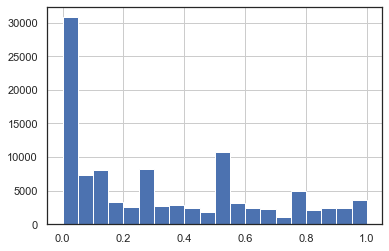

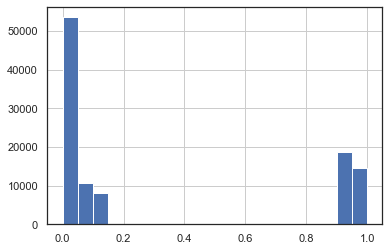

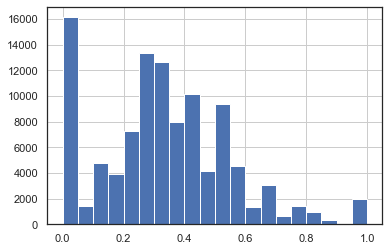

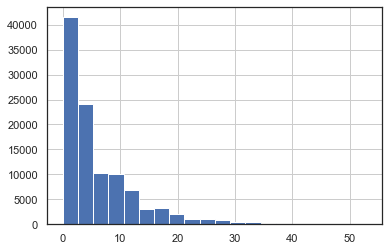

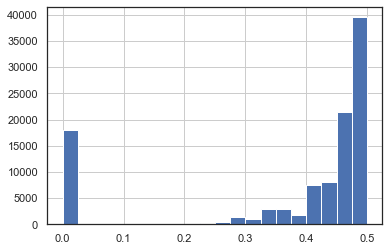

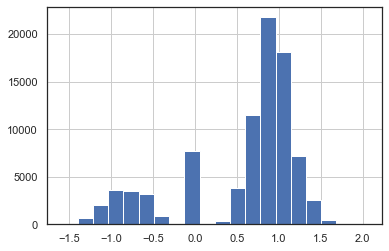

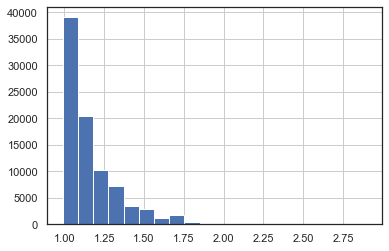

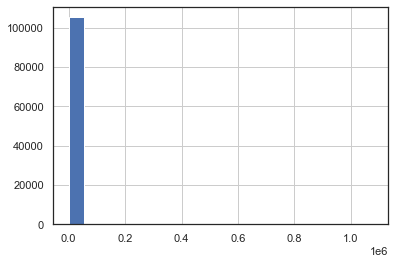

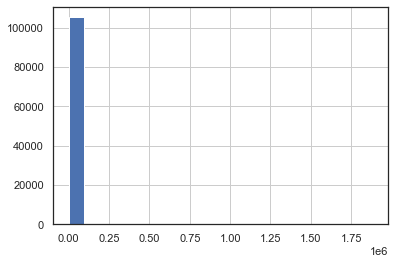

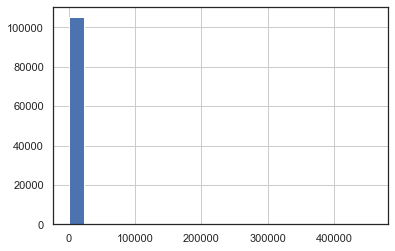

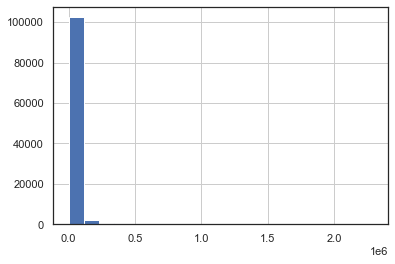

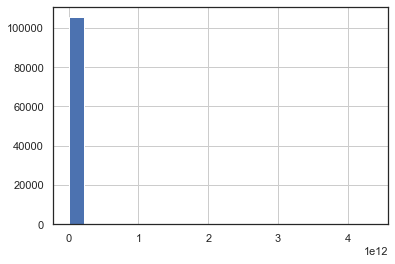

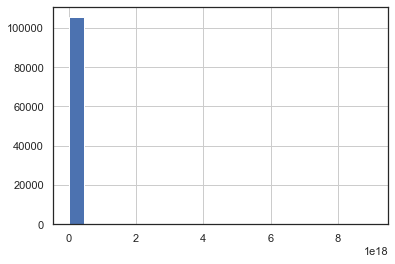

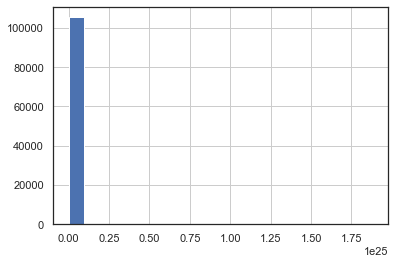

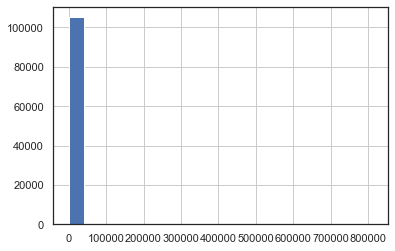

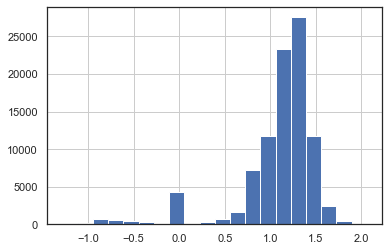

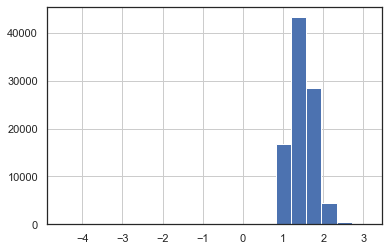

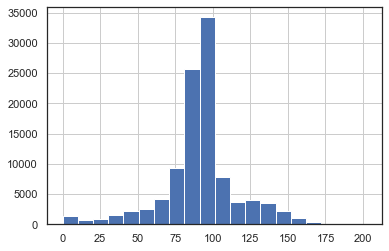

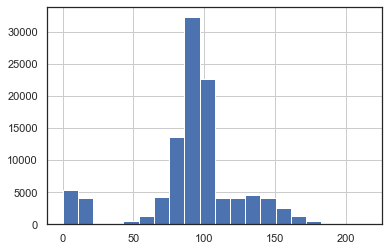

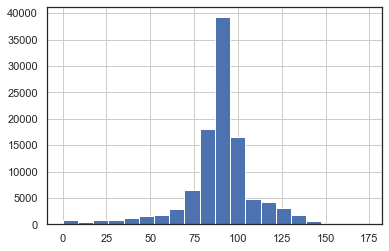

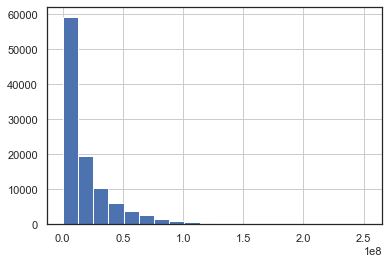

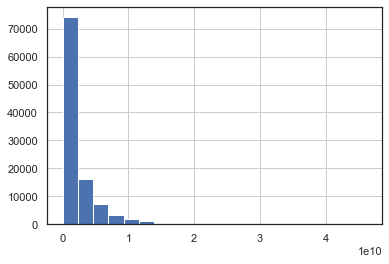

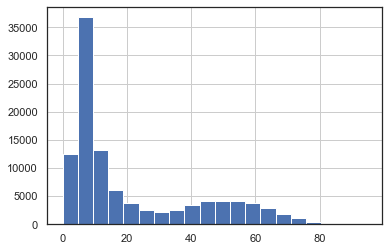

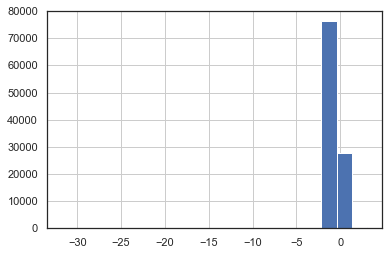

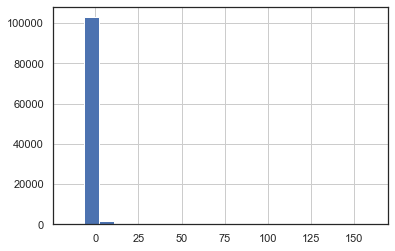

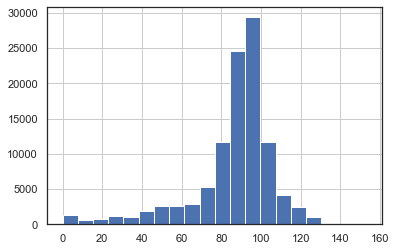

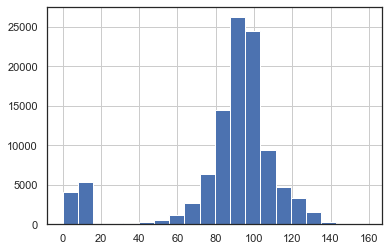

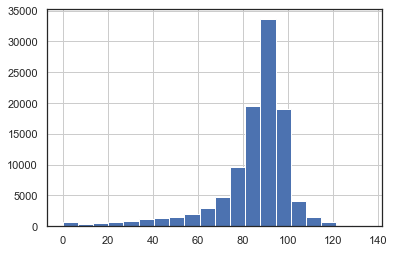

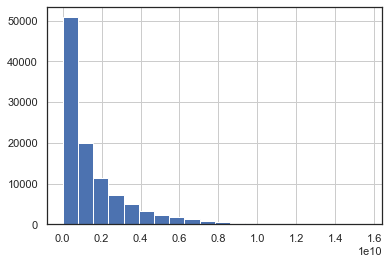

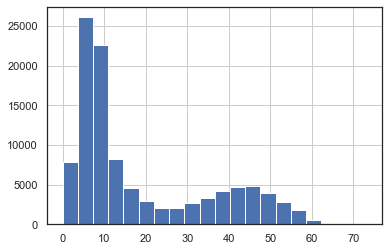

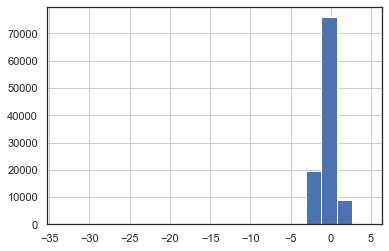

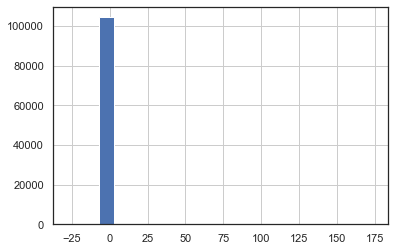

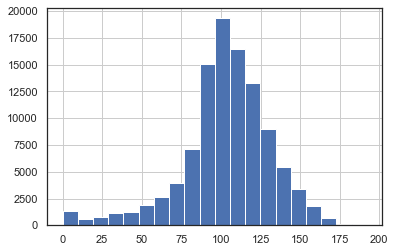

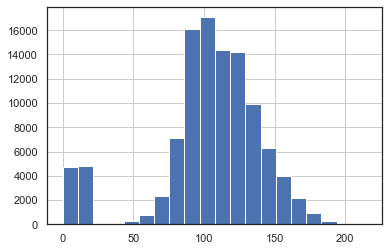

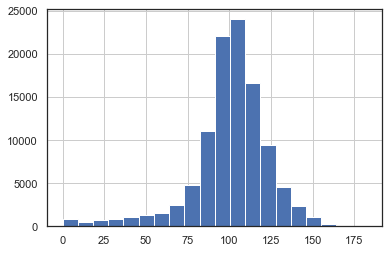

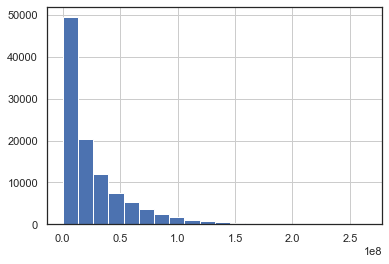

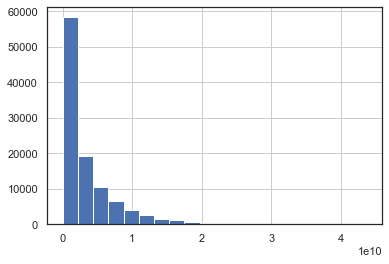

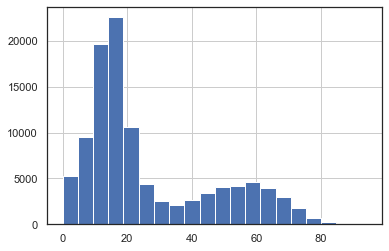

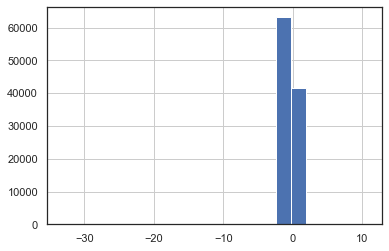

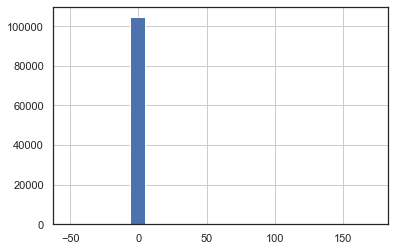

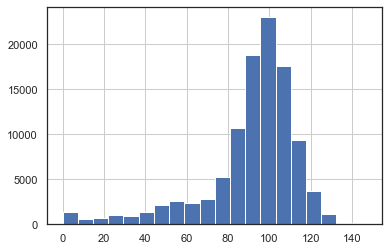

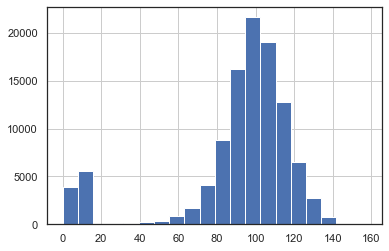

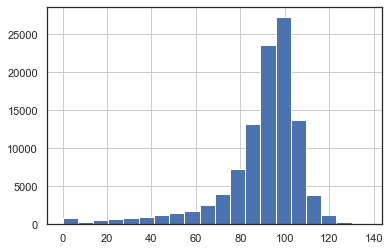

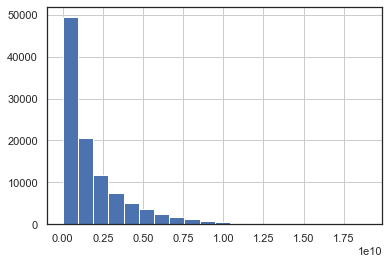

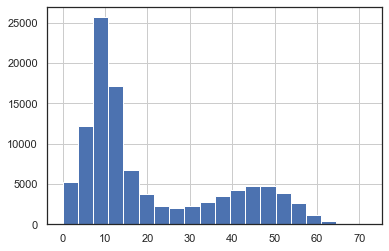

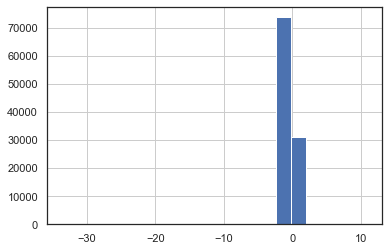

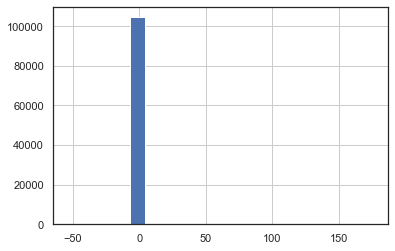

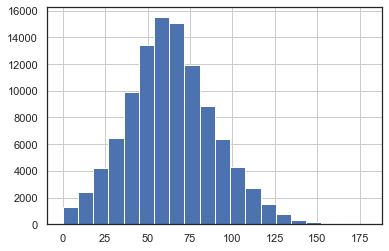

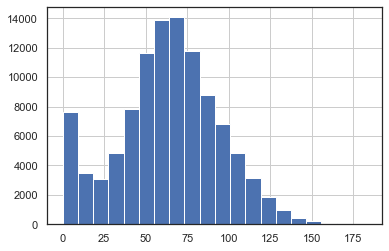

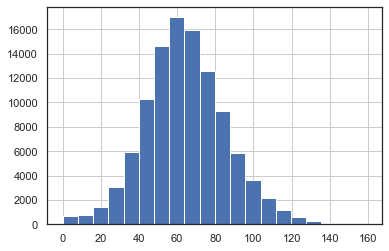

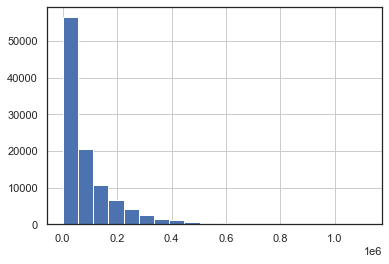

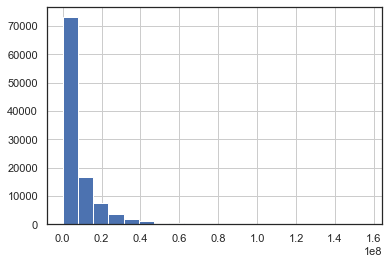

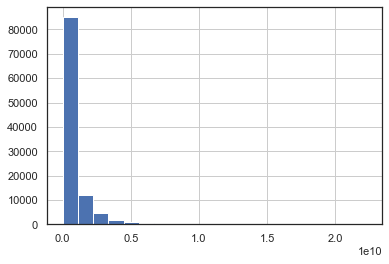

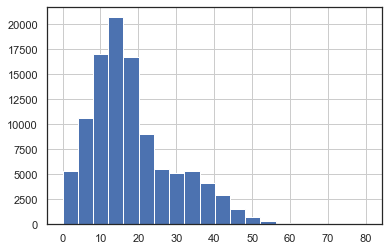

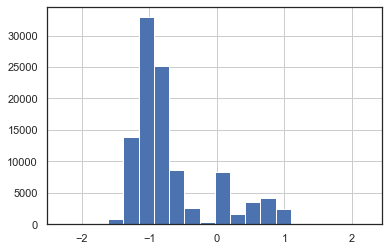

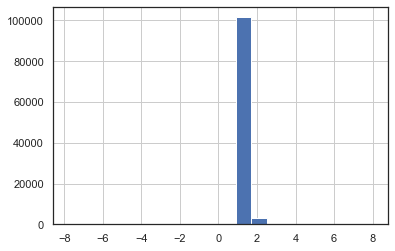

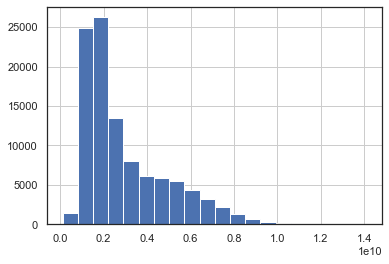

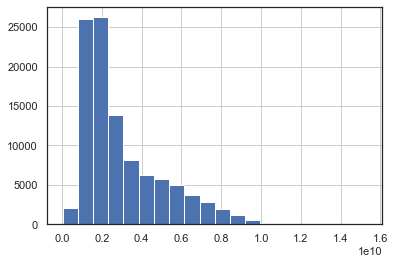

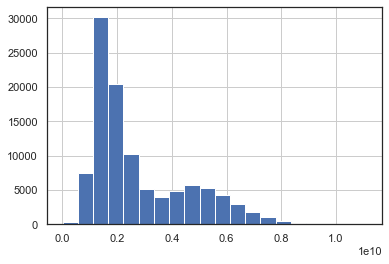

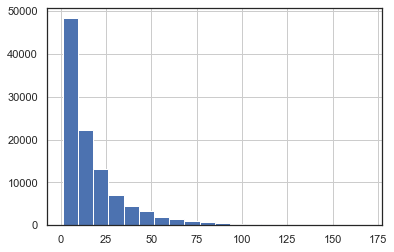

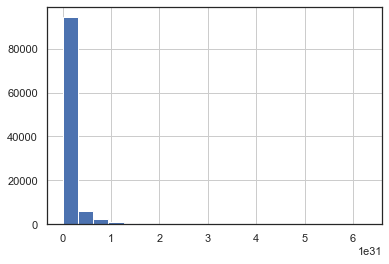

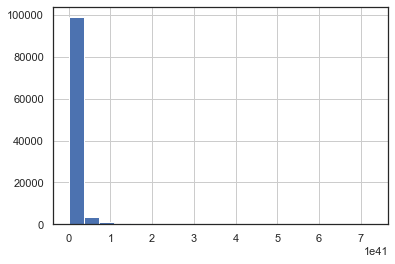

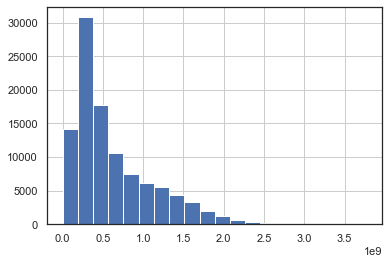

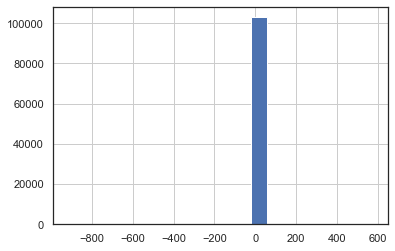

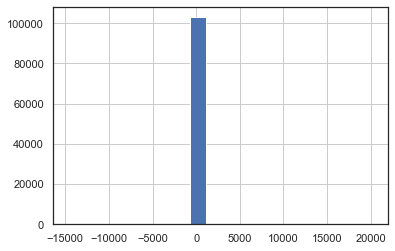

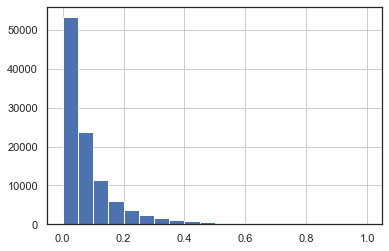

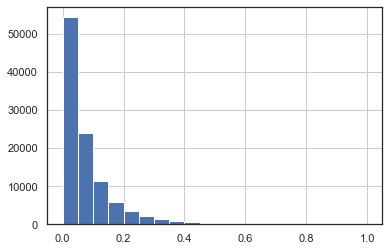

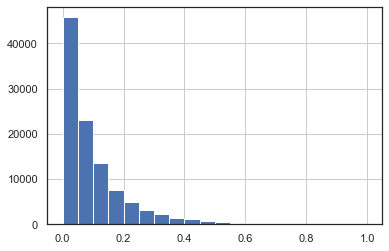

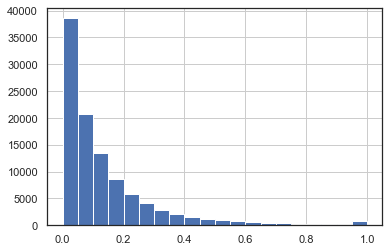

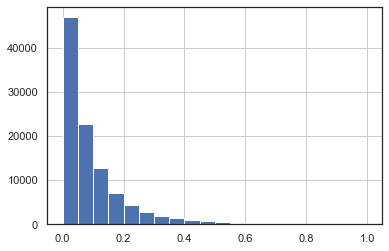

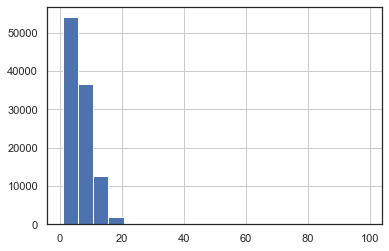

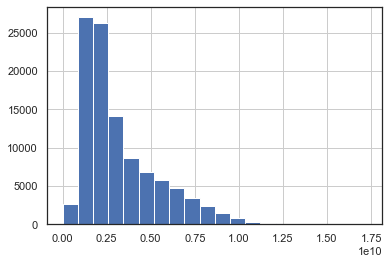

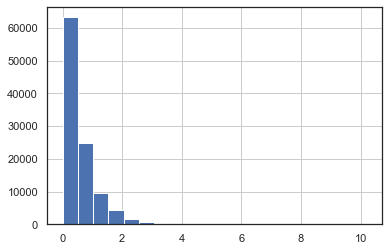

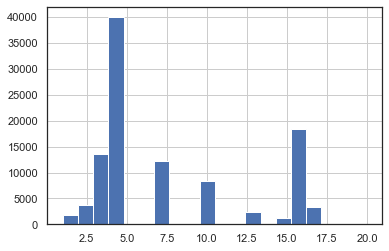

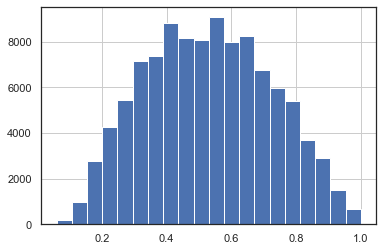

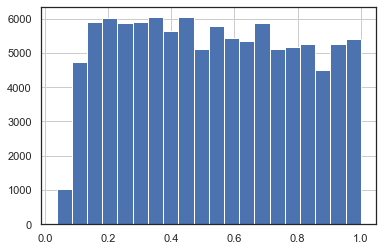

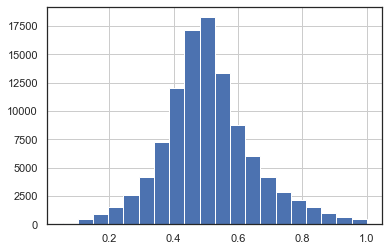

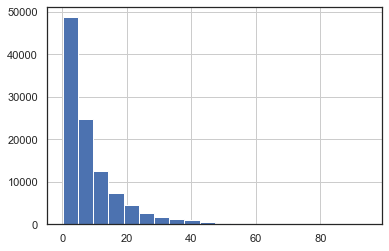

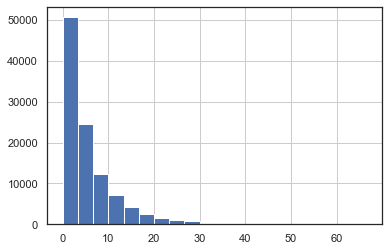

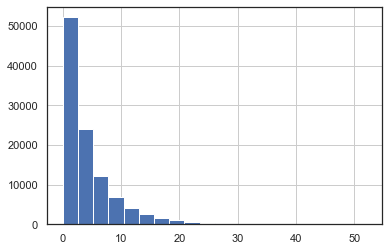

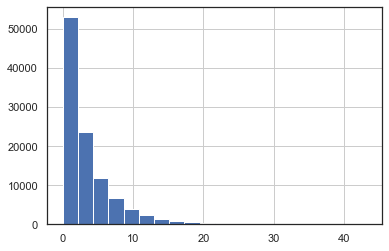

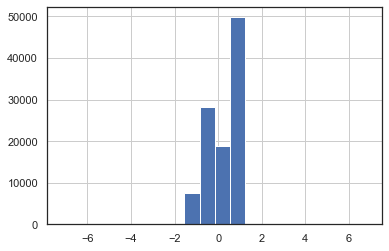

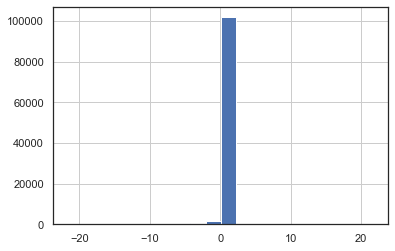

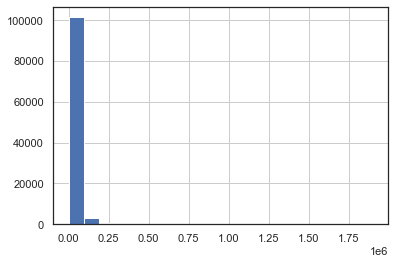

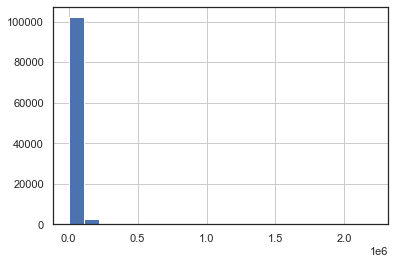

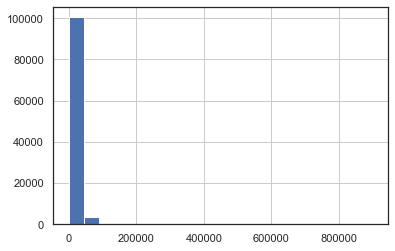

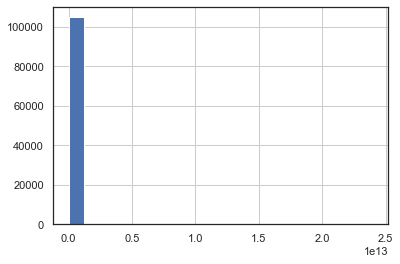

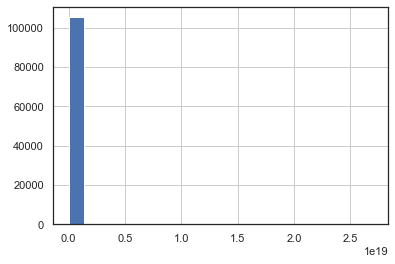

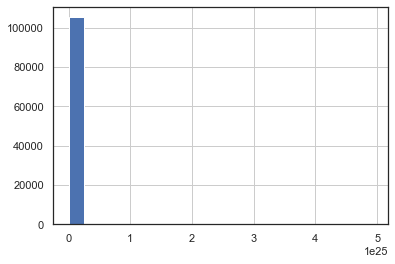

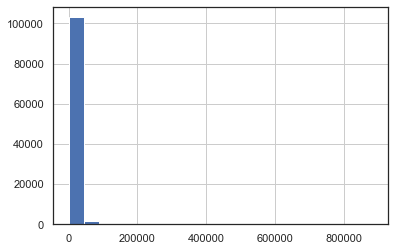

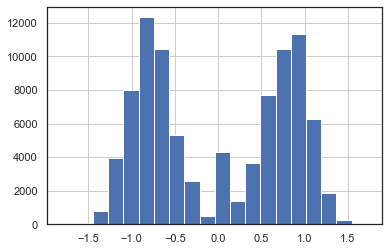

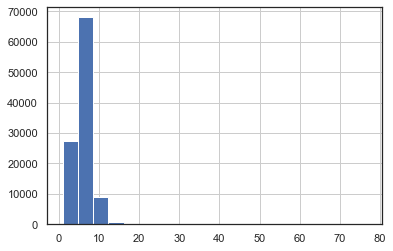

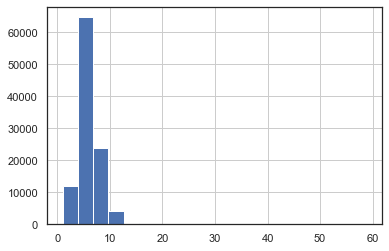

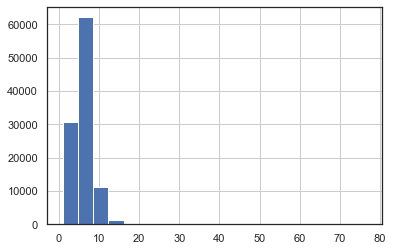

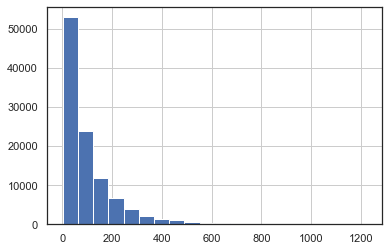

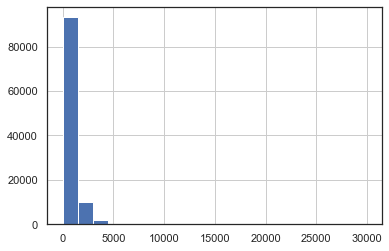

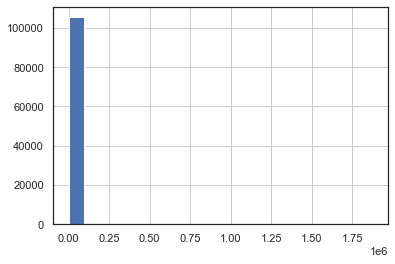

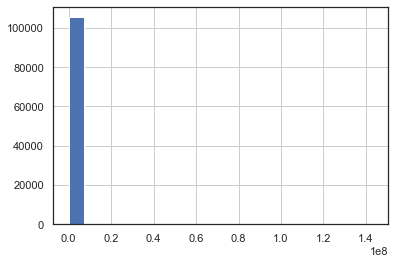

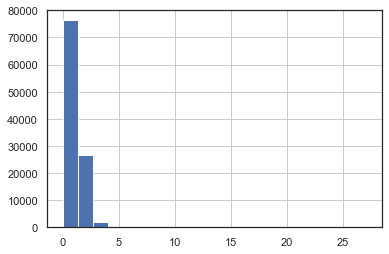

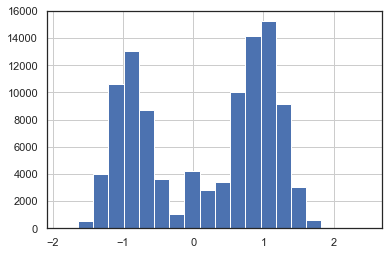

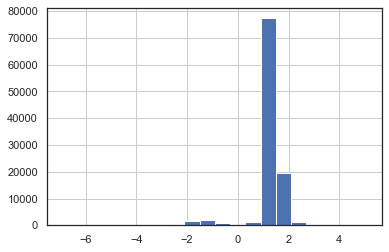

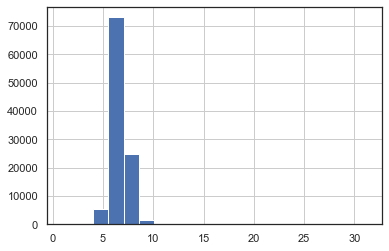

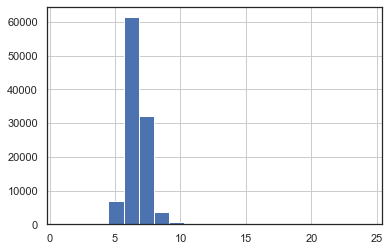

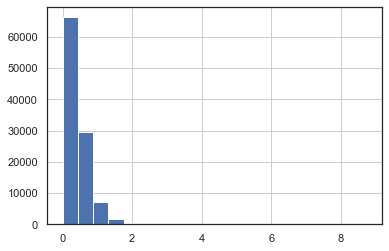

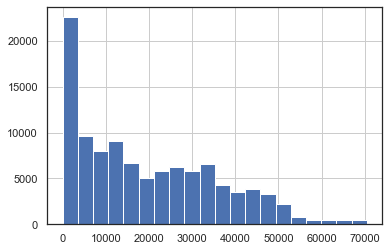

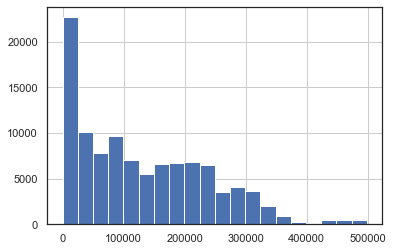

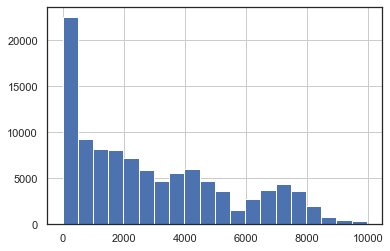

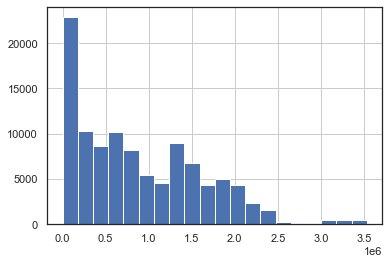

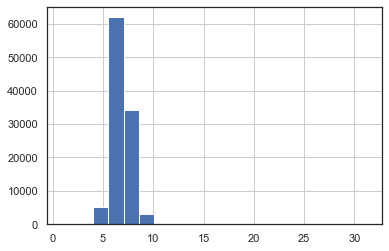

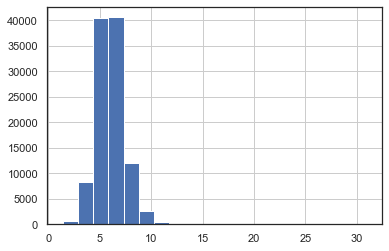

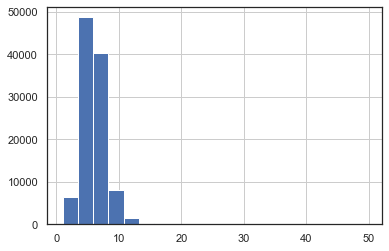

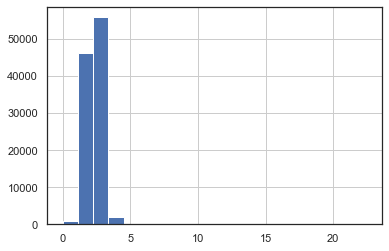

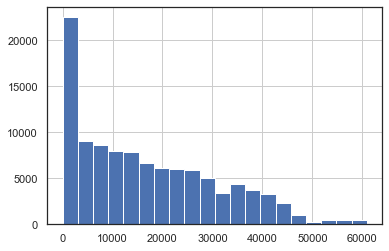

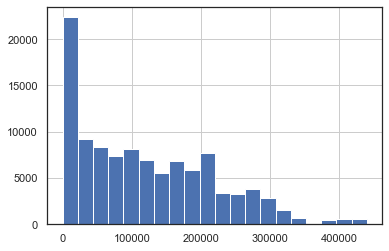

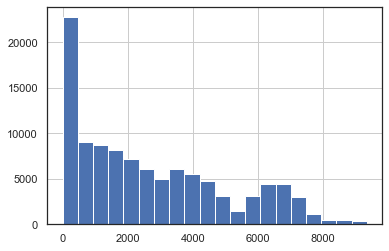

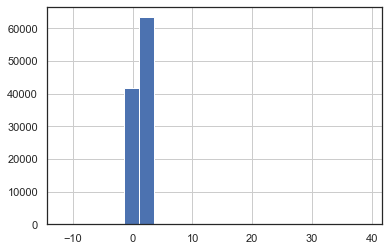

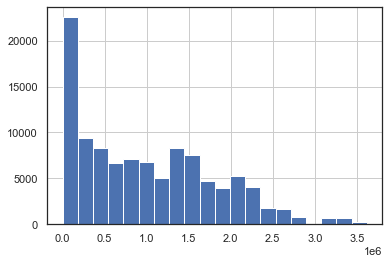

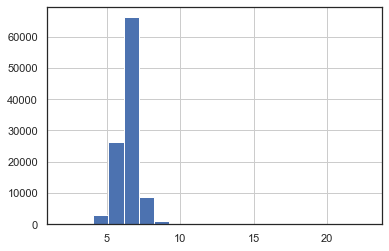

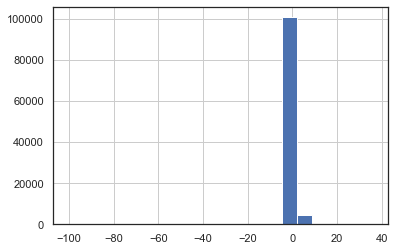

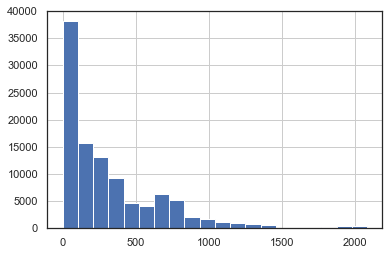

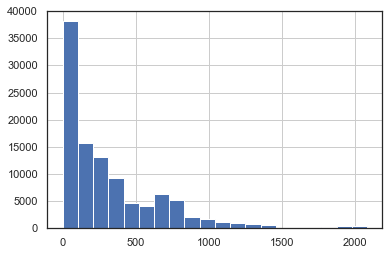

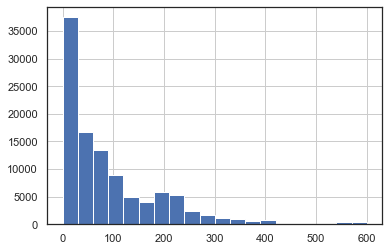

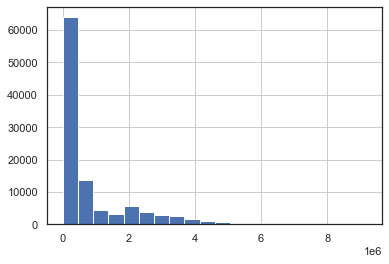

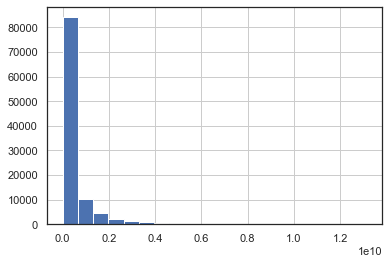

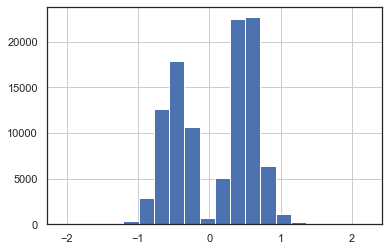

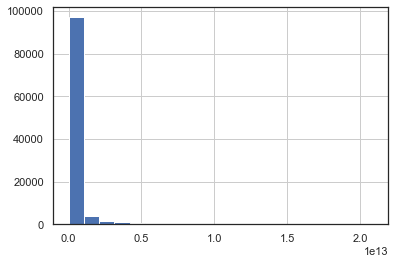

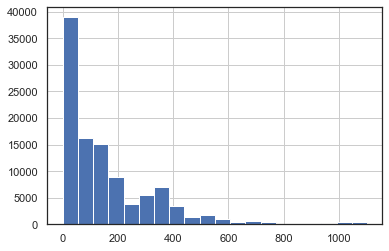

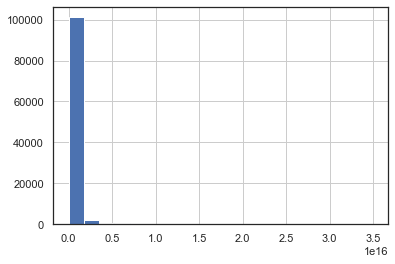

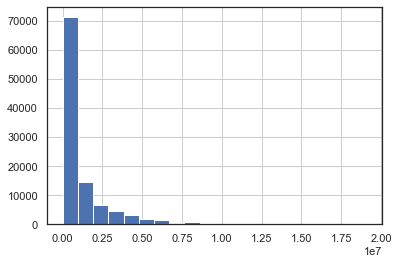

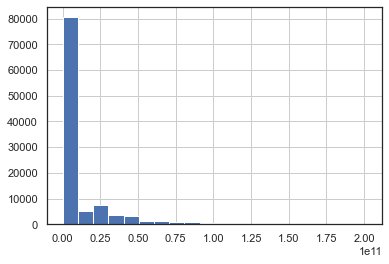

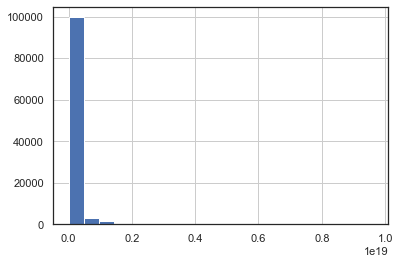

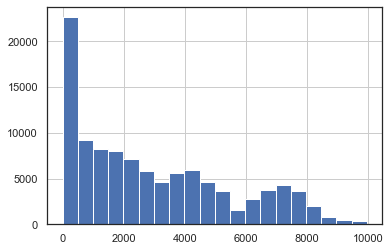

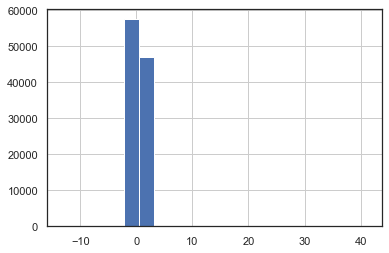

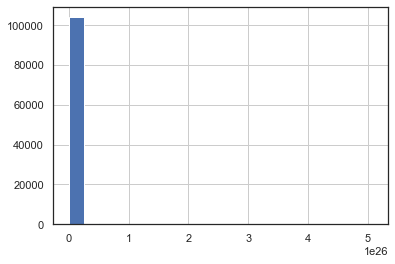

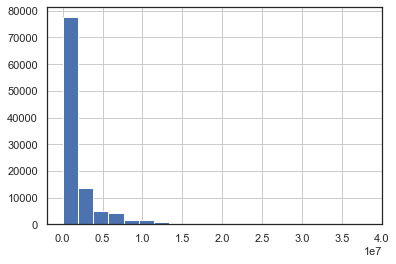

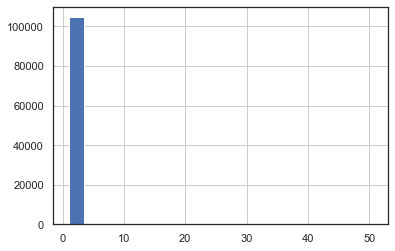

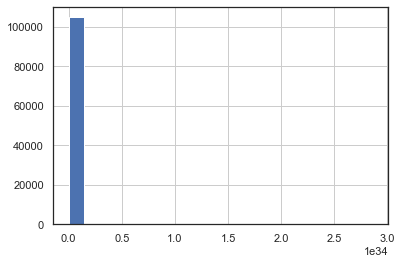

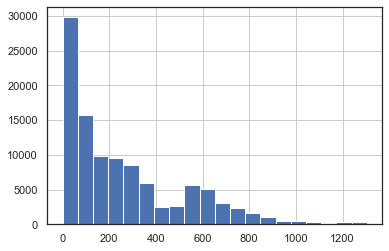

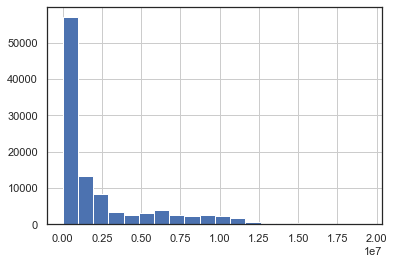

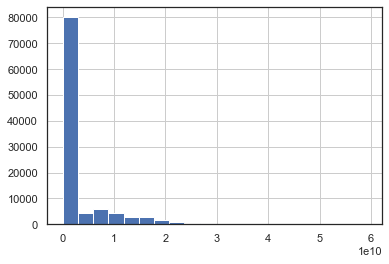

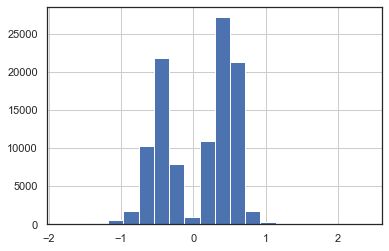

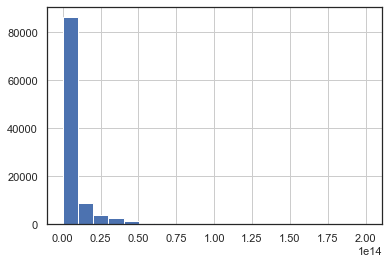

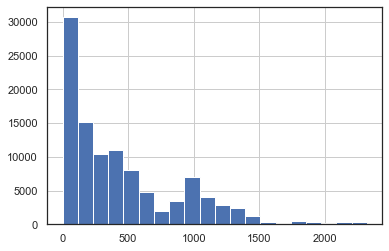

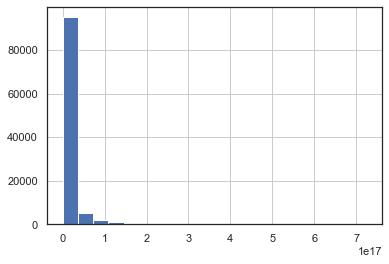

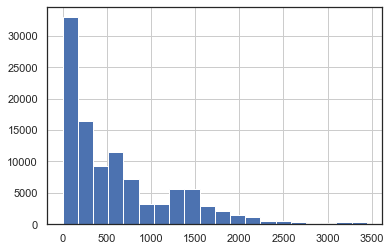

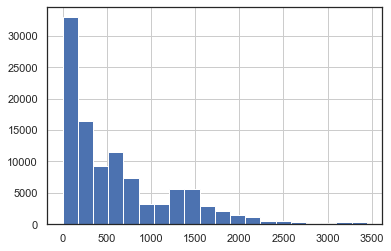

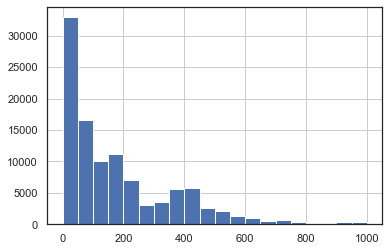

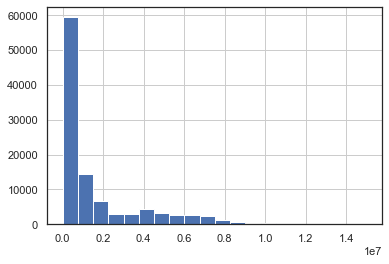

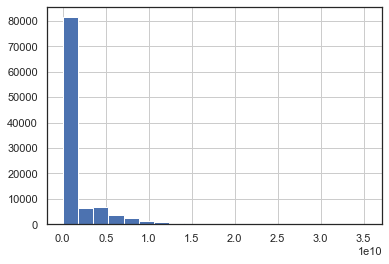

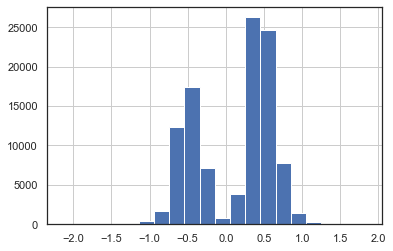

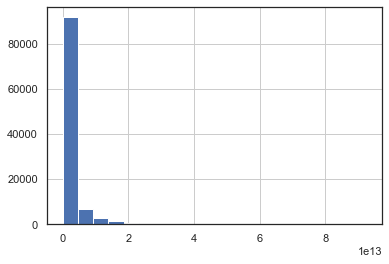

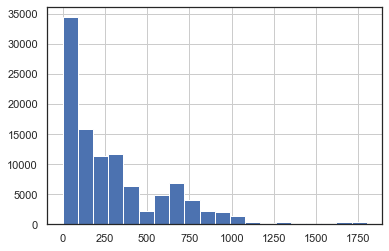

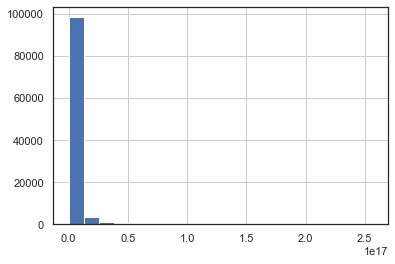

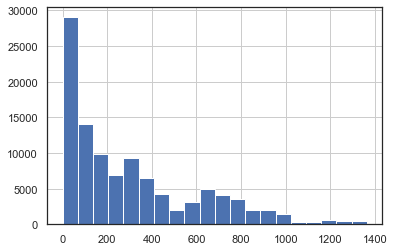

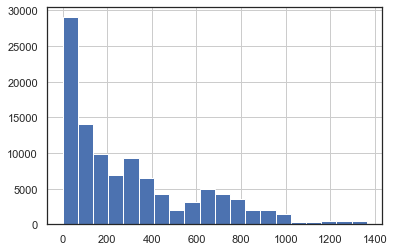

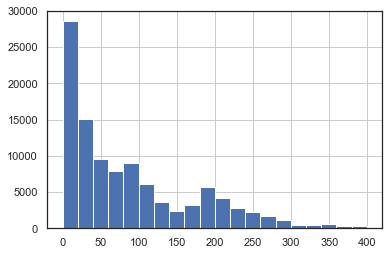

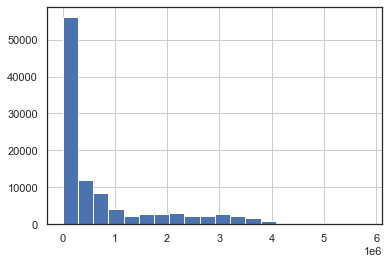

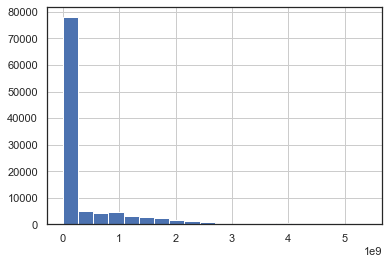

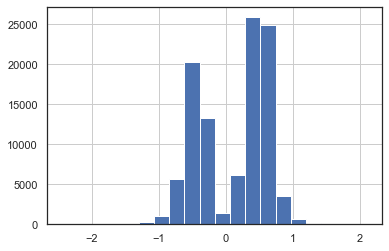

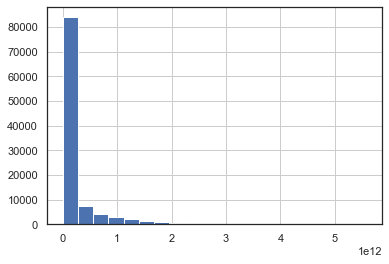

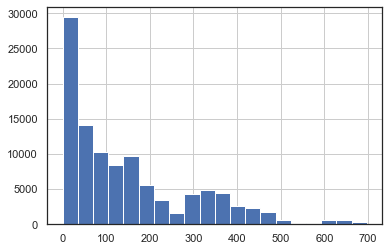

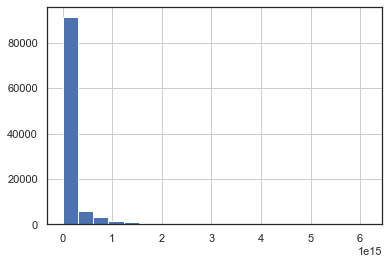

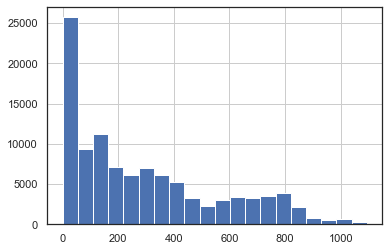

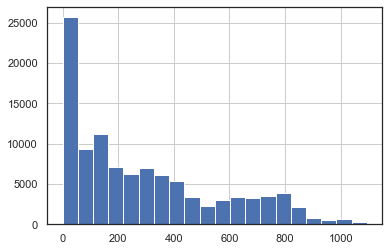

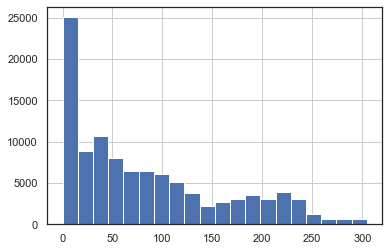

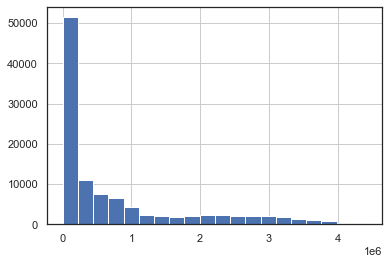

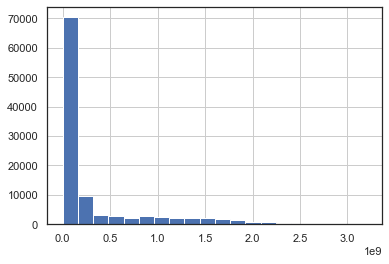

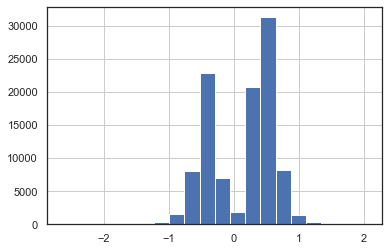

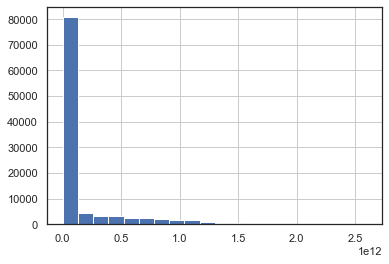

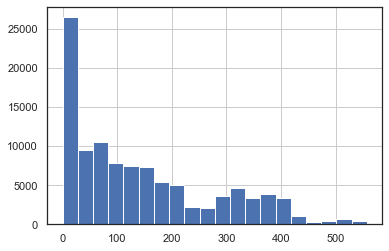

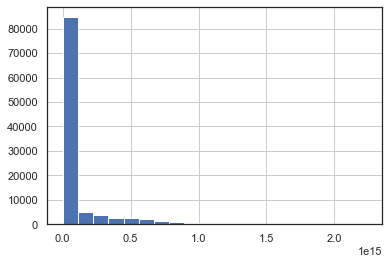

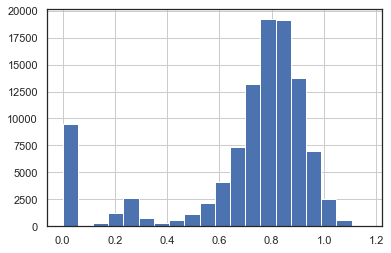

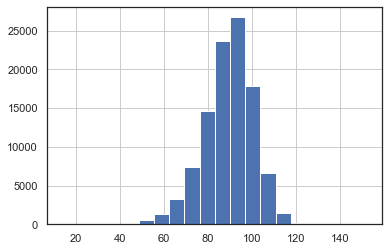

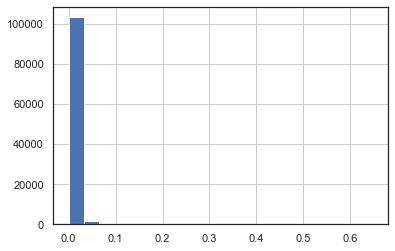

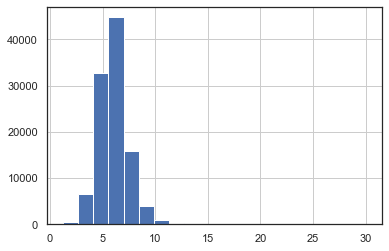

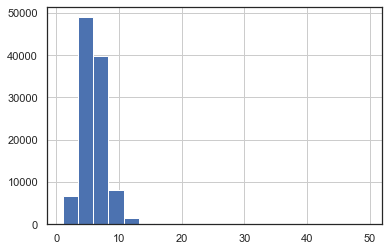

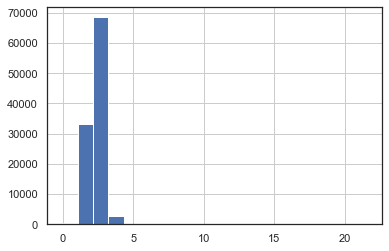

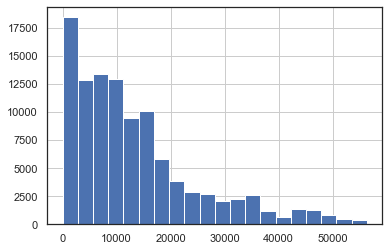

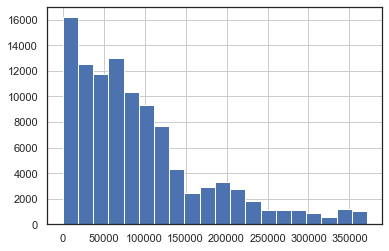

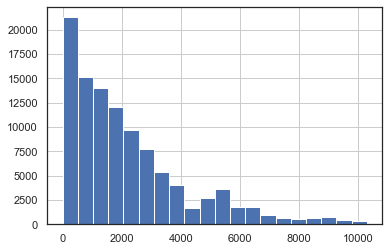

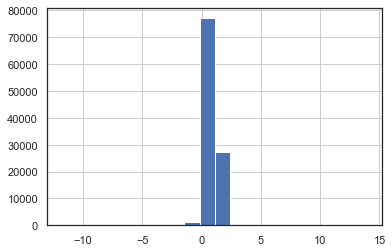

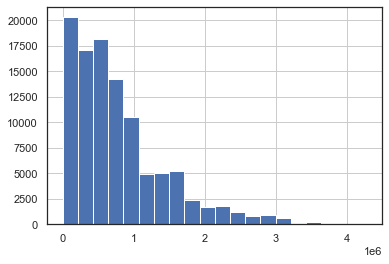

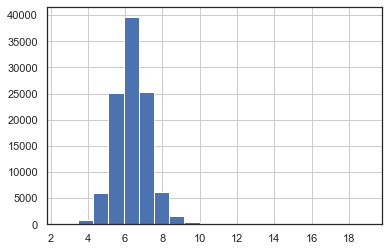

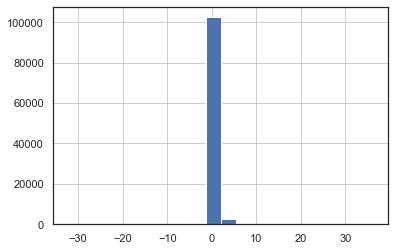

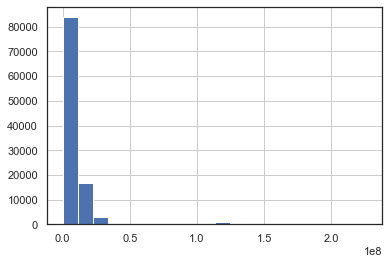

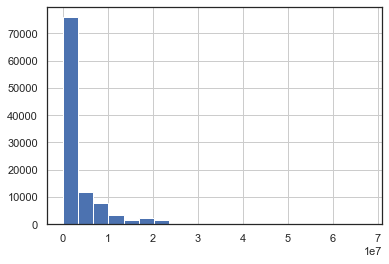

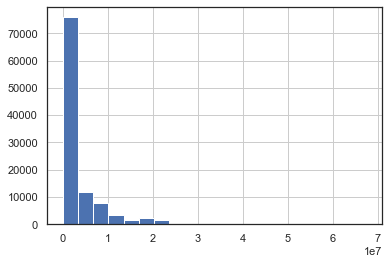

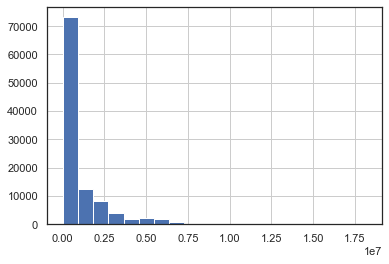

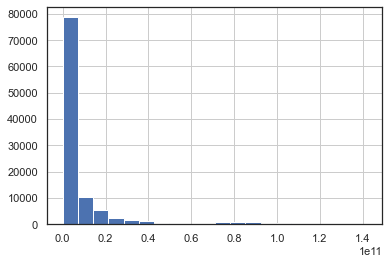

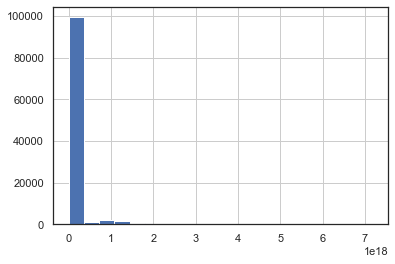

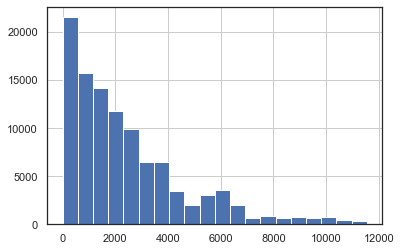

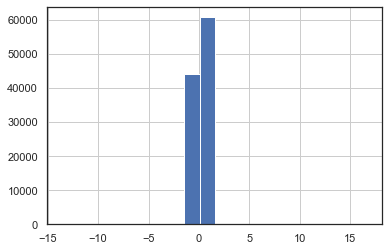

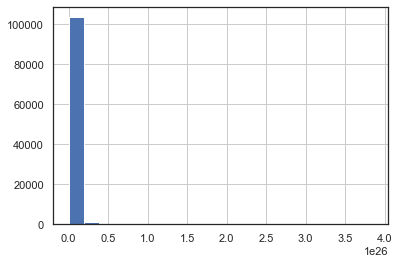

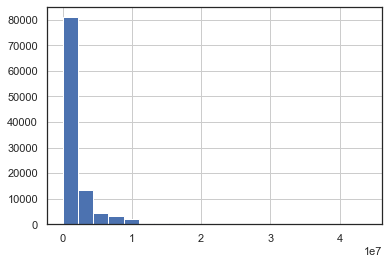

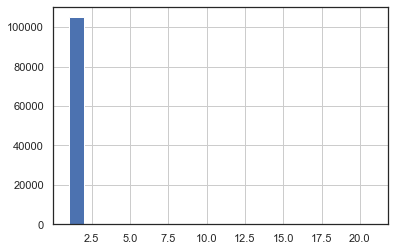

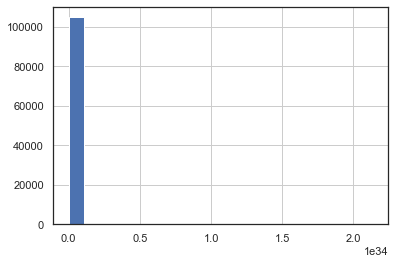

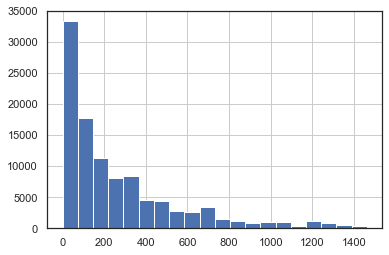

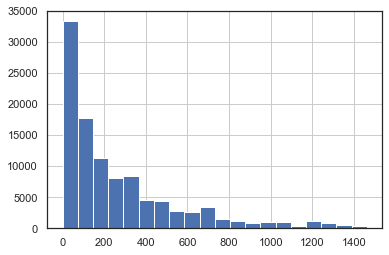

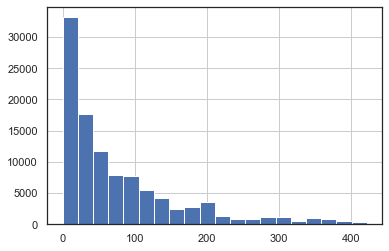

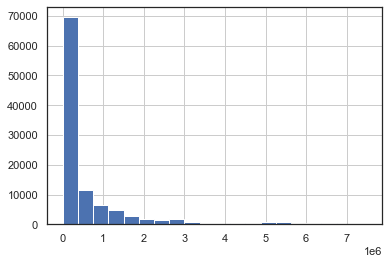

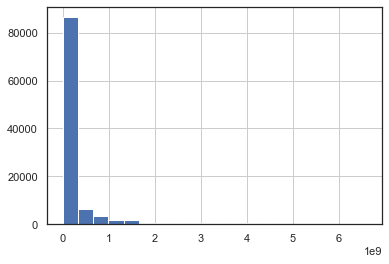

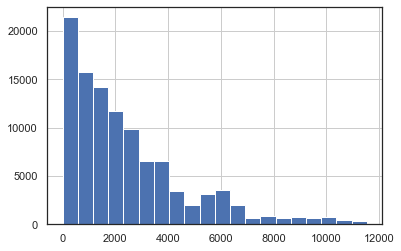

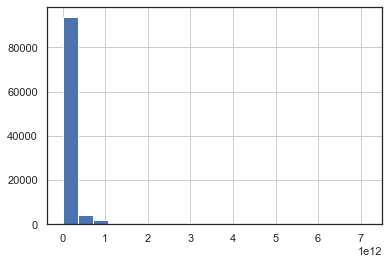

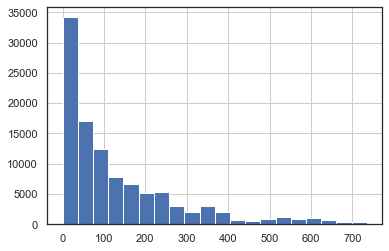

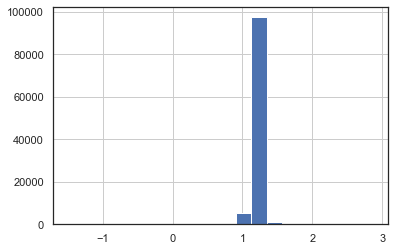

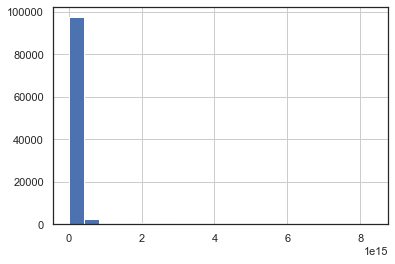

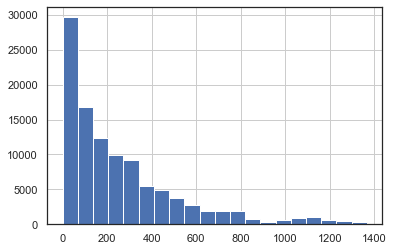

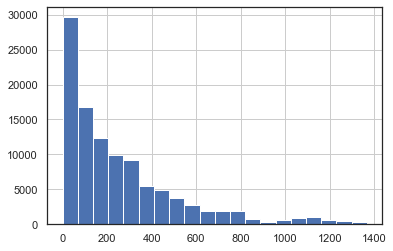

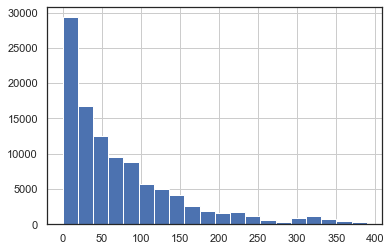

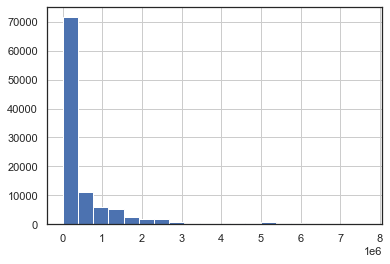

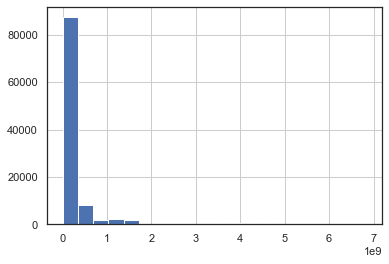

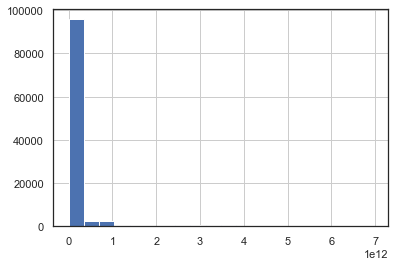

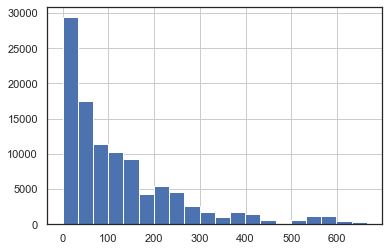

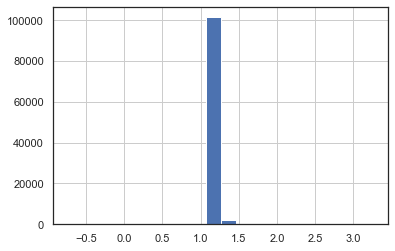

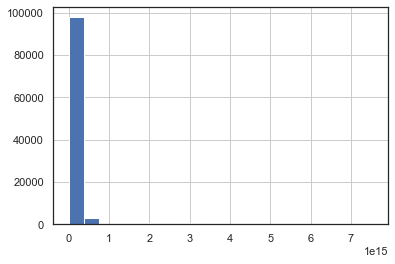

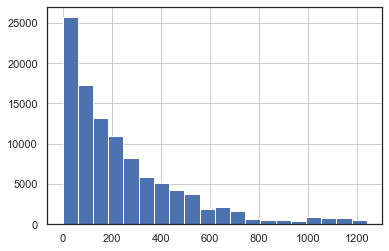

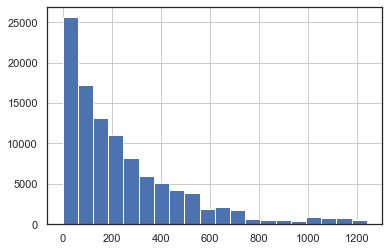

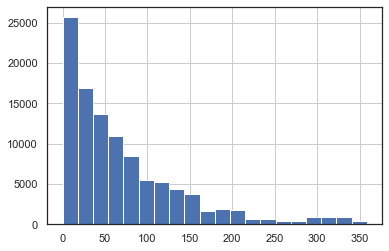

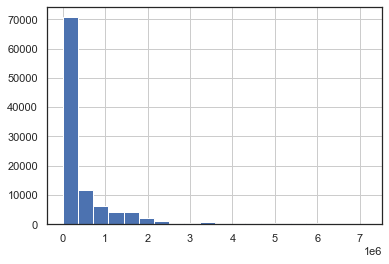

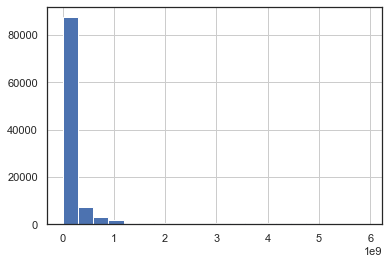

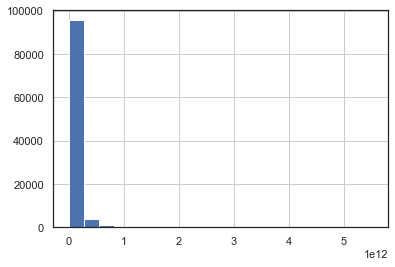

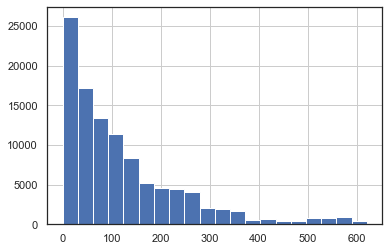

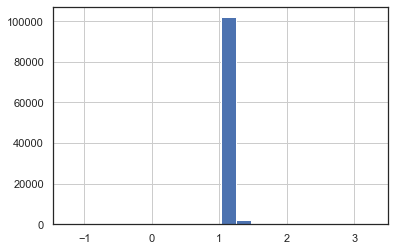

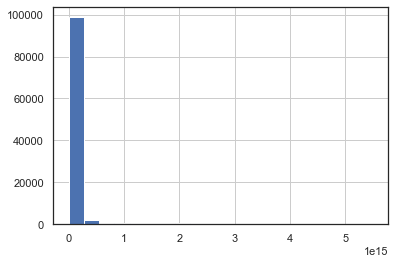

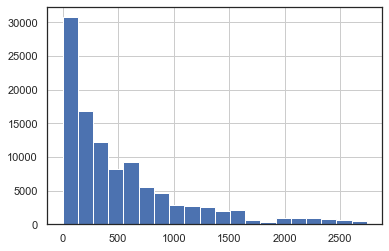

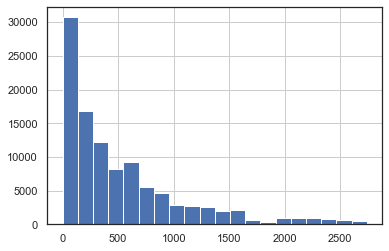

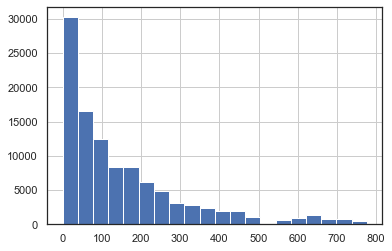

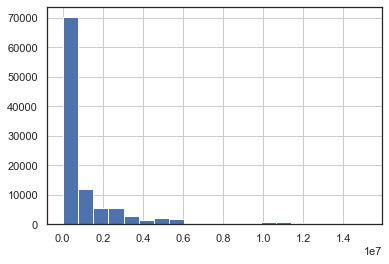

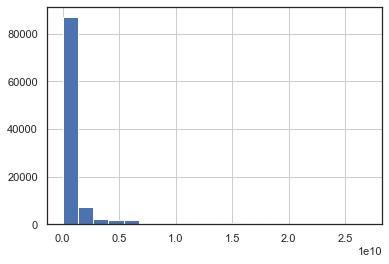

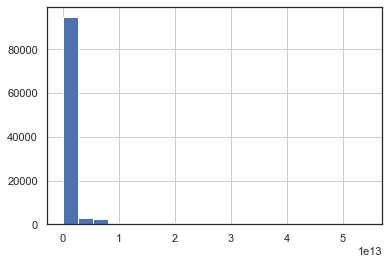

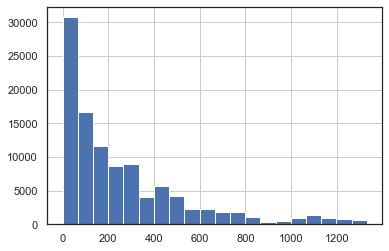

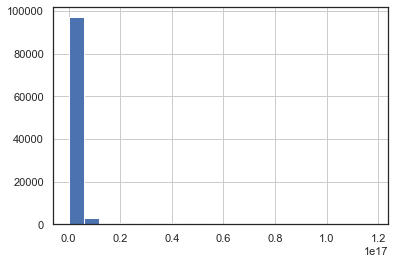

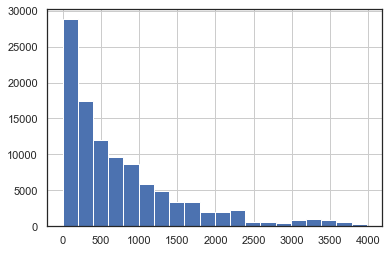

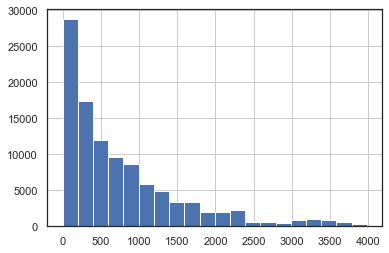

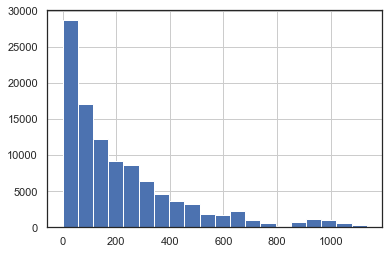

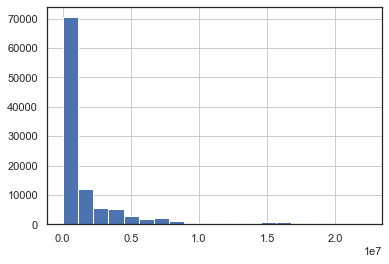

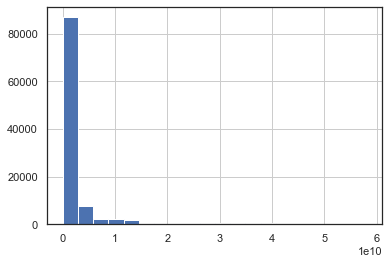

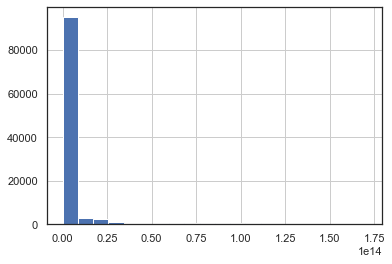

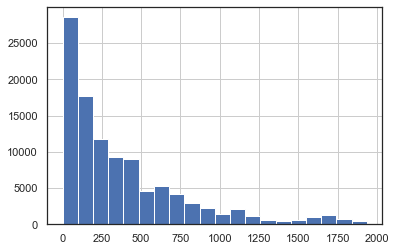

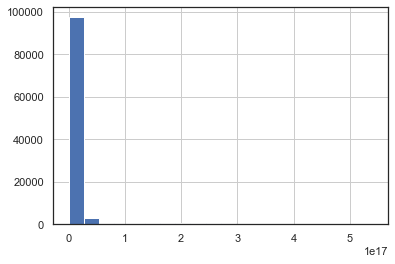

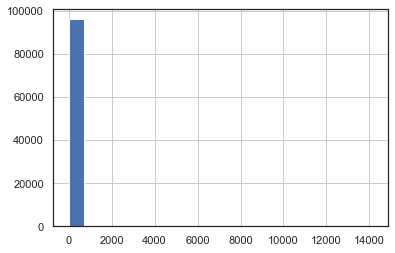

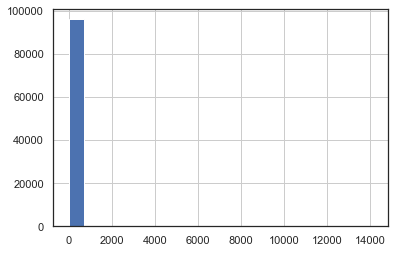

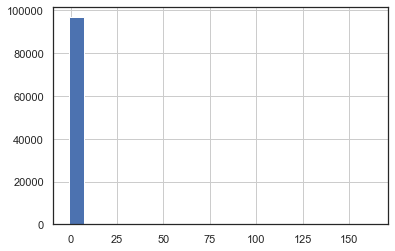

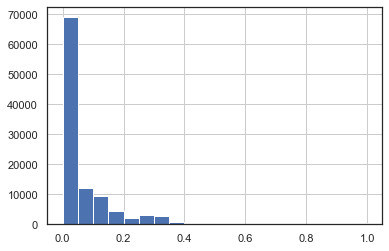

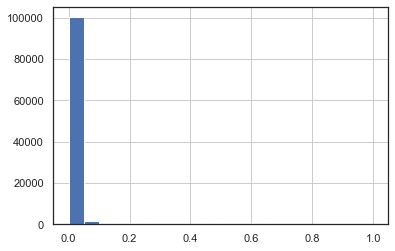

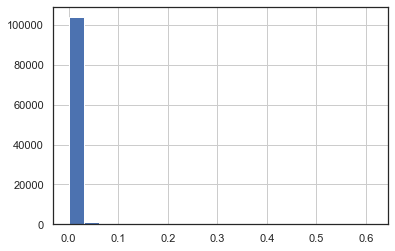

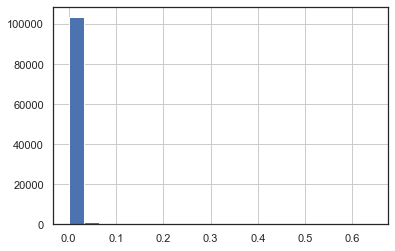

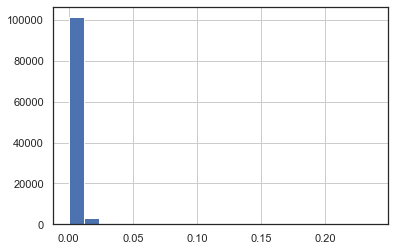

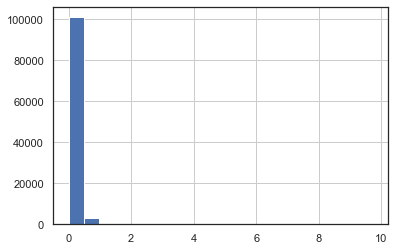

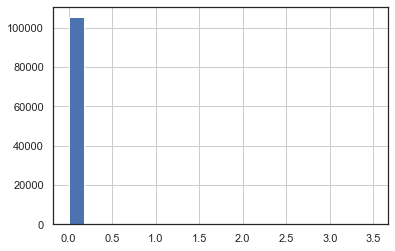

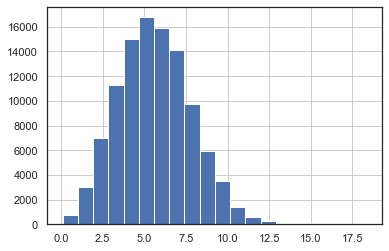

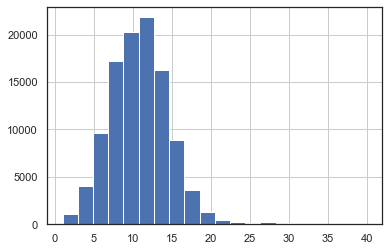

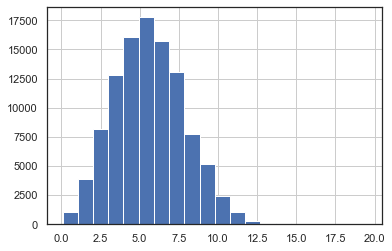

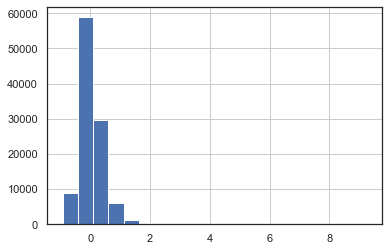

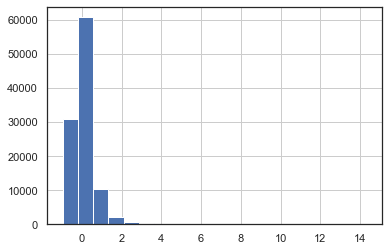

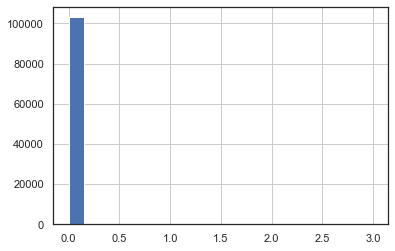

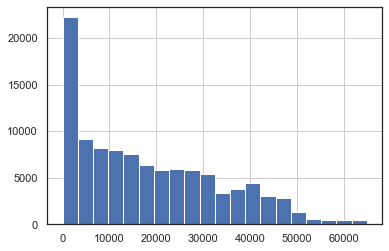

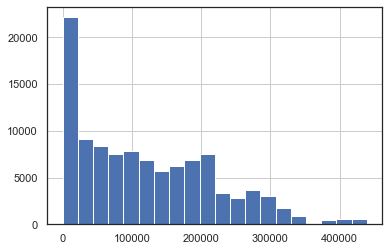

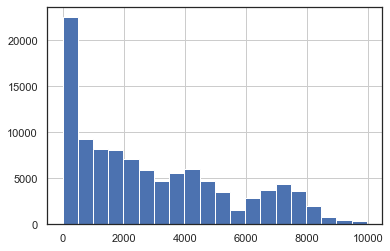

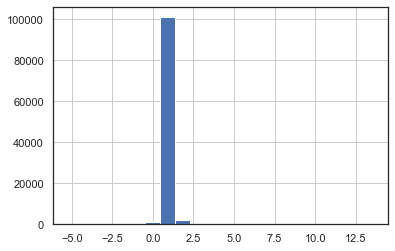

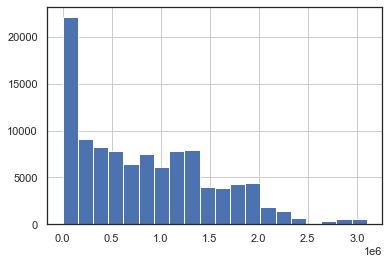

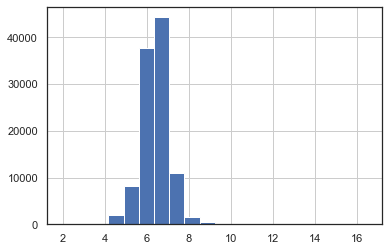

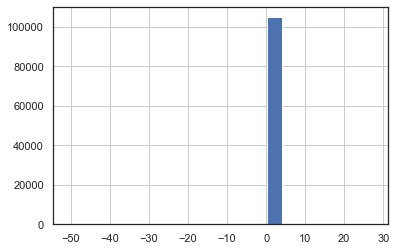

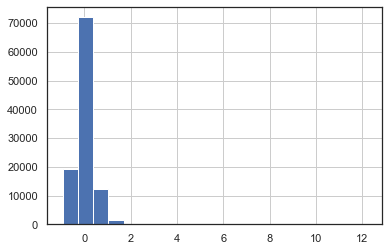

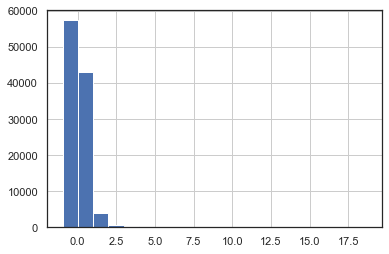

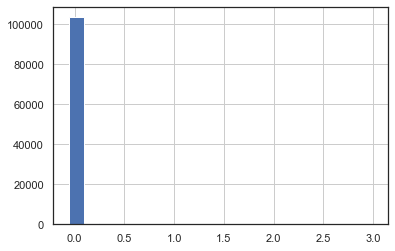

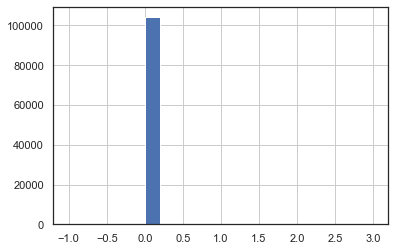

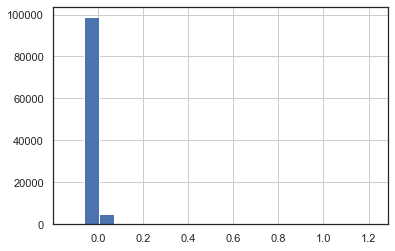

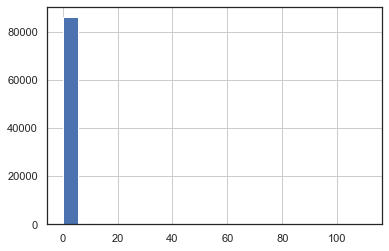

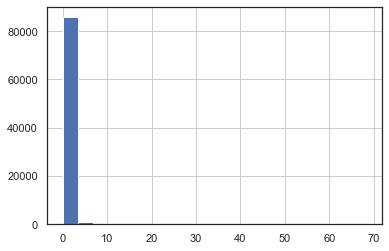

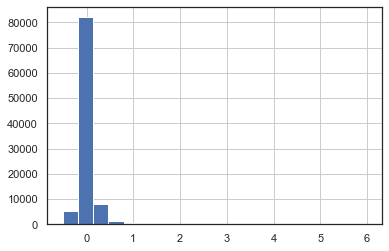

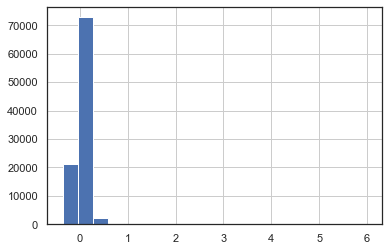

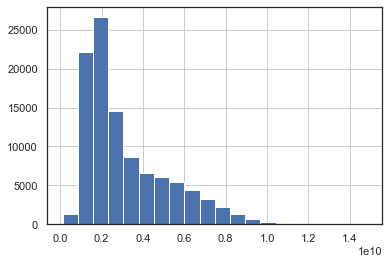

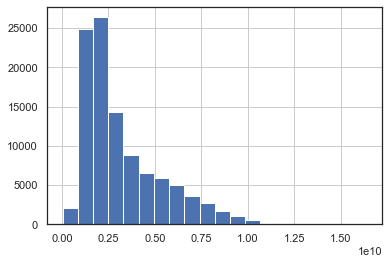

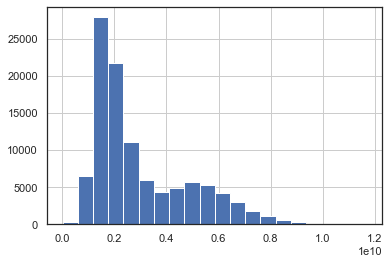

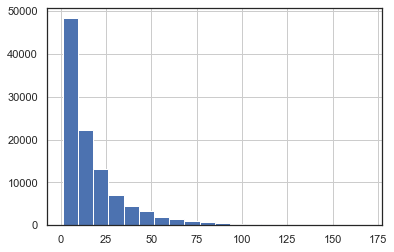

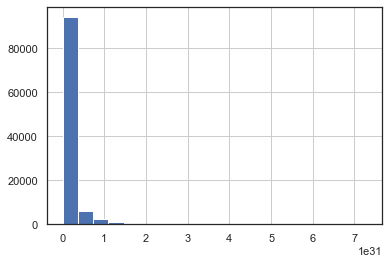

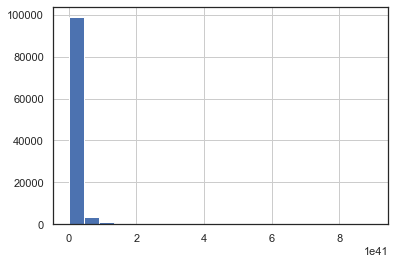

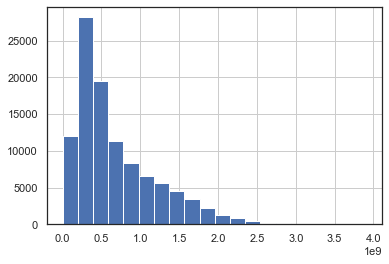

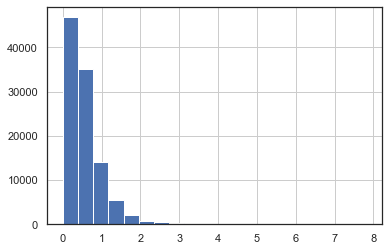

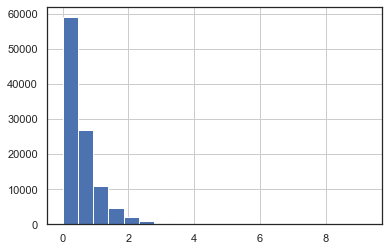

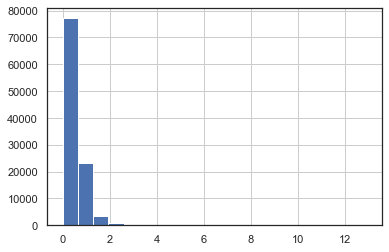

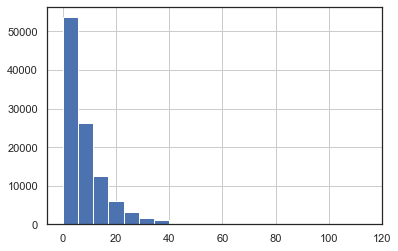

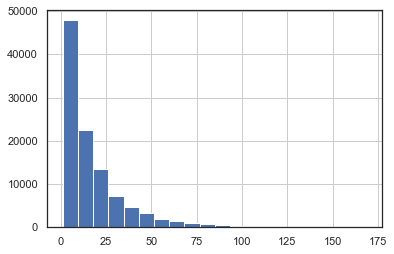

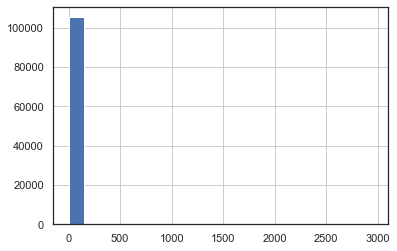

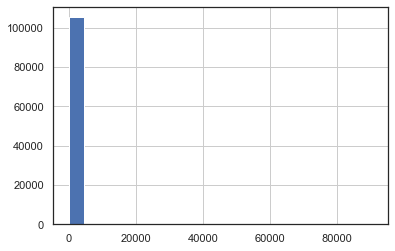

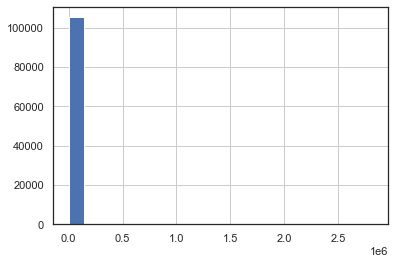

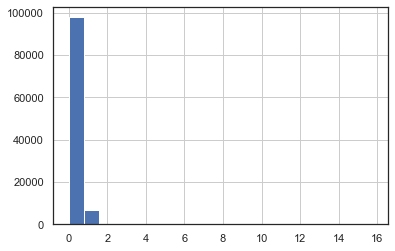

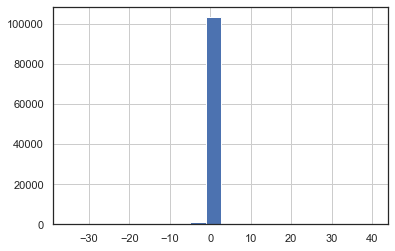

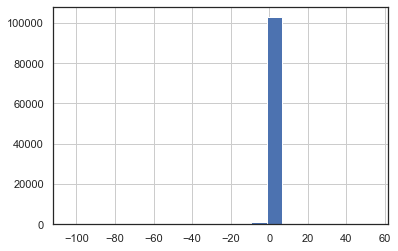

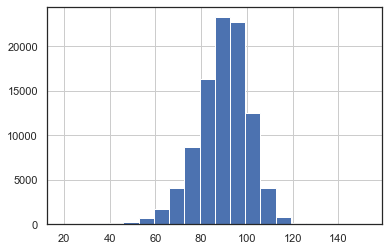

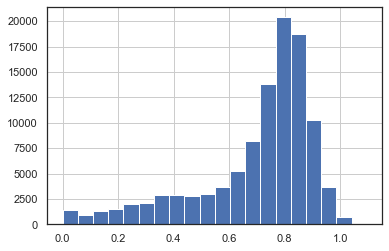

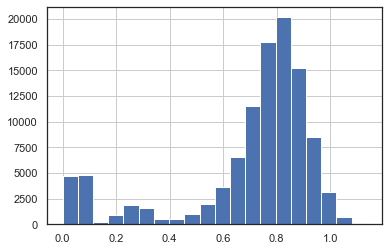

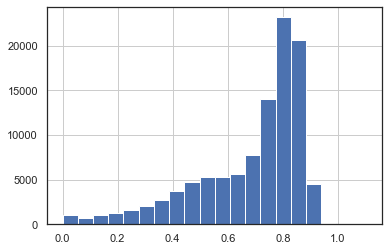

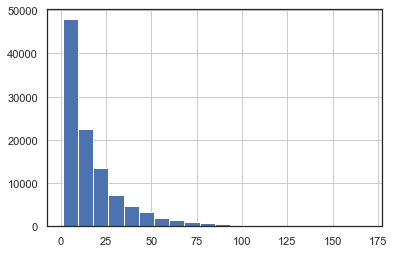

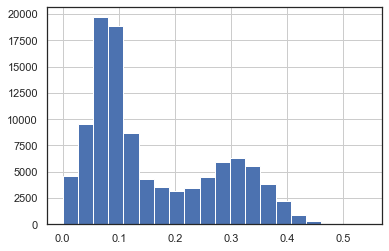

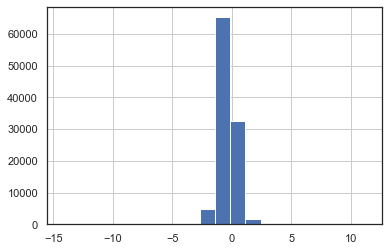

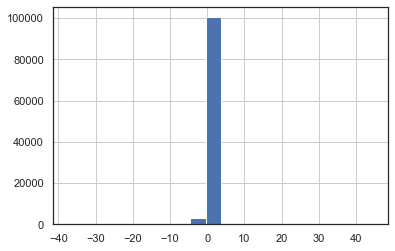

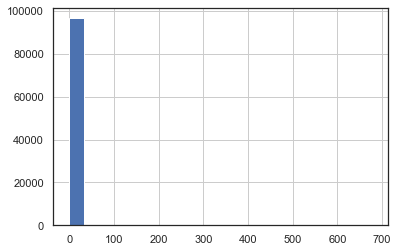

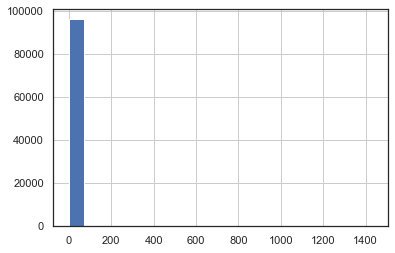

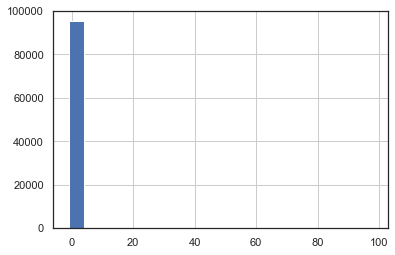

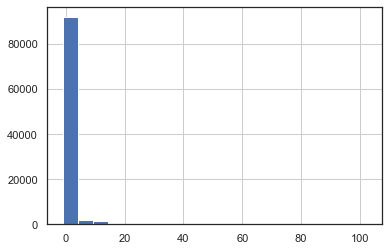

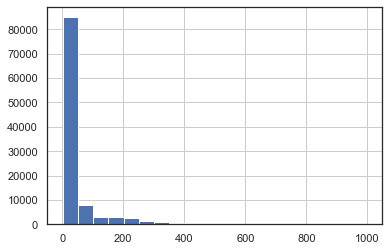

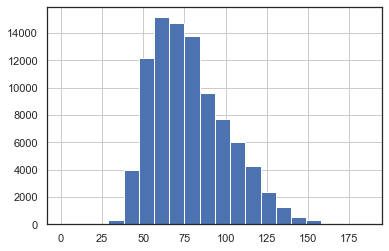

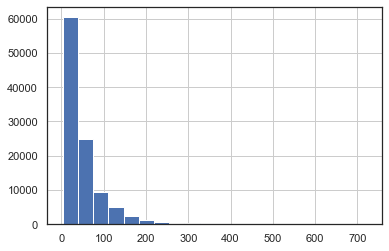

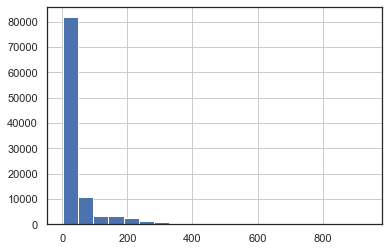

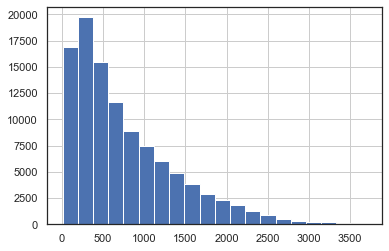

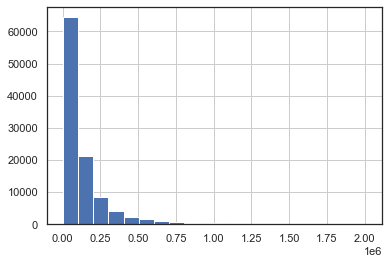

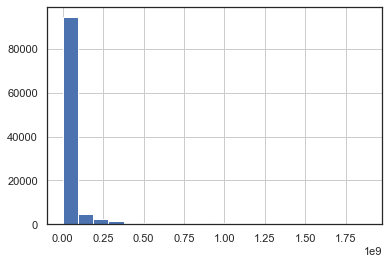

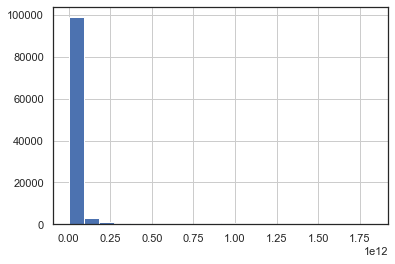

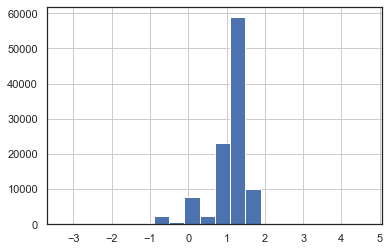

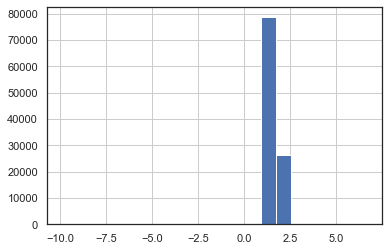

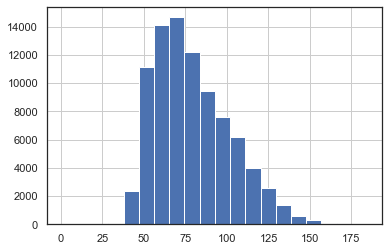

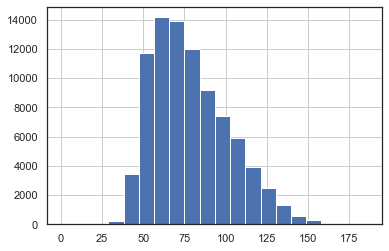

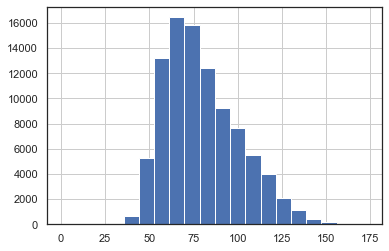

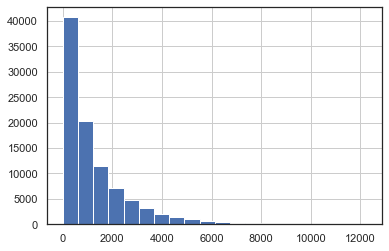

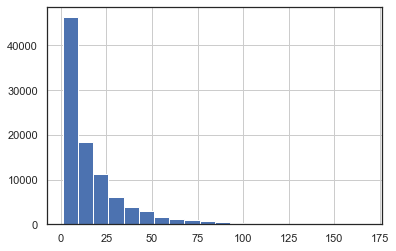

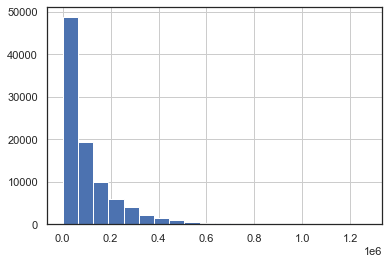

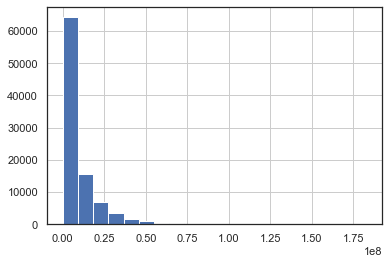

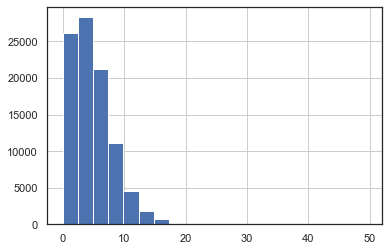

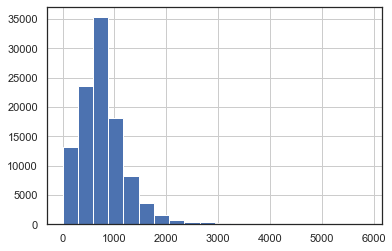

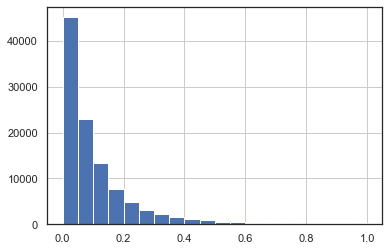

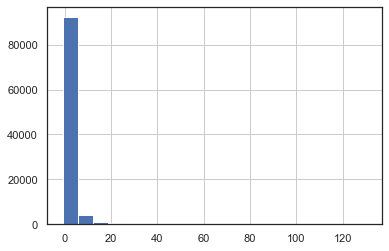

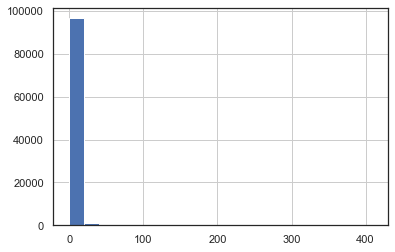

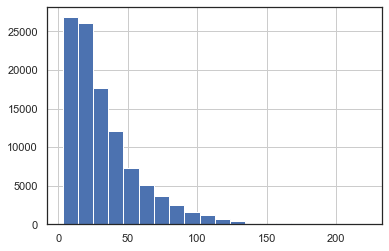

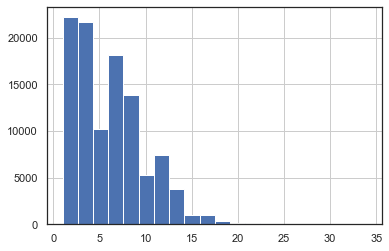

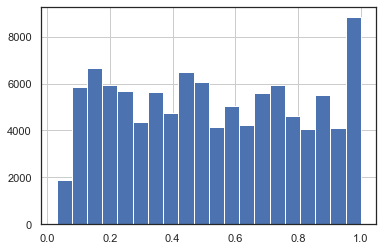

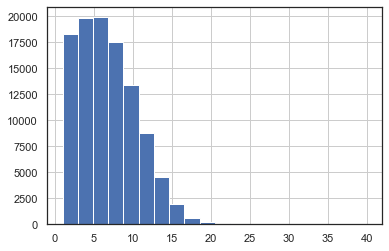

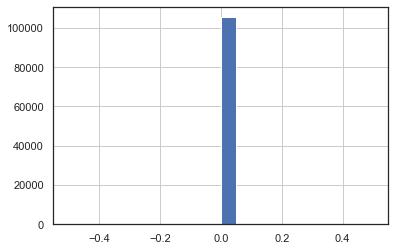

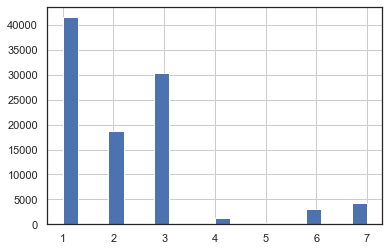

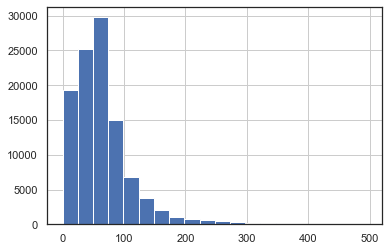

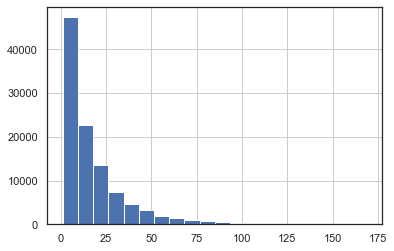

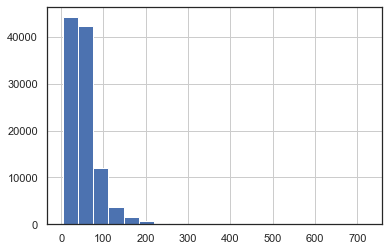

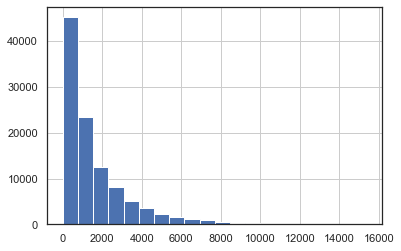

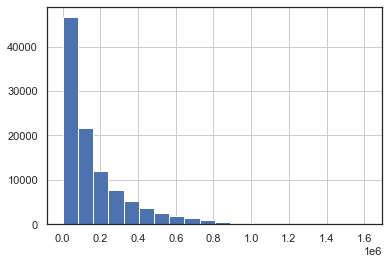

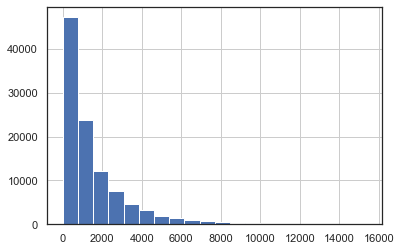

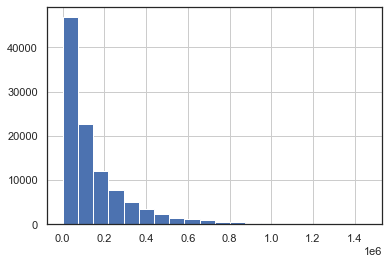

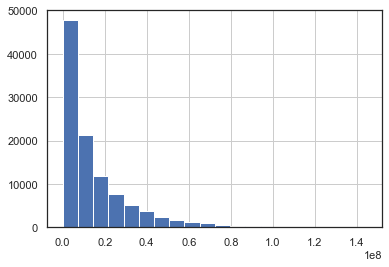

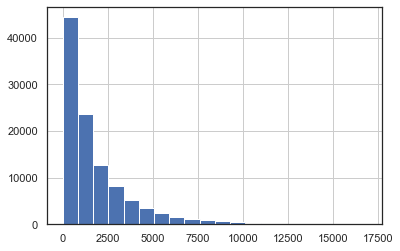

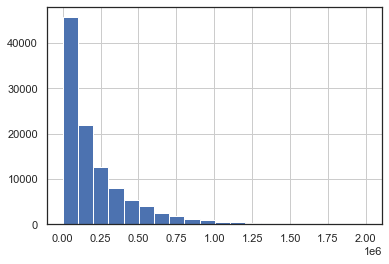

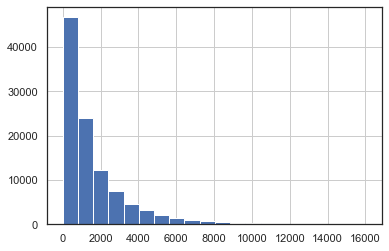

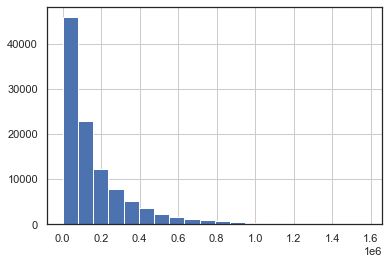

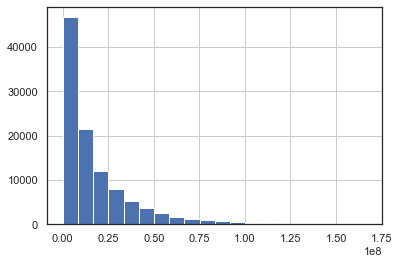

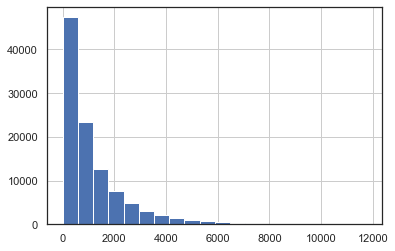

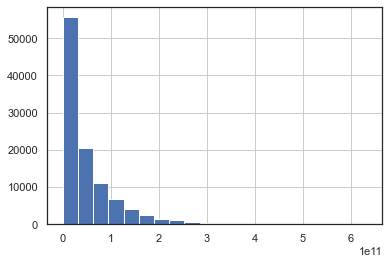

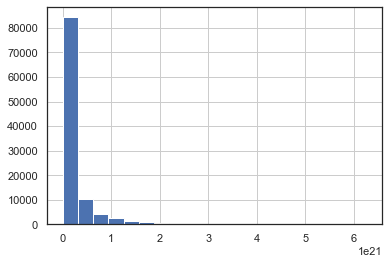

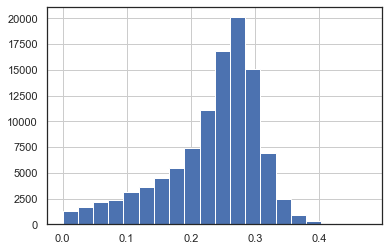

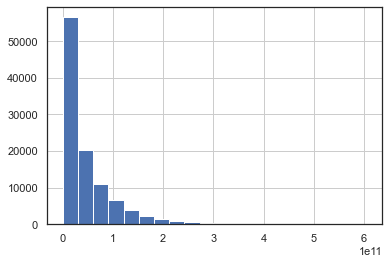

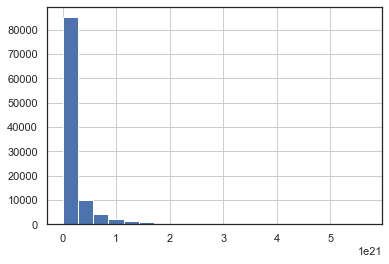

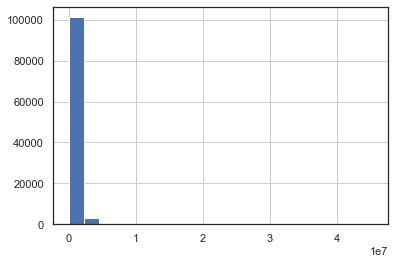

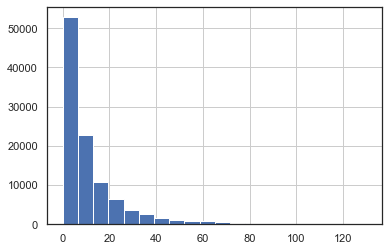

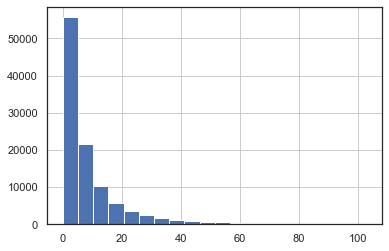

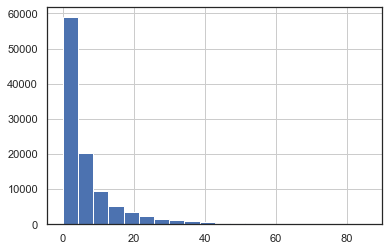

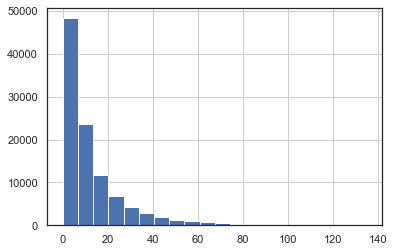

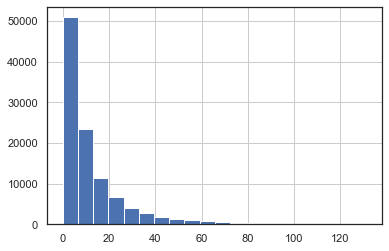

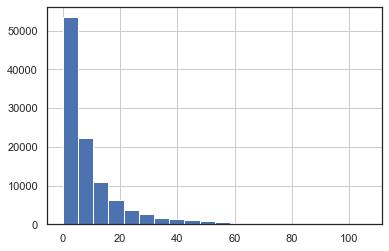

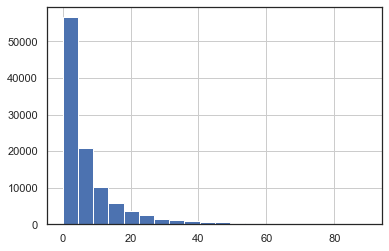

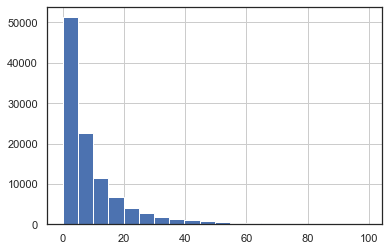

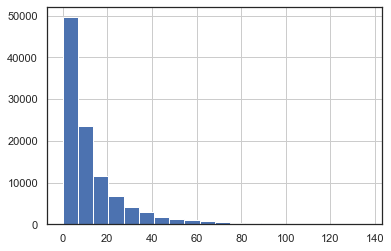

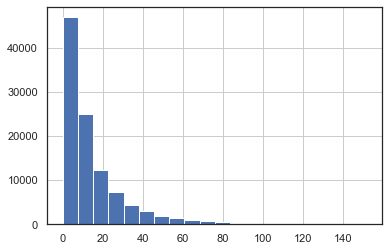

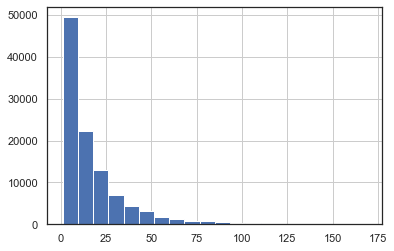

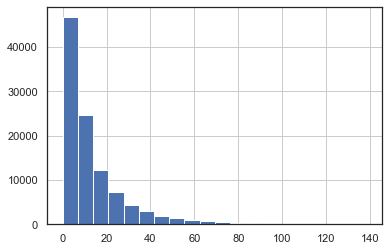

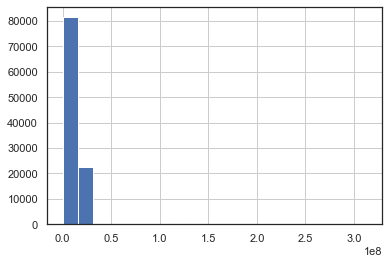

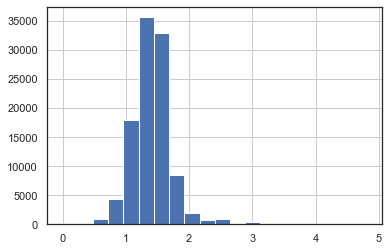

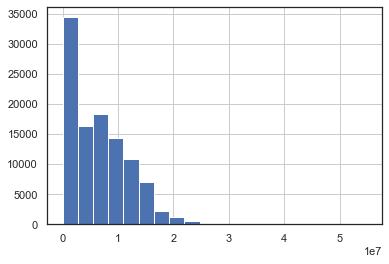

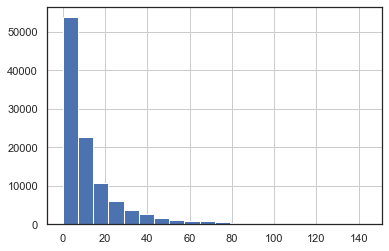

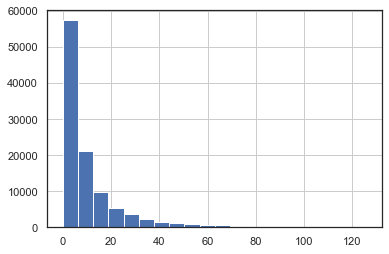

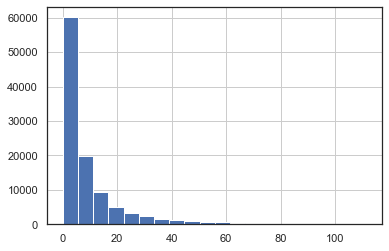

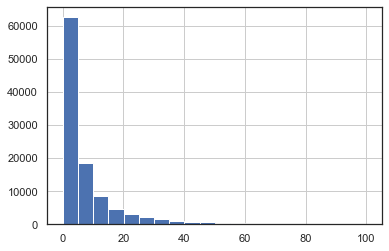

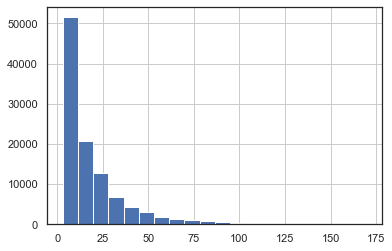

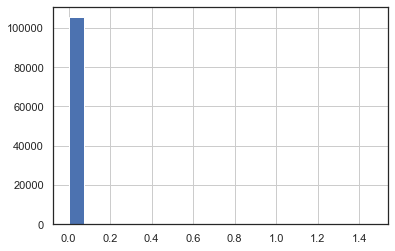

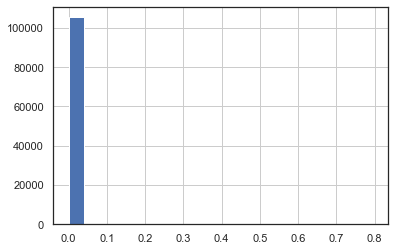

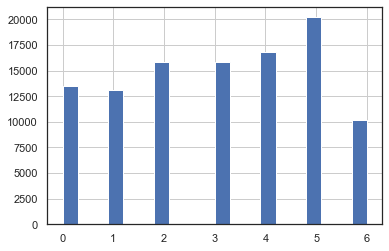

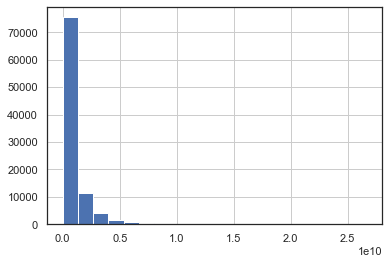

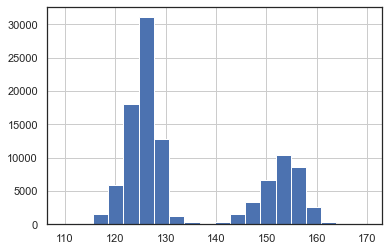

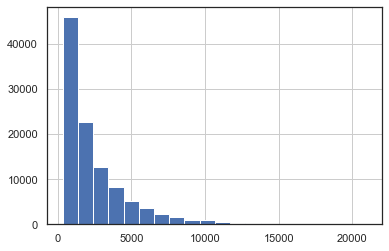

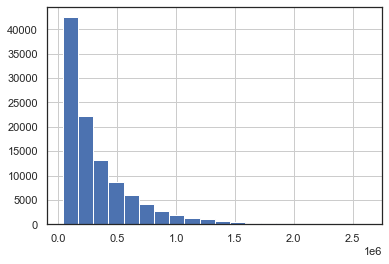

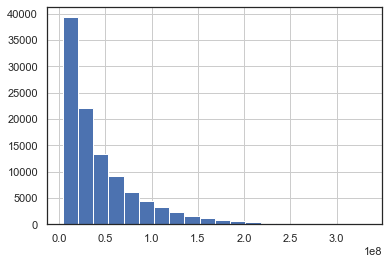

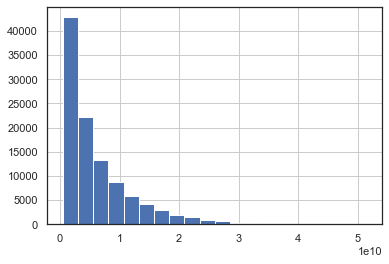

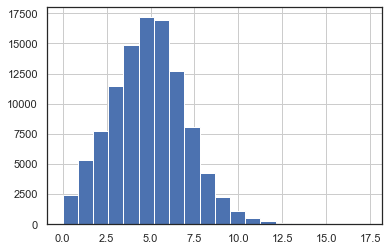

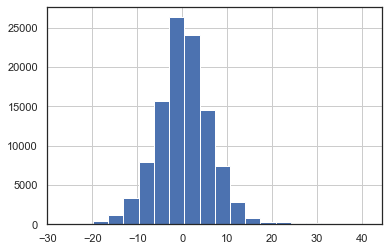

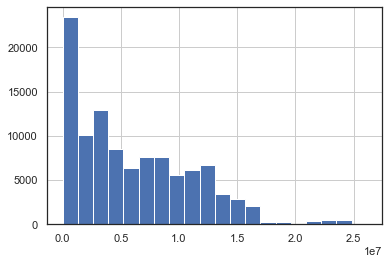

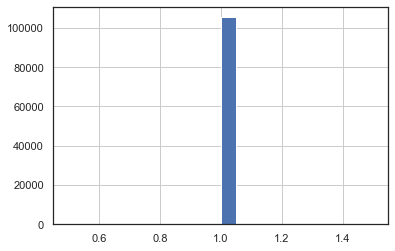

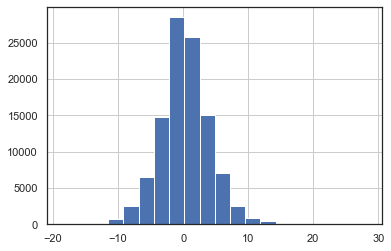

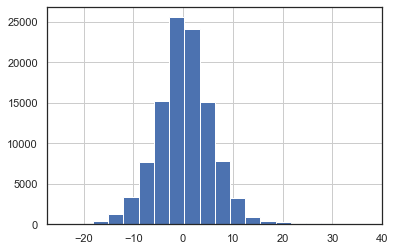

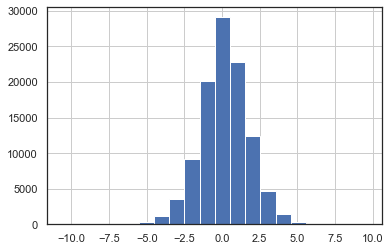

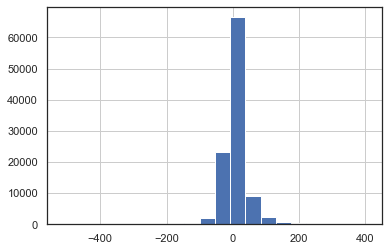

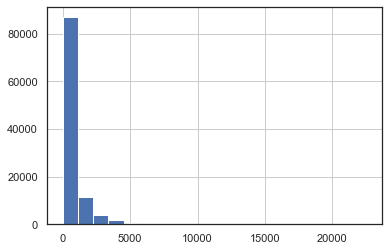

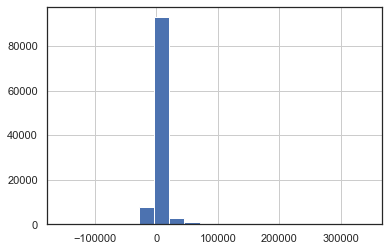

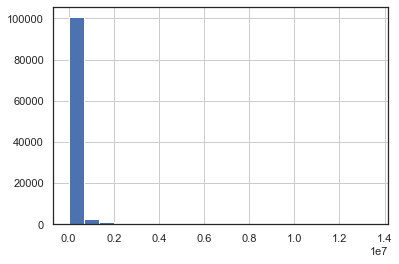

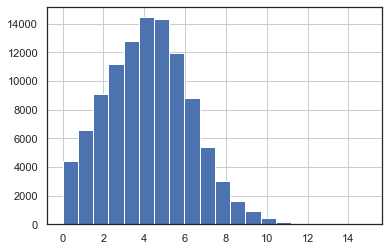

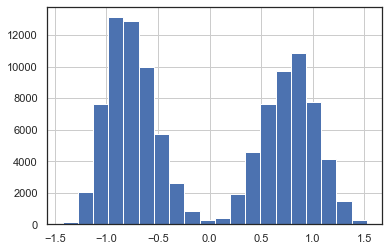

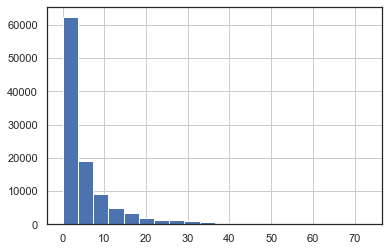

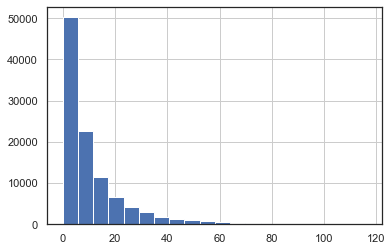

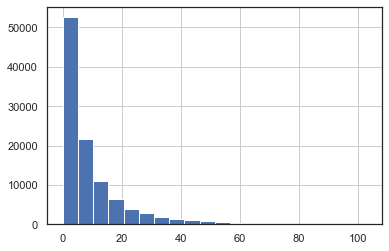

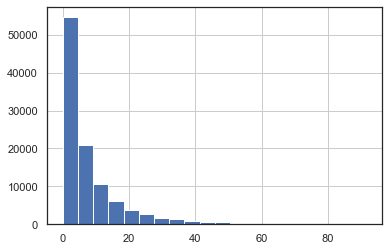

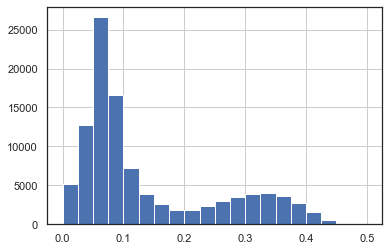

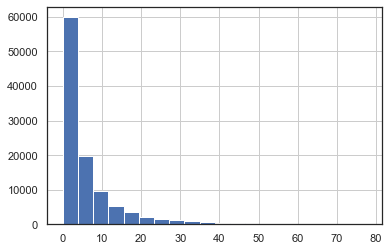

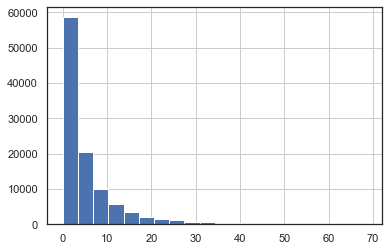

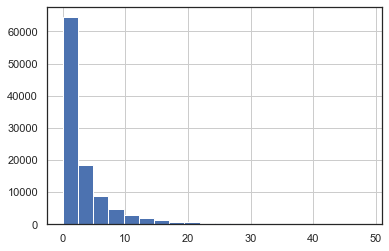

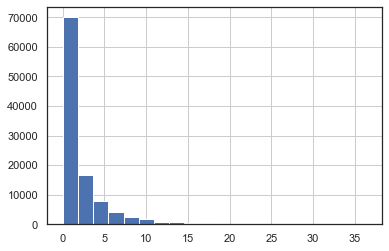

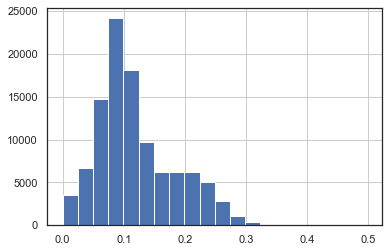

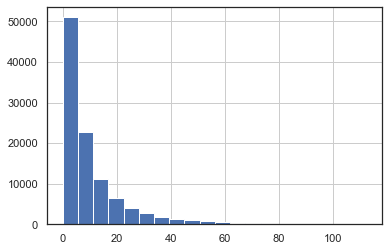

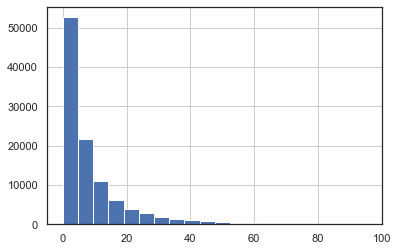

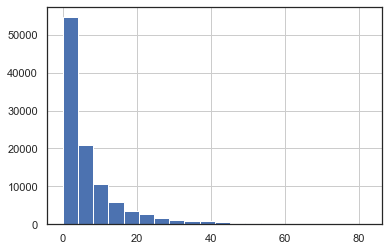

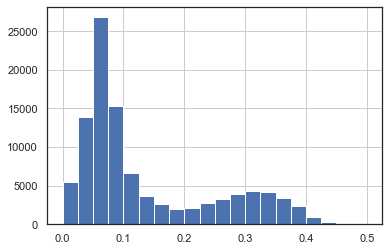

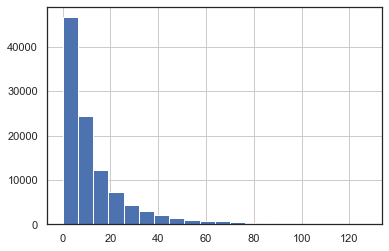

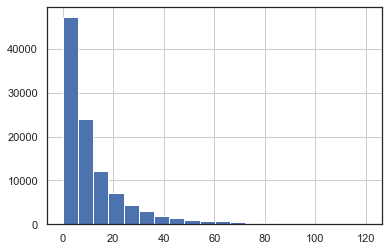

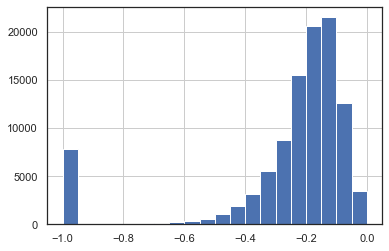

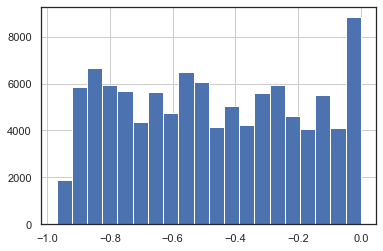

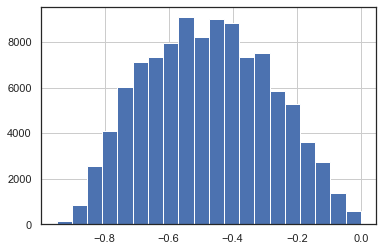

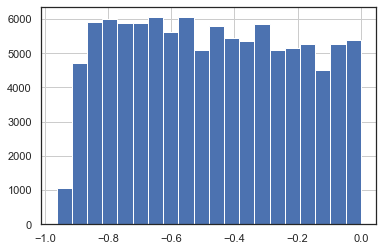

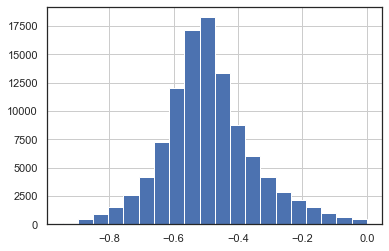

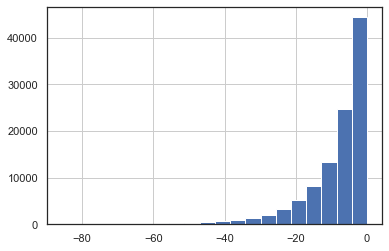

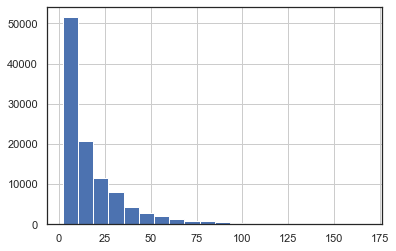

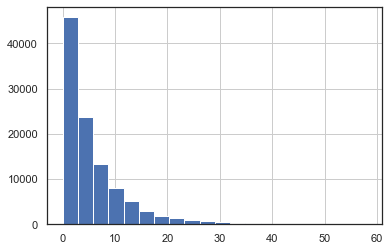

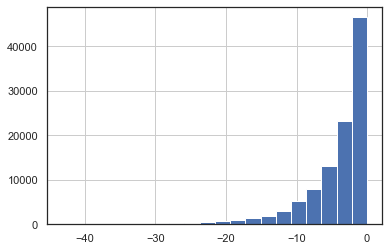

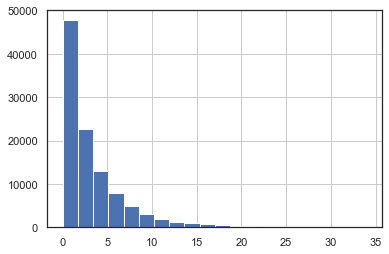

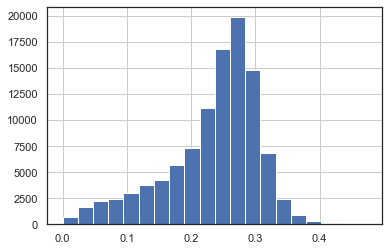

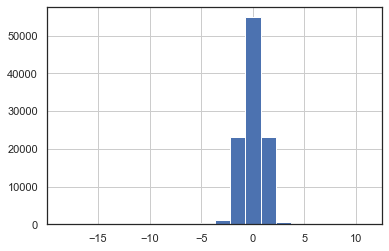

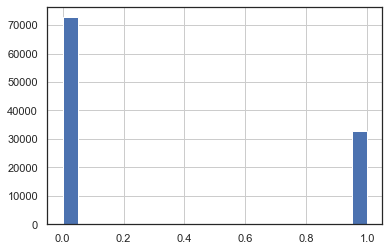

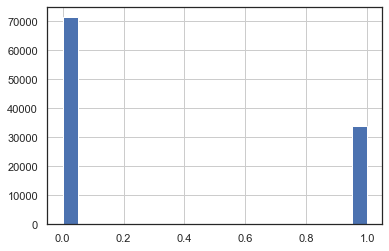

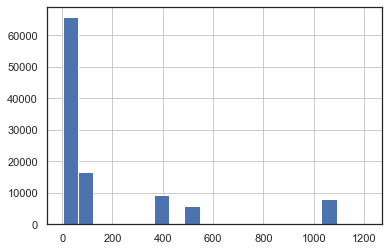

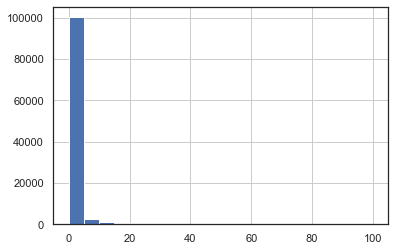

In [48]:
cols = dropped_data.columns
for x in cols:
    dropped_data[x].hist(bins=20)
    plt.show()